<html>
<h1 style="text-align:center;color:red;background-color:powderblue;font-size:400%;padding:12px;border-radius: 8px">Client Subscription📄✍</h1>
</html>

<html>
<img src="https://media.tenor.com/KIqSBxHFq74AAAAC/banker-deposit.gif" alt="Computer man" style="width:800px;height:300px"/>
</html>

## Dataset Description

The dataset is linked to a direct marketing campaign conducted by a Portuguese banking organization. Marketing campaign was based on phone calls. Repeated contact with the same customer is often necessary to assess whether a bank's term deposit will be a "yes" or a "no". In the dataset, there are 21 different attributes and 41,188 individual customer records.
**The aim is to predict whether and what kind of customers buy time deposits, using the 'y' variable for subscriptions.** 

## Input Varibles

1. age (numeric)
2. job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
3. marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or      widowed)
4. education (categorical:basic.4y","basic.6y","basic.9y","high.school","illiterate",       "professional.course","university.degree","unknown")
5. default: has credit in default? (categorical: "no","yes","unknown")
6. housing: has housing loan? (categorical: "no","yes","unknown")
7. loan: has personal loan? (categorical: "no","yes","unknown")
   
    *related with the last contact of the current campaign*:
8. contact: contact communication type (categorical: "cellular","telephone") 
9. month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
10. day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
11. duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target 
      (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the 
      call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the 
      intention is to have a realistic predictive model.
  
    *other attributes*:
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means 
      client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
  
    *social and economic context attributes*
16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
17. cons.price.idx: consumer price index - monthly indicator (numeric)     
18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
19. euribor3m: euribor 3 month rate - daily indicator (numeric)
20. nr.employed: number of employees - quarterly indicator (numeric)
  
     *Output variable (desired target)*
21. y - has the client subscribed a term deposit? (binary: "yes","no")



<h3><p style="color:white;font-size:150%;background-color:slateblue;padding:12px;border-radius: 8px">Importing libraries </p></h3>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt
import re
import csv
import warnings
warnings.filterwarnings('ignore')


# عرض جميع الأعمدة
pd.set_option('display.max_columns', None)  # تعيين عرض جميع الأعمدة بغض النظر عن عددها


**Loading the file**

In [2]:
%%time
df=pd.read_csv('bank-additional.csv')
df


Wall time: 521 ms


age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  duration  campaign  pdays  previous  \
0      telephone   may         mon       261         1    999         0   
1      telephone   may         mon       149         1    999         0   
2      telephone   may         mon       226         1    999         0   
3      telephone   may         mon       151         1    999         0   
4      telephone   may         mon       307         1    999         0   
...          ...   ...         ...       ...       ...    ...       ...   
41183   cellular   nov         fri       334         1    999         0   
41184   cellular   nov         fri       383         1    999         0   
41185   cellular   nov         fri       189         2    999         0   
41186   cellular   nov         fri       442         1    999         0   
41187   cellular   nov         fri       239         3    999         1   

          poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0      nonexistent           1.1          93.994          -36.4      4.857   
1      nonexistent           1.1          93.994          -36.4      4.857   
2      nonexistent           1.1          93.994          -36.4      4.857   
3      nonexistent           1.1          93.994          -36.4      4.857   
4      nonexistent           1.1          93.994          -36.4      4.857   
...            ...           ...             ...            ...        ...   
41183  nonexistent          -1.1          94.767          -50.8      1.028   
41184  nonexistent          -1.1          94.767          -50.8      1.028   
41185  nonexistent          -1.1          94.767          -50.8      1.028   
41186  nonexistent          -1.1          94.767          -50.8      1.028   
41187      failure          -1.1          94.767          -50.8      1.028   

       nr.employed    y  
0             5191   no  
1             5191   no  
2             5191   no  
3             5191   no  
4             5191   no  
...            ...  ...  
41183         4964  yes  
41184         4964   no  
41185         4964   no  
41186         4964  yes  
41187         4964   no  

[41188 rows x 21 columns]

<h3><p style="color:white;font-size:150%;background-color:slateblue;padding:12px;border-radius: 8px">Dataset Description </p></h3>

In [3]:
%%time
df.describe(include='all')

Wall time: 501 ms


age     job  marital          education default housing  \
count   41188.00000   41188    41188              41188   41188   41188   
unique          NaN      12        4                  8       3       3   
top             NaN  admin.  married  university.degree      no     yes   
freq            NaN   10422    24928              12168   32588   21576   
mean       40.02406     NaN      NaN                NaN     NaN     NaN   
std        10.42125     NaN      NaN                NaN     NaN     NaN   
min        17.00000     NaN      NaN                NaN     NaN     NaN   
25%        32.00000     NaN      NaN                NaN     NaN     NaN   
50%        38.00000     NaN      NaN                NaN     NaN     NaN   
75%        47.00000     NaN      NaN                NaN     NaN     NaN   
max        98.00000     NaN      NaN                NaN     NaN     NaN   

         loan   contact  month day_of_week      duration      campaign  \
count   41188     41188  41188       41188  41188.000000  41188.000000   
unique      3         2     10           5           NaN           NaN   
top        no  cellular    may         thu           NaN           NaN   
freq    33950     26144  13769        8623           NaN           NaN   
mean      NaN       NaN    NaN         NaN    258.285010      2.567593   
std       NaN       NaN    NaN         NaN    259.279249      2.770014   
min       NaN       NaN    NaN         NaN      0.000000      1.000000   
25%       NaN       NaN    NaN         NaN    102.000000      1.000000   
50%       NaN       NaN    NaN         NaN    180.000000      2.000000   
75%       NaN       NaN    NaN         NaN    319.000000      3.000000   
max       NaN       NaN    NaN         NaN   4918.000000     56.000000   

               pdays      previous     poutcome  emp.var.rate  cons.price.idx  \
count   41188.000000  41188.000000        41188  41188.000000    41188.000000   
unique           NaN           NaN            3           NaN             NaN   
top              NaN           NaN  nonexistent           NaN             NaN   
freq             NaN           NaN        35563           NaN             NaN   
mean      962.475454      0.172963          NaN      0.081886       93.575664   
std       186.910907      0.494901          NaN      1.570960        0.578840   
min         0.000000      0.000000          NaN     -3.400000       92.201000   
25%       999.000000      0.000000          NaN     -1.800000       93.075000   
50%       999.000000      0.000000          NaN      1.100000       93.749000   
75%       999.000000      0.000000          NaN      1.400000       93.994000   
max       999.000000      7.000000          NaN      1.400000       94.767000   

        cons.conf.idx     euribor3m   nr.employed      y  
count    41188.000000  41188.000000  41188.000000  41188  
unique            NaN           NaN           NaN      2  
top               NaN           NaN           NaN     no  
freq              NaN           NaN           NaN  36548  
mean       -40.502600      3.621291   5167.019010    NaN  
std          4.628198      1.734447     72.178074    NaN  
min        -50.800000      0.634000   4964.000000    NaN  
25%        -42.700000      1.344000   5099.000000    NaN  
50%        -41.800000      4.857000   5191.000000    NaN  
75%        -36.400000      4.961000   5228.000000    NaN  
max        -26.900000      5.045000   5228.000000    NaN

### Data Quality

**Checking Data Type**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

**Checking empty values**

In [5]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [6]:
df.shape

(41188, 21)

<h3><p style="color:white;font-size:150%;background-color:slateblue;padding:12px;border-radius: 8px">Data Transformation </p></h3>

**Renaming columns**

In [7]:
df_v2=df.rename(columns={'marital':'marital_status','education':'educational_attainment',
                         'default':'credit_in_default','housing':'housing_loan','loan':'personal_loan',
                         'contact':'contact_type','day_of_week':'last_contact_day','month':'last_contact_month',
                         'duration':'last_contact_duration','campaign':'current_camp_contact_count',
                         'pdays':'days_after_previous_camp','previous':'previous_camp_contact_count',
                         'poutcome':'previous_outcome','y':'current_outcome','emp.var.rate':'employment_variation_rate',
                         'euribor3m':'euro_interbank_rate','nr.employed':'number_of_employees',
                         'cons.price.idx':'consumer_price_index', 'cons.conf.idx':'consumer_confidence_index',
                         'days_after_previous_camp_bool':'contacted_or_not'})
df_v2.columns

Index(['age', 'job', 'marital_status', 'educational_attainment',
       'credit_in_default', 'housing_loan', 'personal_loan', 'contact_type',
       'last_contact_month', 'last_contact_day', 'last_contact_duration',
       'current_camp_contact_count', 'days_after_previous_camp',
       'previous_camp_contact_count', 'previous_outcome',
       'employment_variation_rate', 'consumer_price_index',
       'consumer_confidence_index', 'euro_interbank_rate',
       'number_of_employees', 'current_outcome'],
      dtype='object')

**Checking duplicates**

In [8]:
df_v2.duplicated().value_counts()

False    41176
True        12
dtype: int64

In [9]:
df_v2[df_v2.duplicated()]

age          job marital_status educational_attainment  \
1266    39  blue-collar        married               basic.6y   
12261   36      retired        married                unknown   
14234   27   technician         single    professional.course   
16956   47   technician       divorced            high.school   
18465   32   technician         single    professional.course   
20216   55     services        married            high.school   
20534   41   technician        married    professional.course   
25217   39       admin.        married      university.degree   
28477   24     services         single            high.school   
32516   35       admin.        married      university.degree   
36951   45       admin.        married      university.degree   
38281   71      retired         single      university.degree   

      credit_in_default housing_loan personal_loan contact_type  \
1266                 no           no            no    telephone   
12261                no           no            no    telephone   
14234                no           no            no     cellular   
16956                no          yes            no     cellular   
18465                no          yes            no     cellular   
20216           unknown           no            no     cellular   
20534                no          yes            no     cellular   
25217                no           no            no     cellular   
28477                no          yes            no     cellular   
32516                no          yes            no     cellular   
36951                no           no            no     cellular   
38281                no           no            no    telephone   

      last_contact_month last_contact_day  last_contact_duration  \
1266                 may              thu                    124   
12261                jul              thu                     88   
14234                jul              mon                    331   
16956                jul              thu                     43   
18465                jul              thu                    128   
20216                aug              mon                     33   
20534                aug              tue                    127   
25217                nov              tue                    123   
28477                apr              tue                    114   
32516                may              fri                    348   
36951                jul              thu                    252   
38281                oct              tue                    120   

       current_camp_contact_count  days_after_previous_camp  \
1266                            1                       999   
12261                           1                       999   
14234                           2                       999   
16956                           3                       999   
18465                           1                       999   
20216                           1                       999   
20534                           1                       999   
25217                           2                       999   
28477                           1                       999   
32516                           4                       999   
36951                           1                       999   
38281                           1                       999   

       previous_camp_contact_count previous_outcome  \
1266                             0      nonexistent   
12261                            0      nonexistent   
14234                            0      nonexistent   
16956                            0      nonexistent   
18465                            0      nonexistent   
20216                            0      nonexistent   
20534                            0      nonexistent   
25217                            0      nonexistent   
28477                            0      nonexistent   
32516                            0

In [10]:
df_v2=df_v2.drop_duplicates()
df_v2.duplicated().value_counts()
df_v2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          41176 non-null  int64  
 1   job                          41176 non-null  object 
 2   marital_status               41176 non-null  object 
 3   educational_attainment       41176 non-null  object 
 4   credit_in_default            41176 non-null  object 
 5   housing_loan                 41176 non-null  object 
 6   personal_loan                41176 non-null  object 
 7   contact_type                 41176 non-null  object 
 8   last_contact_month           41176 non-null  object 
 9   last_contact_day             41176 non-null  object 
 10  last_contact_duration        41176 non-null  int64  
 11  current_camp_contact_count   41176 non-null  int64  
 12  days_after_previous_camp     41176 non-null  int64  
 13  previous_camp_co

**Pdays**

Adding a new column for pdays to show whether the client was contacted or not (to remove 999 encoding)

In [11]:
df_v2['days_after_previous_camp_bool']=np.where(df_v2['days_after_previous_camp']== 999, 'no', 'yes')
df_v2['days_after_previous_camp_bool'].value_counts()
df_v2

age          job marital_status educational_attainment  \
0       56    housemaid        married               basic.4y   
1       57     services        married            high.school   
2       37     services        married            high.school   
3       40       admin.        married               basic.6y   
4       56     services        married            high.school   
...    ...          ...            ...                    ...   
41183   73      retired        married    professional.course   
41184   46  blue-collar        married    professional.course   
41185   56      retired        married      university.degree   
41186   44   technician        married    professional.course   
41187   74      retired        married    professional.course   

      credit_in_default housing_loan personal_loan contact_type  \
0                    no           no            no    telephone   
1               unknown           no            no    telephone   
2                    no          yes            no    telephone   
3                    no           no            no    telephone   
4                    no           no           yes    telephone   
...                 ...          ...           ...          ...   
41183                no          yes            no     cellular   
41184                no           no            no     cellular   
41185                no          yes            no     cellular   
41186                no           no            no     cellular   
41187                no          yes            no     cellular   

      last_contact_month last_contact_day  last_contact_duration  \
0                    may              mon                    261   
1                    may              mon                    149   
2                    may              mon                    226   
3                    may              mon                    151   
4                    may              mon                    307   
...                  ...              ...                    ...   
41183                nov              fri                    334   
41184                nov              fri                    383   
41185                nov              fri                    189   
41186                nov              fri                    442   
41187                nov              fri                    239   

       current_camp_contact_count  days_after_previous_camp  \
0                               1                       999   
1                               1                       999   
2                               1                       999   
3                               1                       999   
4                               1                       999   
...                           ...                       ...   
41183                           1                       999   
41184                           1                       999   
41185                           2                       999   
41186                           1                       999   
41187                           3                       999   

       previous_camp_contact_count previous_outcome  \
0                                0      nonexistent   
1                                0      nonexistent   
2                                0      nonexistent   
3                                0      nonexistent   
4                                0      nonexistent   
...                            ...              ...   
41183                            0      nonexistent   
41184                            0      nonexistent   
41185                            0      nonexistent   
41186                            0      nonexistent   
41187                            1          failure   

       employment_variation_rate  consumer_price_index  \
0                            1.1                93.994   
1                            1.1                93.994   
2           

In [12]:
df_v2=df_v2.rename(columns={'days_after_previous_camp_bool':'contacted_or_not'})
df_v2

age          job marital_status educational_attainment  \
0       56    housemaid        married               basic.4y   
1       57     services        married            high.school   
2       37     services        married            high.school   
3       40       admin.        married               basic.6y   
4       56     services        married            high.school   
...    ...          ...            ...                    ...   
41183   73      retired        married    professional.course   
41184   46  blue-collar        married    professional.course   
41185   56      retired        married      university.degree   
41186   44   technician        married    professional.course   
41187   74      retired        married    professional.course   

      credit_in_default housing_loan personal_loan contact_type  \
0                    no           no            no    telephone   
1               unknown           no            no    telephone   
2                    no          yes            no    telephone   
3                    no           no            no    telephone   
4                    no           no           yes    telephone   
...                 ...          ...           ...          ...   
41183                no          yes            no     cellular   
41184                no           no            no     cellular   
41185                no          yes            no     cellular   
41186                no           no            no     cellular   
41187                no          yes            no     cellular   

      last_contact_month last_contact_day  last_contact_duration  \
0                    may              mon                    261   
1                    may              mon                    149   
2                    may              mon                    226   
3                    may              mon                    151   
4                    may              mon                    307   
...                  ...              ...                    ...   
41183                nov              fri                    334   
41184                nov              fri                    383   
41185                nov              fri                    189   
41186                nov              fri                    442   
41187                nov              fri                    239   

       current_camp_contact_count  days_after_previous_camp  \
0                               1                       999   
1                               1                       999   
2                               1                       999   
3                               1                       999   
4                               1                       999   
...                           ...                       ...   
41183                           1                       999   
41184                           1                       999   
41185                           2                       999   
41186                           1                       999   
41187                           3                       999   

       previous_camp_contact_count previous_outcome  \
0                                0      nonexistent   
1                                0      nonexistent   
2                                0      nonexistent   
3                                0      nonexistent   
4                                0      nonexistent   
...                            ...              ...   
41183                            0      nonexistent   
41184                            0      nonexistent   
41185                            0      nonexistent   
41186                            0      nonexistent   
41187                            1          failure   

       employment_variation_rate  consumer_price_index  \
0                            1.1                93.994   
1                            1.1                93.994   
2           

In [13]:
int_column = df_v2.dtypes[df_v2.dtypes == 'int64'].index | df_v2.dtypes[df_v2.dtypes == 'float64'].index

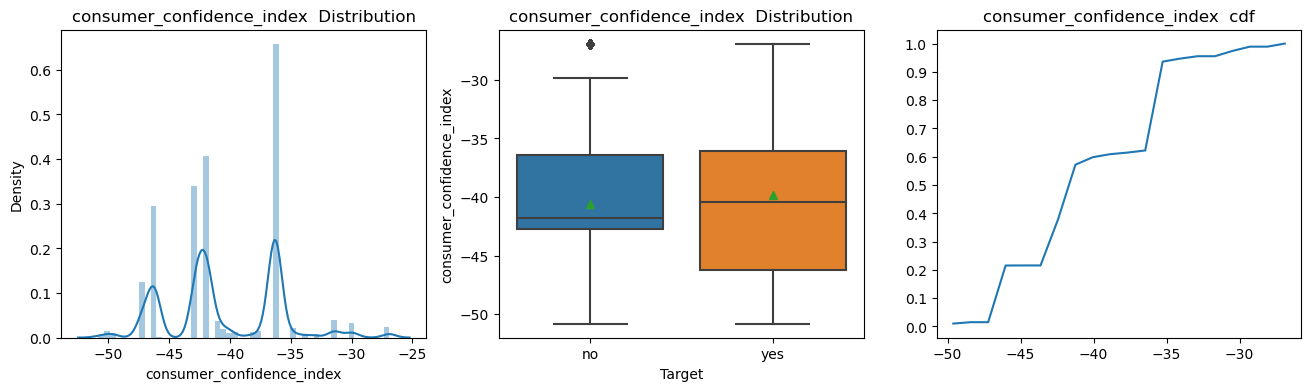

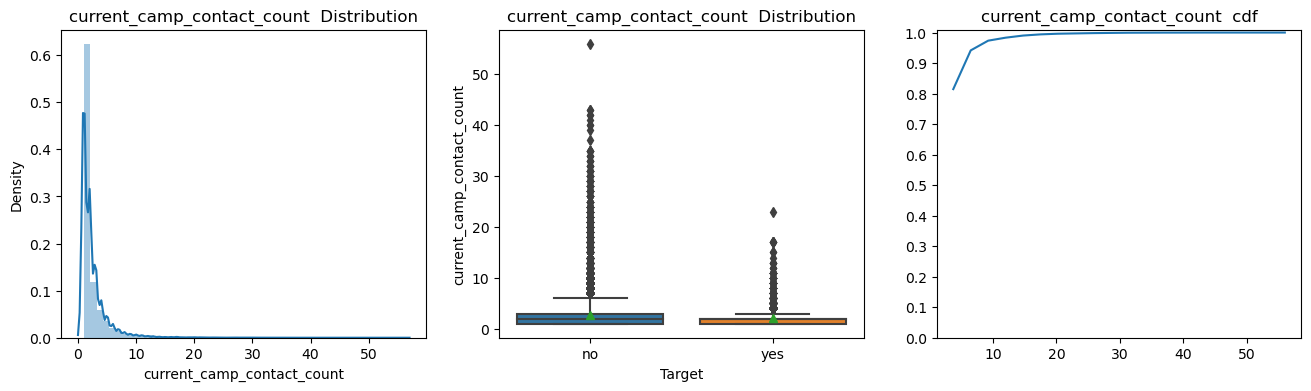

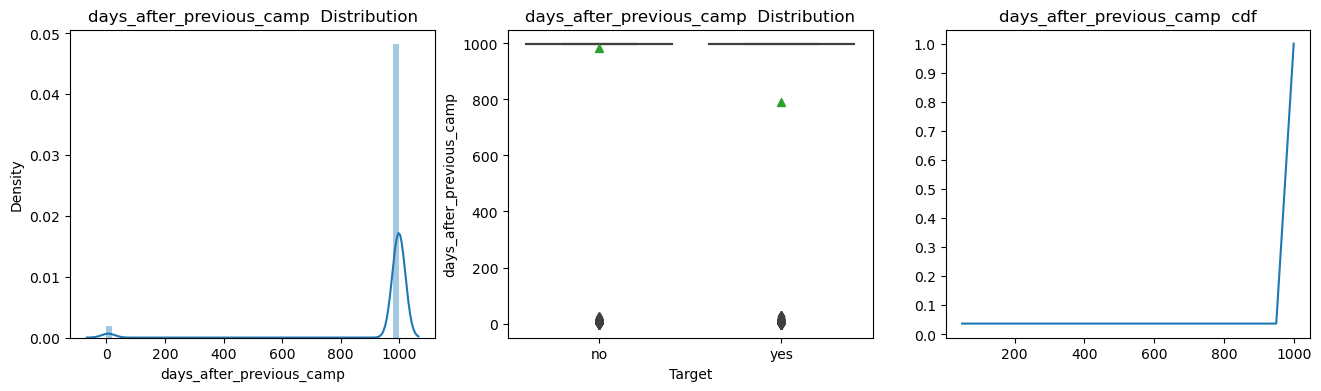

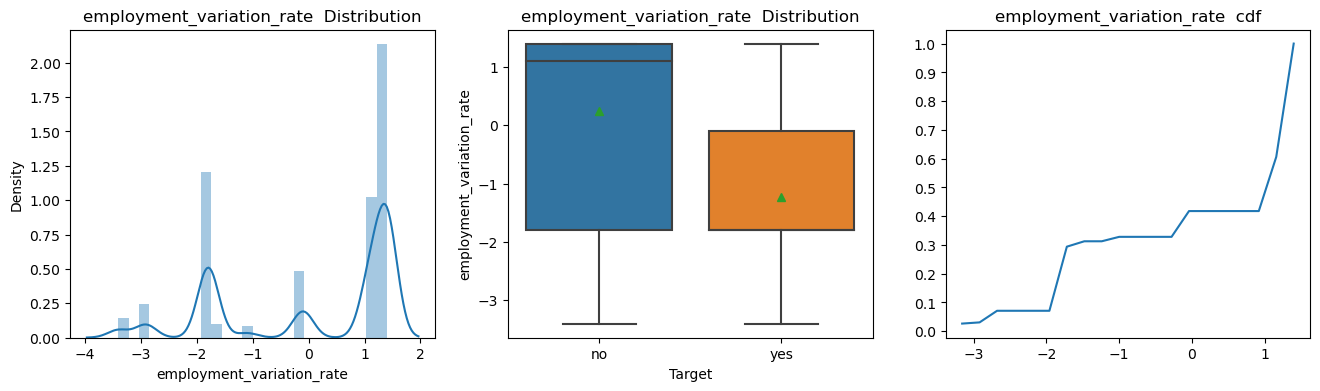

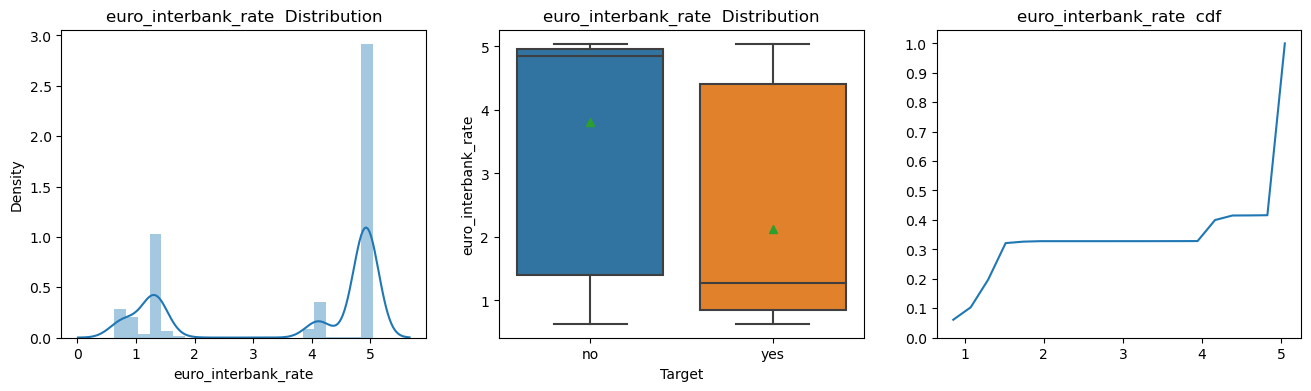

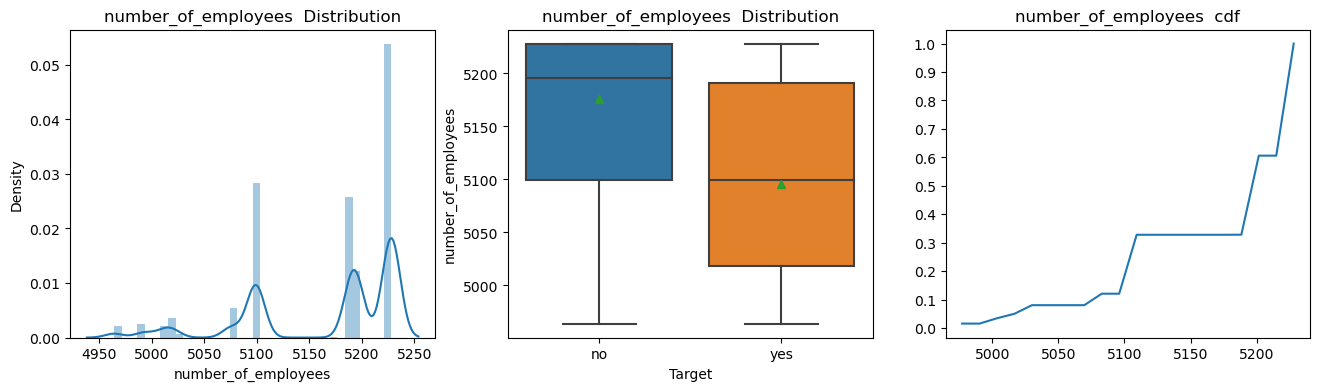

In [14]:
for column in int_column:
    plt.figure(figsize=(16,4))

    plt.subplot(1,3,1)
    sns.distplot(df_v2[column])
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.title(f'{column}  Distribution')

    plt.subplot(1,3,2)
    sns.boxplot(x='current_outcome', y=column, data =df_v2, showmeans=True )
    plt.xlabel('Target')
    plt.ylabel(column)
    plt.title(f'{column}  Distribution')

    plt.subplot(1,3,3)
    counts, bins = np.histogram(df_v2[column], bins=20, normed=True)
    cdf = np.cumsum (counts)
    plt.plot (bins[1:], cdf/cdf[-1])
    #plt.xticks(range(15,100,5))
    plt.yticks(np.arange(0,1.1,.1))
    plt.title(f'{column}  cdf')
    plt.show()
    print()


**Converting seconds to hours:minutes:seconds**

In [15]:
df_v2['last_contact_duration_min']=df['duration']/60
df_v2['last_contact_duration_min'].max()

81.96666666666667

**Converting binary variables to 1 and 0 for visualization of bivariate and multivariate data**

In [16]:
df_v2 = df_v2.replace(to_replace = ['yes','no'],value = ['1','0'])
df_v2


age          job marital_status educational_attainment  \
0       56    housemaid        married               basic.4y   
1       57     services        married            high.school   
2       37     services        married            high.school   
3       40       admin.        married               basic.6y   
4       56     services        married            high.school   
...    ...          ...            ...                    ...   
41183   73      retired        married    professional.course   
41184   46  blue-collar        married    professional.course   
41185   56      retired        married      university.degree   
41186   44   technician        married    professional.course   
41187   74      retired        married    professional.course   

      credit_in_default housing_loan personal_loan contact_type  \
0                     0            0             0    telephone   
1               unknown            0             0    telephone   
2                     0            1             0    telephone   
3                     0            0             0    telephone   
4                     0            0             1    telephone   
...                 ...          ...           ...          ...   
41183                 0            1             0     cellular   
41184                 0            0             0     cellular   
41185                 0            1             0     cellular   
41186                 0            0             0     cellular   
41187                 0            1             0     cellular   

      last_contact_month last_contact_day  last_contact_duration  \
0                    may              mon                    261   
1                    may              mon                    149   
2                    may              mon                    226   
3                    may              mon                    151   
4                    may              mon                    307   
...                  ...              ...                    ...   
41183                nov              fri                    334   
41184                nov              fri                    383   
41185                nov              fri                    189   
41186                nov              fri                    442   
41187                nov              fri                    239   

       current_camp_contact_count  days_after_previous_camp  \
0                               1                       999   
1                               1                       999   
2                               1                       999   
3                               1                       999   
4                               1                       999   
...                           ...                       ...   
41183                           1                       999   
41184                           1                       999   
41185                           2                       999   
41186                           1                       999   
41187                           3                       999   

       previous_camp_contact_count previous_outcome  \
0                                0      nonexistent   
1                                0      nonexistent   
2                                0      nonexistent   
3                                0      nonexistent   
4                                0      nonexistent   
...                            ...              ...   
41183                            0      nonexistent   
41184                            0      nonexistent   
41185                            0      nonexistent   
41186                            0      nonexistent   
41187                            1          failure   

       employment_variation_rate  consumer_price_index  \
0                            1.1                93.994   
1                            1.1                93.994   
2           

**Creating bins for age**

In [17]:
def age_groups(row):
    if row['age'] < 25:
        return 'under 25'
    elif row['age'] >= 25 and row['age'] < 35:
        return '25-35'
    elif row['age'] >= 35 and row['age'] < 45:
        return '35-45'
    elif row['age'] >= 45 and row['age'] < 55:
        return '45-55'
    elif row['age'] >= 55 and row['age'] < 65:
        return '55-65'
    else:
        return 'above 65'
df_v2['age_groups'] = df_v2.apply(age_groups, axis=1)
df_v2

age          job marital_status educational_attainment  \
0       56    housemaid        married               basic.4y   
1       57     services        married            high.school   
2       37     services        married            high.school   
3       40       admin.        married               basic.6y   
4       56     services        married            high.school   
...    ...          ...            ...                    ...   
41183   73      retired        married    professional.course   
41184   46  blue-collar        married    professional.course   
41185   56      retired        married      university.degree   
41186   44   technician        married    professional.course   
41187   74      retired        married    professional.course   

      credit_in_default housing_loan personal_loan contact_type  \
0                     0            0             0    telephone   
1               unknown            0             0    telephone   
2                     0            1             0    telephone   
3                     0            0             0    telephone   
4                     0            0             1    telephone   
...                 ...          ...           ...          ...   
41183                 0            1             0     cellular   
41184                 0            0             0     cellular   
41185                 0            1             0     cellular   
41186                 0            0             0     cellular   
41187                 0            1             0     cellular   

      last_contact_month last_contact_day  last_contact_duration  \
0                    may              mon                    261   
1                    may              mon                    149   
2                    may              mon                    226   
3                    may              mon                    151   
4                    may              mon                    307   
...                  ...              ...                    ...   
41183                nov              fri                    334   
41184                nov              fri                    383   
41185                nov              fri                    189   
41186                nov              fri                    442   
41187                nov              fri                    239   

       current_camp_contact_count  days_after_previous_camp  \
0                               1                       999   
1                               1                       999   
2                               1                       999   
3                               1                       999   
4                               1                       999   
...                           ...                       ...   
41183                           1                       999   
41184                           1                       999   
41185                           2                       999   
41186                           1                       999   
41187                           3                       999   

       previous_camp_contact_count previous_outcome  \
0                                0      nonexistent   
1                                0      nonexistent   
2                                0      nonexistent   
3                                0      nonexistent   
4                                0      nonexistent   
...                            ...              ...   
41183                            0      nonexistent   
41184                            0      nonexistent   
41185                            0      nonexistent   
41186                            0      nonexistent   
41187                            1          failure   

       employment_variation_rate  consumer_price_index  \
0                            1.1                93.994   
1                            1.1                93.994   
2           

**Creating bins for duration**

In [18]:
def duration_groups(row):
    if row['last_contact_duration_min'] < 0:
        return '0'
    elif row['last_contact_duration_min'] > 0 and row['last_contact_duration_min'] < 1:
        return 'under 1 min'
    elif row['last_contact_duration_min'] > 1 and row['last_contact_duration_min'] < 2:
        return '1-2 min'
    elif row['last_contact_duration_min'] > 2 and row['last_contact_duration_min'] < 4:
        return '2-4 min'
    elif row['last_contact_duration_min'] > 4 and row['last_contact_duration_min'] < 6:
        return '4-6 min'
    elif row['last_contact_duration_min'] > 6 and row['last_contact_duration_min'] < 8:
        return '6-8 min'
    else:
        return 'above 8'


df_v2['duration_min_groups'] = df_v2.apply(duration_groups, axis=1)
df_v2

age          job marital_status educational_attainment  \
0       56    housemaid        married               basic.4y   
1       57     services        married            high.school   
2       37     services        married            high.school   
3       40       admin.        married               basic.6y   
4       56     services        married            high.school   
...    ...          ...            ...                    ...   
41183   73      retired        married    professional.course   
41184   46  blue-collar        married    professional.course   
41185   56      retired        married      university.degree   
41186   44   technician        married    professional.course   
41187   74      retired        married    professional.course   

      credit_in_default housing_loan personal_loan contact_type  \
0                     0            0             0    telephone   
1               unknown            0             0    telephone   
2                     0            1             0    telephone   
3                     0            0             0    telephone   
4                     0            0             1    telephone   
...                 ...          ...           ...          ...   
41183                 0            1             0     cellular   
41184                 0            0             0     cellular   
41185                 0            1             0     cellular   
41186                 0            0             0     cellular   
41187                 0            1             0     cellular   

      last_contact_month last_contact_day  last_contact_duration  \
0                    may              mon                    261   
1                    may              mon                    149   
2                    may              mon                    226   
3                    may              mon                    151   
4                    may              mon                    307   
...                  ...              ...                    ...   
41183                nov              fri                    334   
41184                nov              fri                    383   
41185                nov              fri                    189   
41186                nov              fri                    442   
41187                nov              fri                    239   

       current_camp_contact_count  days_after_previous_camp  \
0                               1                       999   
1                               1                       999   
2                               1                       999   
3                               1                       999   
4                               1                       999   
...                           ...                       ...   
41183                           1                       999   
41184                           1                       999   
41185                           2                       999   
41186                           1                       999   
41187                           3                       999   

       previous_camp_contact_count previous_outcome  \
0                                0      nonexistent   
1                                0      nonexistent   
2                                0      nonexistent   
3                                0      nonexistent   
4                                0      nonexistent   
...                            ...              ...   
41183                            0      nonexistent   
41184                            0      nonexistent   
41185                            0      nonexistent   
41186                            0      nonexistent   
41187                            1          failure   

       employment_variation_rate  consumer_price_index  \
0                            1.1                93.994   
1                            1.1                93.994   
2           

**Capping outliers**

In [19]:
df_v2.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

age  last_contact_duration  current_camp_contact_count  \
count  41176.00000           41176.000000                41176.000000   
mean      40.02380             258.315815                    2.567879   
std       10.42068             259.305321                    2.770318   
min       17.00000               0.000000                    1.000000   
1%        23.00000              11.000000                    1.000000   
5%        26.00000              36.000000                    1.000000   
10%       28.00000              59.000000                    1.000000   
25%       32.00000             102.000000                    1.000000   
50%       38.00000             180.000000                    2.000000   
75%       47.00000             319.000000                    3.000000   
85%       52.00000             439.000000                    4.000000   
90%       55.00000             551.000000                    5.000000   
99%       71.00000            1271.250000                   14.000000   
max       98.00000            4918.000000                   56.000000   

       days_after_previous_camp  previous_camp_contact_count  \
count              41176.000000                 41176.000000   
mean                 962.464810                     0.173013   
std                  186.937102                     0.494964   
min                    0.000000                     0.000000   
1%                     3.000000                     0.000000   
5%                   999.000000                     0.000000   
10%                  999.000000                     0.000000   
25%                  999.000000                     0.000000   
50%                  999.000000                     0.000000   
75%                  999.000000                     0.000000   
85%                  999.000000                     0.000000   
90%                  999.000000                     1.000000   
99%                  999.000000                     2.000000   
max                  999.000000                     7.000000   

       employment_variation_rate  consumer_price_index  \
count               41176.000000          41176.000000   
mean                    0.081922             93.575720   
std                     1.570883              0.578839   
min                    -3.400000             92.201000   
1%                     -3.400000             92.201000   
5%                     -2.900000             92.713000   
10%                    -1.800000             92.893000   
25%                    -1.800000             93.075000   
50%                     1.100000             93.749000   
75%                     1.400000             93.994000   
85%                     1.400000             93.994000   
90%                     1.400000             94.465000   
99%                     1.400000             94.465000   
max                     1.400000             94.767000   

       consumer_confidence_index  euro_interbank_rate  number_of_employees  \
count               41176.000000         41176.000000         41176.000000   
mean                  -40.502863             3.621293          5167.017972   
std                     4.627860             1.734437            72.177913   
min                   -50.800000             0.634000          4964.000000   
1%                    -49.500000             0.658000          4964.000000   
5%                    -47.100000             0.797000          5018.000000   
10%                   -46.200000             1.046000          5076.000000   
25%                   -42.700000             1.344000          5099.000000   
50%                   -41.800000             4.857000          5191.000000   
75%                   -36.400000             4.961000          5228.000000   
85%                   -36.100000             4.963000          5228.000000   
90%                   -36.100000             4.964000          5228.000000   
99%                   -26.900000             4.968000          5228.00000

In [20]:
df_v3=df_v2.clip(lower=df_v2.quantile(0.01),upper=df_v2.quantile(0.99), axis=1)

df_v3.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

age  last_contact_duration  current_camp_contact_count  \
count  41176.000000           41176.000000                41176.000000   
mean      39.976370             254.410652                    2.500291   
std       10.137591             235.211228                    2.301416   
min       23.000000              11.000000                    1.000000   
1%        23.000000              11.000000                    1.000000   
5%        26.000000              36.000000                    1.000000   
10%       28.000000              59.000000                    1.000000   
25%       32.000000             102.000000                    1.000000   
50%       38.000000             180.000000                    2.000000   
75%       47.000000             319.000000                    3.000000   
85%       52.000000             439.000000                    4.000000   
90%       55.000000             551.000000                    5.000000   
99%       71.000000            1271.062500                   14.000000   
max       71.000000            1271.250000                   14.000000   

       days_after_previous_camp  previous_camp_contact_count  \
count              41176.000000                 41176.000000   
mean                 962.468647                     0.162449   
std                  186.917386                     0.433295   
min                    3.000000                     0.000000   
1%                     3.000000                     0.000000   
5%                   999.000000                     0.000000   
10%                  999.000000                     0.000000   
25%                  999.000000                     0.000000   
50%                  999.000000                     0.000000   
75%                  999.000000                     0.000000   
85%                  999.000000                     0.000000   
90%                  999.000000                     1.000000   
99%                  999.000000                     2.000000   
max                  999.000000                     2.000000   

       employment_variation_rate  consumer_price_index  \
count               41176.000000          41176.000000   
mean                    0.081922             93.574107   
std                     1.570883              0.576028   
min                    -3.400000             92.201000   
1%                     -3.400000             92.201000   
5%                     -2.900000             92.713000   
10%                    -1.800000             92.893000   
25%                    -1.800000             93.075000   
50%                     1.100000             93.749000   
75%                     1.400000             93.994000   
85%                     1.400000             93.994000   
90%                     1.400000             94.465000   
99%                     1.400000             94.465000   
max                     1.400000             94.465000   

       consumer_confidence_index  euro_interbank_rate  number_of_employees  \
count               41176.000000         41176.000000         41176.000000   
mean                  -40.495398             3.621392          5167.017972   
std                     4.612562             1.734191            72.177913   
min                   -49.500000             0.658000          4964.000000   
1%                    -49.500000             0.658750          4964.000000   
5%                    -47.100000             0.797000          5018.000000   
10%                   -46.200000             1.046000          5076.000000   
25%                   -42.700000             1.344000          5099.000000   
50%                   -41.800000             4.857000          5191.000000   
75%                   -36.400000             4.961000          5228.000000   
85%                   -36.100000             4.963000          5228.000000   
90%                   -36.100000             4.964000          5228.000000   
99%                   -26.900000             4.968000      

**Encoding of categorical variables**

In [21]:
df_v2.drop(['days_after_previous_camp'], axis=1, inplace = True)

**Results:**
- **the data types are correct;**
- **there are no missing values;**
- **duplicates are removed;**
- **there are outliers but they are a natural part of the population we are about to study. The dataframe with removed outliers is df_v3 and the dataframe with outliers is df_v2.**

<h3><p style="color:white;font-size:150%;background-color:slateblue;padding:12px;border-radius: 8px">Univariate Analysis </p></h3>

### Custom Function for Data Plotting

In [22]:
# Function to plot numeric variables
sns.set(rc = {'figure.figsize':(15,8)})
def plot_numeric(field, xlabel, ylabel):   
    # Histogram
    plt.hist(df_v2[field], bins='auto', color='cadetblue', edgecolor='grey', histtype='bar', rwidth=1)
    plt.title(field.capitalize(), fontsize=18)
    plt.xlabel(xlabel.capitalize(), fontsize = 14)
    plt.ylabel(ylabel, fontsize = 14)
    plt.xticks(fontsize = 12, rotation = 75)
    plt.style.use('seaborn-whitegrid')
    plt.grid(color='white')
    plt.rcParams['axes.facecolor'] = 'lavender'
    plt.show()
    
     # Frequency table
    Absolute = df_v2[field].value_counts(ascending=False)
    Percent = round((df_v2[field].value_counts(normalize=True))*100,2)
    field_pd=pd.DataFrame({'counts': Absolute, 'percentage': Percent})
    print(field_pd)
    
    
    #Probability Distribution
    sns.kdeplot(data=df_v2[field], color='cadetblue',shade='paleturquoise')
    plt.xlabel(xlabel.capitalize(), fontsize = 14)
    plt.grid(color='white')
    plt.rcParams['axes.facecolor'] = 'lavender'
    plt.show()
    
    #Box-plot
    sns.boxenplot(data=df_v2[field],color='cadetblue', orient="h")
    plt.xlabel(xlabel.capitalize(), fontsize = 14)
    plt.ylabel(ylabel, fontsize = 14)
    plt.grid(color='white')
    plt.rcParams['axes.facecolor'] = 'lavender'
    plt.show()
    
       
# Function to plot categorical variables
def plot_object(field, xlabel, ylabel):
    
    #Histogram
    plt.hist(df_v2[field], bins='auto',color='cadetblue', edgecolor='grey', histtype='bar', rwidth=1)
    plt.xlabel(xlabel, fontsize = 14)
    plt.ylabel(ylabel, fontsize = 14)
    plt.title(field.capitalize(), fontsize=18)
    plt.xticks(fontsize = 12, rotation = 75)
    plt.rcParams['axes.facecolor'] = 'lavender'
    plt.grid(color='white')
    plt.show()
    
    #Frequency Table
    Absolute = df_v2[field].value_counts(ascending=False)
    Percent = round((df_v2[field].value_counts(normalize=True))*100,2)
    field_pd=pd.DataFrame({'counts': Absolute, 'percentage': Percent})
    print(field_pd)
    
# Function to plot visuals depending on data type
def plot_field(df_v2, field, xlabel, ylabel):
    if df_v2[field].dtype == 'int64' or df_v2[field].dtype =='float64':
        plot_numeric(field, xlabel, ylabel)
    elif df_v2[field].dtype == 'object':
        plot_object(field, xlabel, ylabel)   


**1. Age**

 - The biggest three age groups that were targeted in the campaign are "25-35", "35-45" and "45-55"
 - The smallest group is "above 65"

In [23]:
field="age"
xlabel="Age"
ylabel="Count"

plot_field(df_v2, field, xlabel, ylabel)

    counts  percentage
31    1947        4.73
32    1845        4.48
33    1833        4.45
36    1779        4.32
35    1758        4.27
..     ...         ...
89       2        0.00
91       2        0.00
94       1        0.00
87       1        0.00
95       1        0.00

[78 rows x 2 columns]


In [24]:
field="age_groups"
xlabel="Age"
ylabel="Count"

plot_field(df_v2, field, xlabel, ylabel)

          counts  percentage
25-35      13684       33.23
35-45      13495       32.77
45-55       8702       21.13
55-65       3566        8.66
under 25    1067        2.59
above 65     662        1.61


**2. Job**

Type of job  (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired", "self-employed","services","student","technician","unemployed","unknown")

- The biggest three groups are represented by admininistrative jobs, blue-collar, technicians. This professions make up approximately more than 50% of the whole group
- The smallest three groups are represented by unemployed, students and an uknown group. The marketing team assumed that these groups might not have savings to deposit.
- The campaign was not targeting self-employed and entrepreneurs. This could mean that the department was targeting mainly individuals and not legal entities; also it can mean that deposits offers would be of interest only to individuals and not self-employed or enterpreneurs.
- Interestingly, groups "management","retired" and "services" were not actively approached despite the fact that these groups might have savings to invest into deposits.

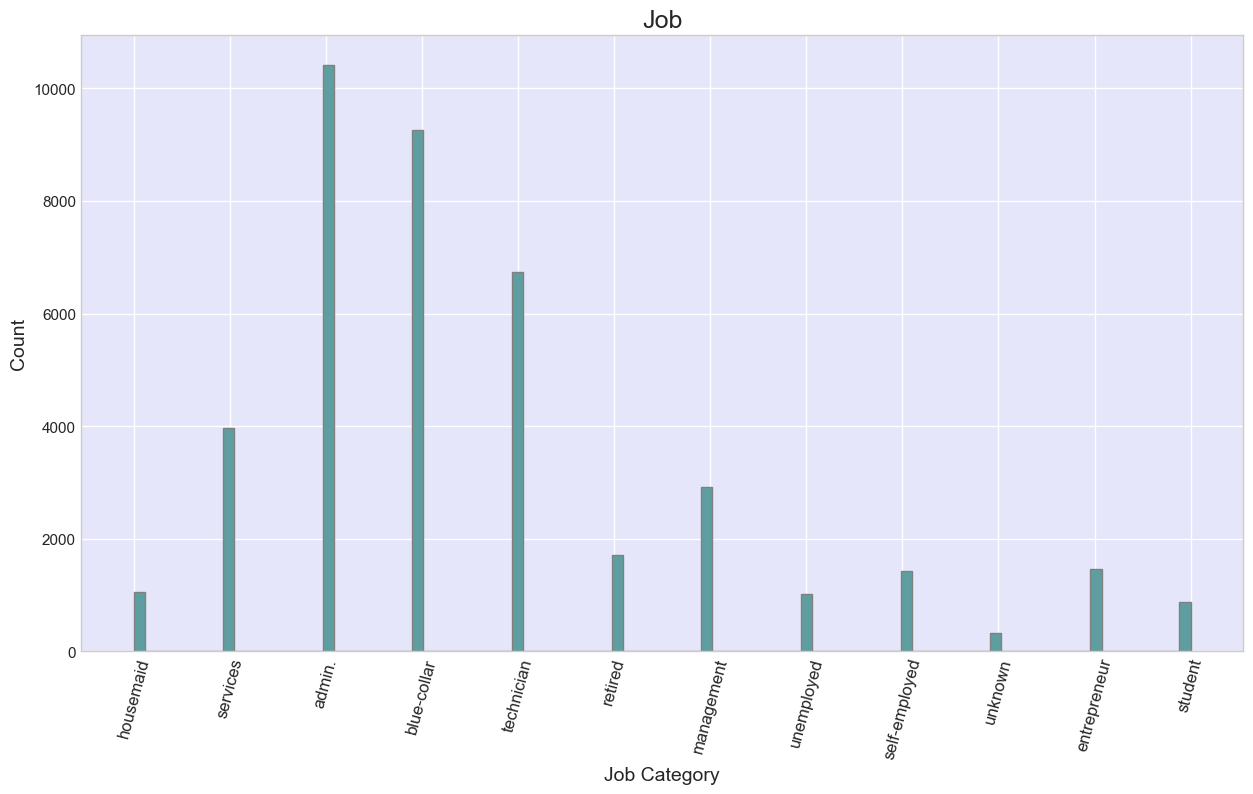

               counts  percentage
admin.          10419       25.30
blue-collar      9253       22.47
technician       6739       16.37
services         3967        9.63
management       2924        7.10
retired          1718        4.17
entrepreneur     1456        3.54
self-employed    1421        3.45
housemaid        1060        2.57
unemployed       1014        2.46
student           875        2.13
unknown           330        0.80


In [25]:
field="job"
xlabel="Job Category"
ylabel="Count"

plot_field(df_v2, field, xlabel, ylabel)

**3. Marital: marital status**

Type categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)

 - Most of the people in this dataset are married and single

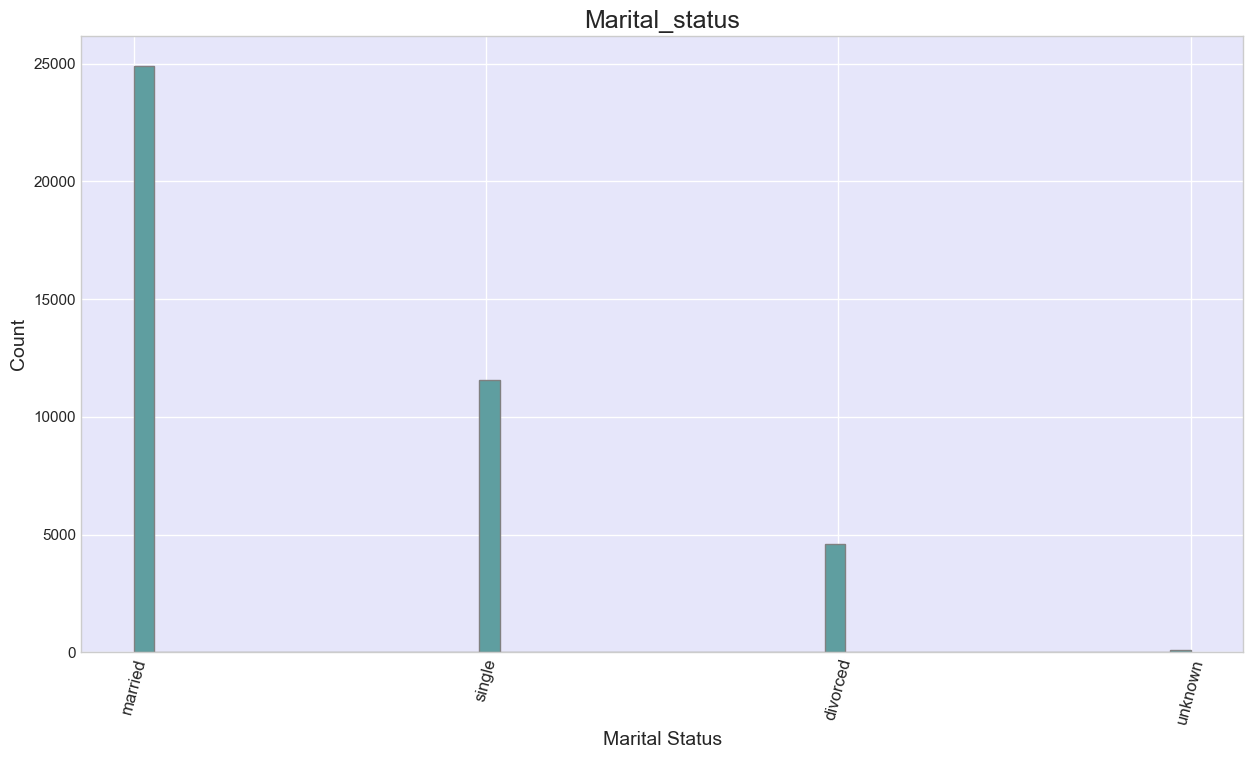

          counts  percentage
married    24921       60.52
single     11564       28.08
divorced    4611       11.20
unknown       80        0.19


In [26]:
field="marital_status"
xlabel="Marital Status"
ylabel="Count"

plot_field(df_v2, field, xlabel, ylabel)

**4. Education**

Type categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")*

 - Around 30% of dataset have higher education
 - Around 23 % of dataset have only high school diploma
 - The rest of the dataset have only 4 to 9 years of basic education or professional courses 



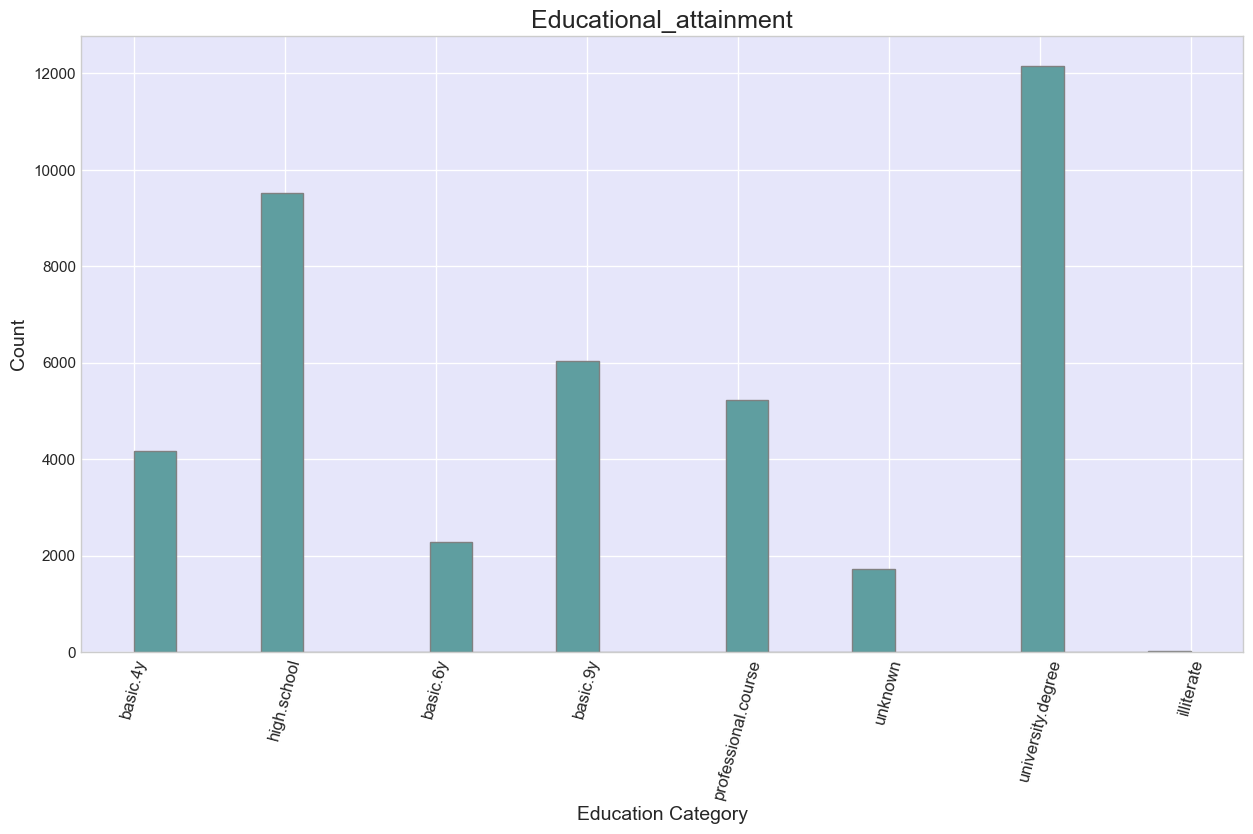

                     counts  percentage
university.degree     12164       29.54
high.school            9512       23.10
basic.9y               6045       14.68
professional.course    5240       12.73
basic.4y               4176       10.14
basic.6y               2291        5.56
unknown                1730        4.20
illiterate               18        0.04


In [27]:
field="educational_attainment"
xlabel="Education Category"
ylabel="Count"

plot_field(df_v2, field, xlabel, ylabel)

**5. Default: has credit in default?** 

Type categorical: "no","yes","unknown"

 - Around 80% of the dataset do not have credit in defaults, i.e. have not broken terms of credit agreement
 - It is unknown about the rest of the dataset
 - All-in-all it seems that sales agents avoided people with financial troubles and reached out to people who they did not know whether they had default or not
     

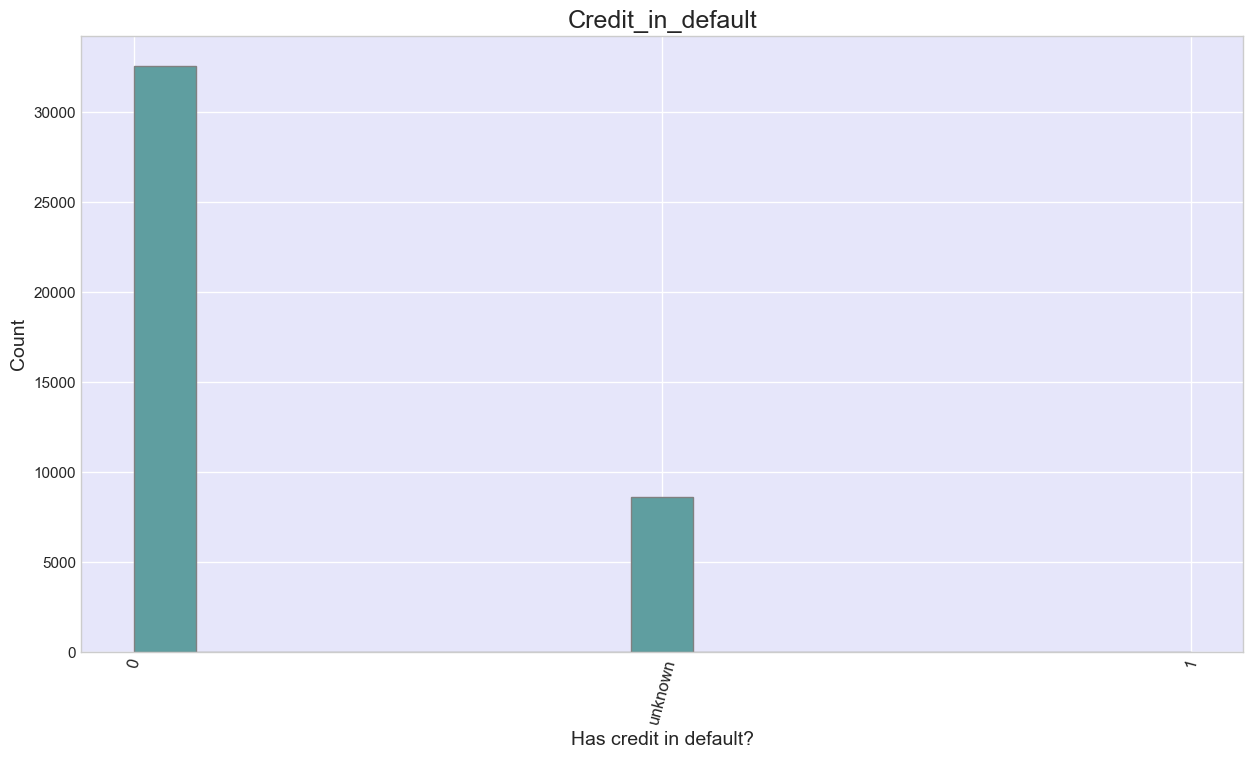

         counts  percentage
0         32577       79.12
unknown    8596       20.88
1             3        0.01


In [28]:
field="credit_in_default"
xlabel="Has credit in default?"
ylabel="Count"

plot_field(df_v2, field, xlabel, ylabel)

**6. Housing: has housing loan?** 

Type categorical: "no","yes","unknown"

 - Around 50% of people have housing loans and around 45% do not
 - It seems that having a housing loan was not indicative of failure for sales agents as they did not target only people without housing loans. In comparison with default status - where sales agents targeted only people without default credits.


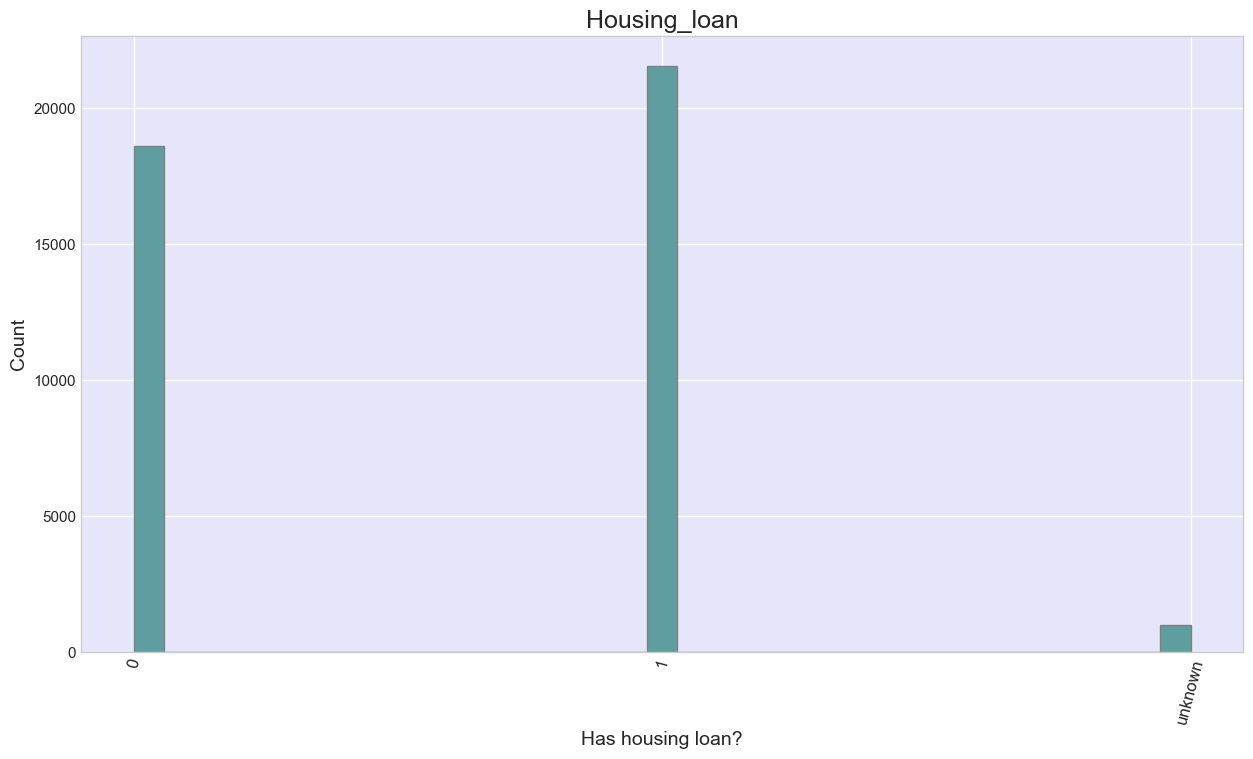

         counts  percentage
1         21571       52.39
0         18615       45.21
unknown     990        2.40


In [29]:
field="housing_loan"
xlabel="Has housing loan?"
ylabel="Count"

plot_field(df_v2, field, xlabel, ylabel)

**7. loan: has personal loan?** 

Type categorical: "no","yes","unknown")

 - Presence of personal loan seems to be a negative factor for sales agents as they targeted primarily people without personal loan.
 - The logic of sales agents is becoming more clear - having a personal loan or default credit makes people less suitable candidates for opening a deposit, however having a housing loan is not a barrier.

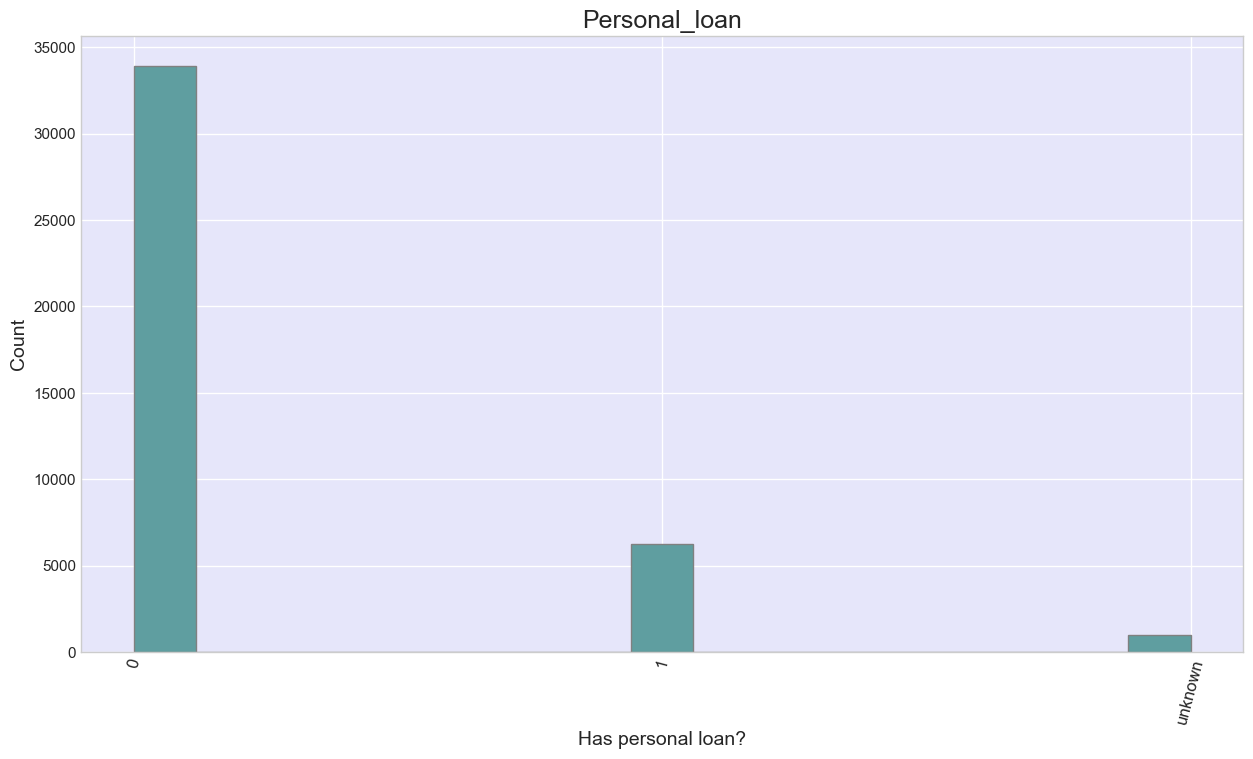

         counts  percentage
0         33938       82.42
1          6248       15.17
unknown     990        2.40


In [30]:
field="personal_loan"
xlabel="Has personal loan?"
ylabel="Count"

plot_field(df_v2, field, xlabel, ylabel)

###   Variables related with the last contact of the current campaign:

**8. contact: contact communication type**

Type categorical: "cellular","telephone"

 - Around 64% of people were reached out to their cell phones and the rest - 36%- through line phones


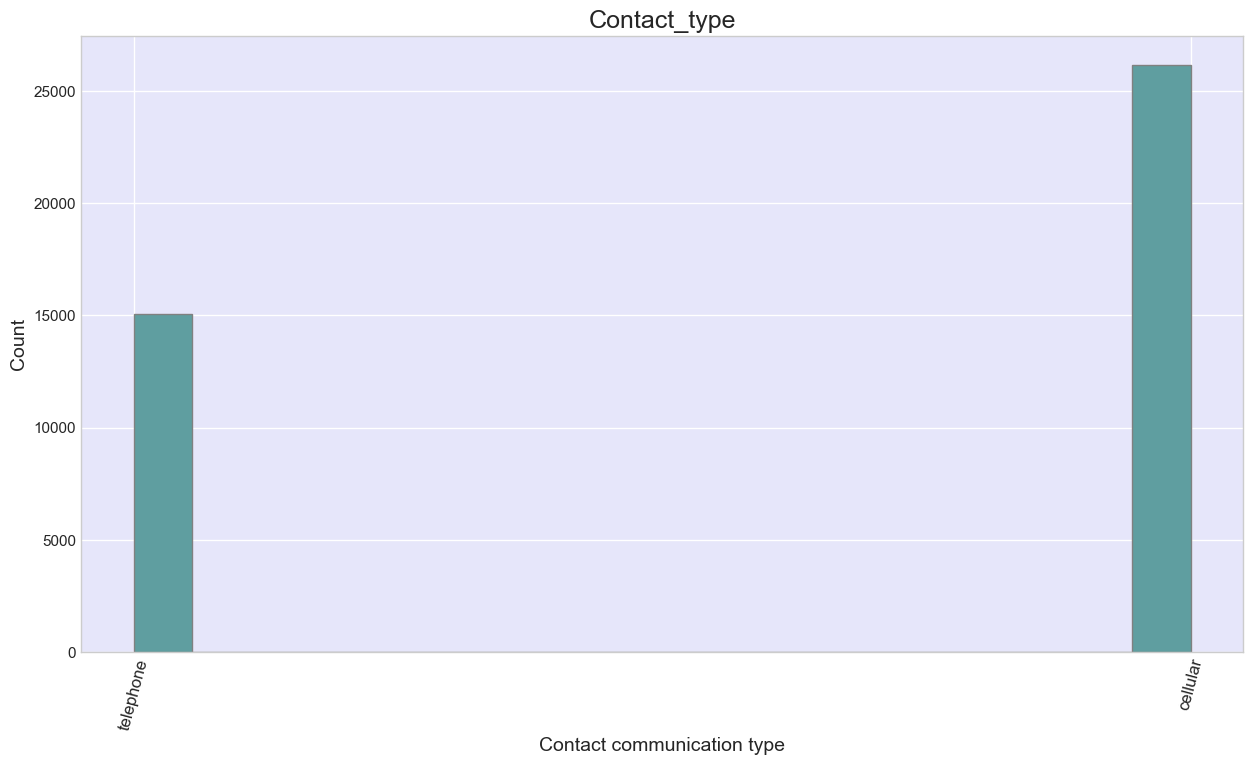

           counts  percentage
cellular    26135       63.47
telephone   15041       36.53


In [31]:
field="contact_type"
xlabel="Contact communication type"
ylabel="Count"

plot_field(df_v2, field, xlabel, ylabel)

**9. month: last contact month of year** 
    
Type categorical: "jan", "feb", "mar", ..., "nov", "dec"

 - The number of calls starts sligthly increasing in **spring**, i.e. in April with 2631  calls, spikes in May with 13767, and stays around the same till the end of **summer** from 5000 till 7000 calls.
 - There are 0 calls are done in January of February 
 - There are less then 1000 calls are done in September, October and December. Only in November there were 4100 calls - the highest number in **autumn-winter** season.
 - My assumption is sales agents bother clients less prior to and after winter holidays in December and January. And, probably, start planning the campaign in February


In [32]:
df_v2['last_contact_month_num'] = df_v2['last_contact_month'].replace(['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul','aug','sep','oct','nov','dec'], ['1-jan', '2-feb', '3-mar', '4-apr', '5-may', '6-jun', '7-jul','8-aug','9-sep','10-oct','11-nov','12-dec'])
df_v2

age          job marital_status educational_attainment  \
0       56    housemaid        married               basic.4y   
1       57     services        married            high.school   
2       37     services        married            high.school   
3       40       admin.        married               basic.6y   
4       56     services        married            high.school   
...    ...          ...            ...                    ...   
41183   73      retired        married    professional.course   
41184   46  blue-collar        married    professional.course   
41185   56      retired        married      university.degree   
41186   44   technician        married    professional.course   
41187   74      retired        married    professional.course   

      credit_in_default housing_loan personal_loan contact_type  \
0                     0            0             0    telephone   
1               unknown            0             0    telephone   
2                     0            1             0    telephone   
3                     0            0             0    telephone   
4                     0            0             1    telephone   
...                 ...          ...           ...          ...   
41183                 0            1             0     cellular   
41184                 0            0             0     cellular   
41185                 0            1             0     cellular   
41186                 0            0             0     cellular   
41187                 0            1             0     cellular   

      last_contact_month last_contact_day  last_contact_duration  \
0                    may              mon                    261   
1                    may              mon                    149   
2                    may              mon                    226   
3                    may              mon                    151   
4                    may              mon                    307   
...                  ...              ...                    ...   
41183                nov              fri                    334   
41184                nov              fri                    383   
41185                nov              fri                    189   
41186                nov              fri                    442   
41187                nov              fri                    239   

       current_camp_contact_count  previous_camp_contact_count  \
0                               1                            0   
1                               1                            0   
2                               1                            0   
3                               1                            0   
4                               1                            0   
...                           ...                          ...   
41183                           1                            0   
41184                           1                            0   
41185                           2                            0   
41186                           1                            0   
41187                           3                            1   

      previous_outcome  employment_variation_rate  consumer_price_index  \
0          nonexistent                        1.1                93.994   
1          nonexistent                        1.1                93.994   
2          nonexistent                        1.1                93.994   
3          nonexistent                        1.1                93.994   
4          nonexistent                        1.1                93.994   
...                ...                        ...                   ...   
41183      nonexistent                       -1.1                94.767   
41184      nonexistent                       -1.1                94.767   
41185      nonexistent                       -1.1                94.767   
41186      nonexistent                       -1.1            

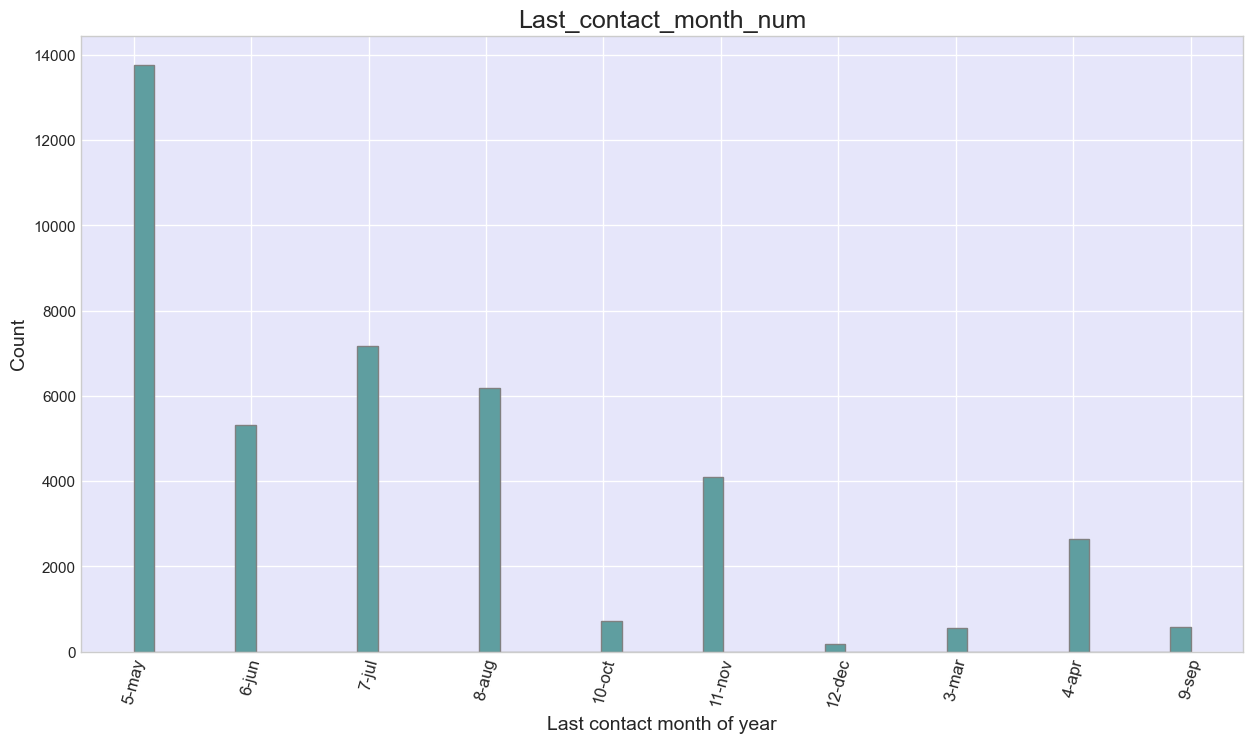

        counts  percentage
5-may    13767       33.43
7-jul     7169       17.41
8-aug     6176       15.00
6-jun     5318       12.92
11-nov    4100        9.96
4-apr     2631        6.39
10-oct     717        1.74
9-sep      570        1.38
3-mar      546        1.33
12-dec     182        0.44


In [33]:
field="last_contact_month_num"
xlabel="Last contact month of year"
ylabel="Count"

plot_field(df_v2, field, xlabel, ylabel)

**10. Day of week: last contact day of the week**
    
Type categorical: "mon","tue","wed","thu","fri"

- Sales agents made around 8000 calls on all working days

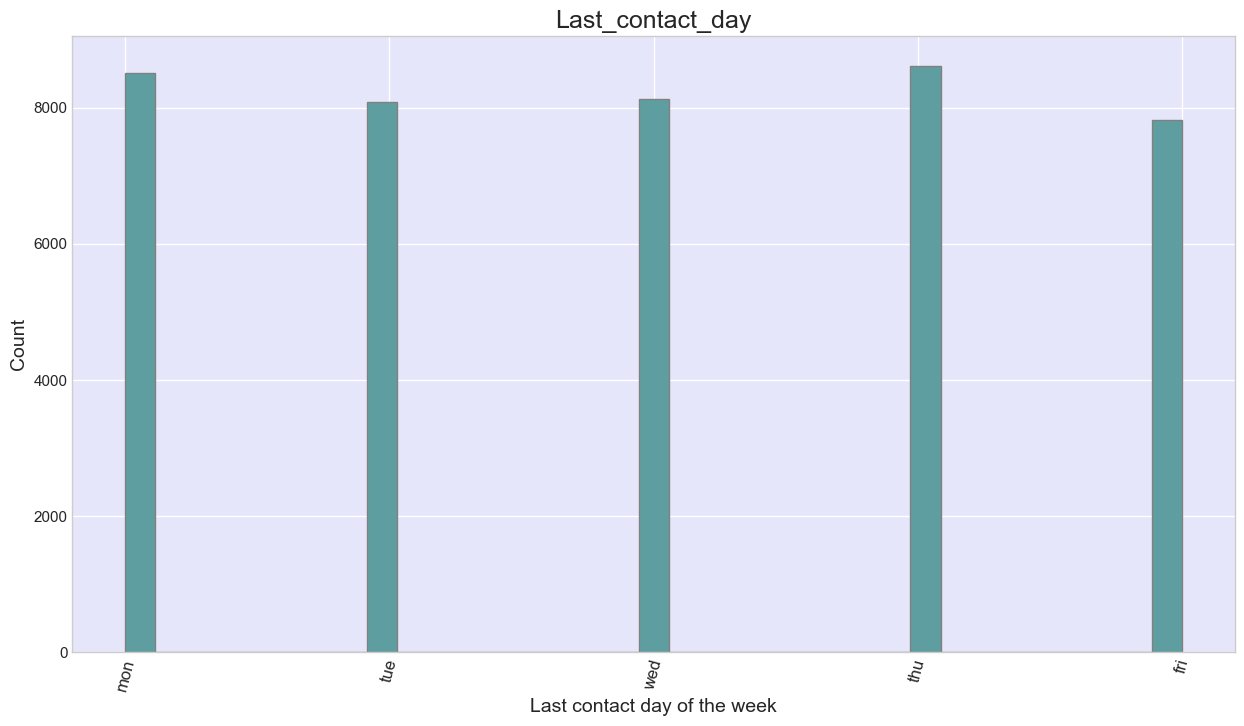

     counts  percentage
thu    8618       20.93
mon    8512       20.67
wed    8134       19.75
tue    8086       19.64
fri    7826       19.01


In [34]:
field="last_contact_day"
xlabel="Last contact day of the week"
ylabel="Count"

plot_field(df_v2, field, xlabel, ylabel)

**11. Duration: last contact duration, in seconds (numeric)**. 

*Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). 
Yet, the duration is not known before a call is performed. 
Also, after the end of the call y is obviously known. 
Thus, this input should only be included for benchmark purposes and 
should be discarded if the intention is to have a realistic predictive model.*

 - 75% of calls lasted more then 319 second (5 minutes), only 25% of calls lasted less  then 319 seconds (5 minutes)
 - Median is much lower than the mean, it means that there are a lot of calls with duration lower than mean
 - Maximum duration is around 81 min (1 hour and 20 minutes)
 - The highest duration group is "2-4 min" with 30% of all calls and "1-2 min" with 21%
 - There were around 10% of calls less than 1 minute
 - Around 14% calls lasted more than 8 minutes

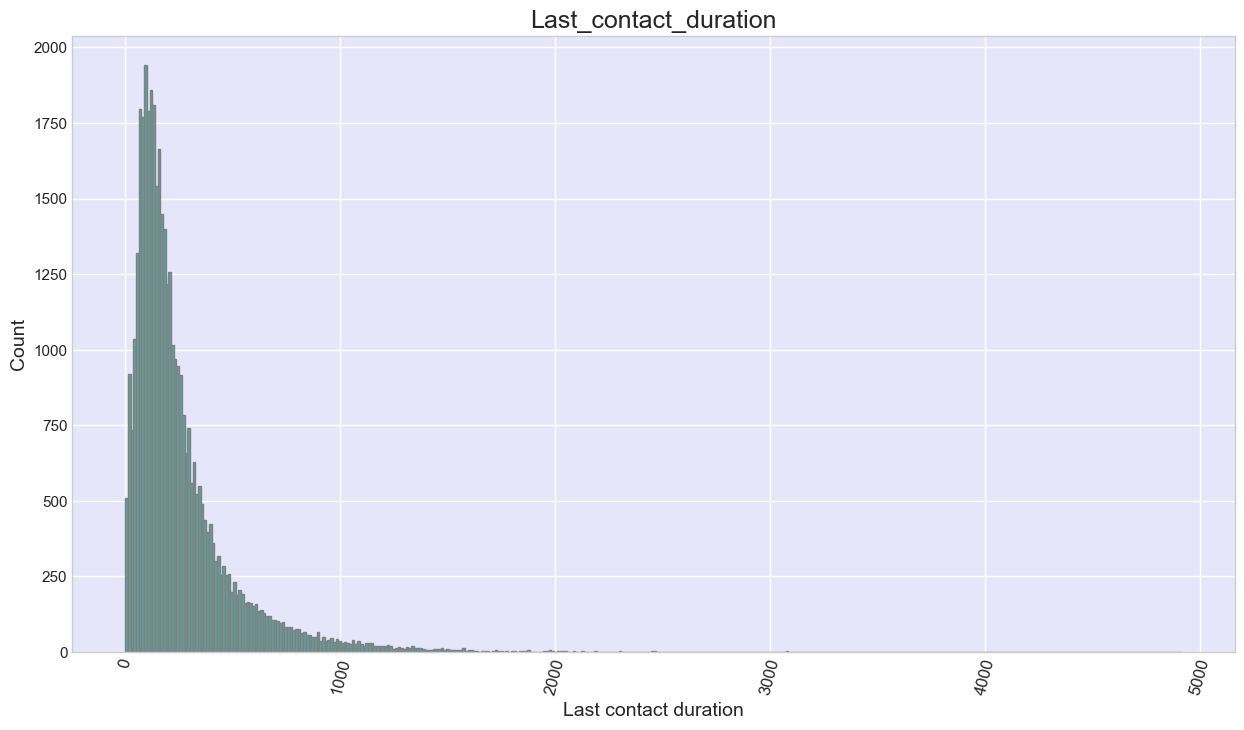

      counts  percentage
90       170        0.41
85       170        0.41
136      168        0.41
73       167        0.41
124      163        0.40
...      ...         ...
1569       1        0.00
1053       1        0.00
1263       1        0.00
1169       1        0.00
1868       1        0.00

[1544 rows x 2 columns]


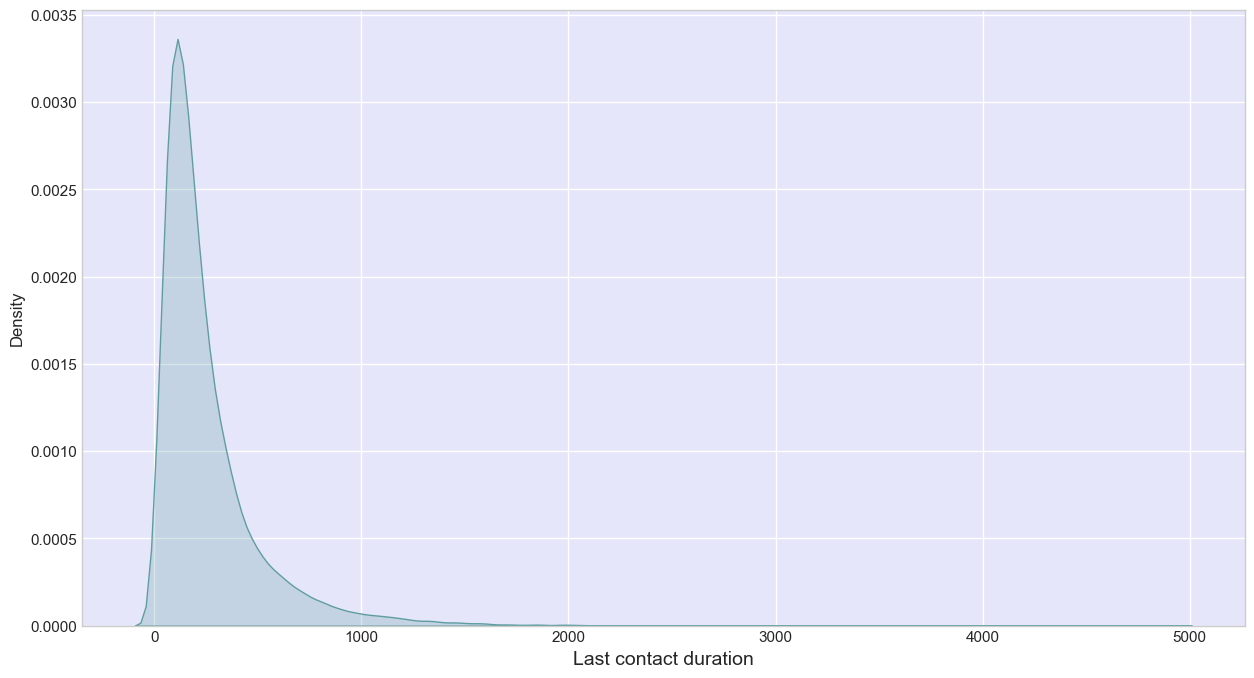

In [35]:
field="last_contact_duration"
xlabel="Last contact duration"
ylabel="Count"

plot_field(df_v2, field, xlabel, ylabel)

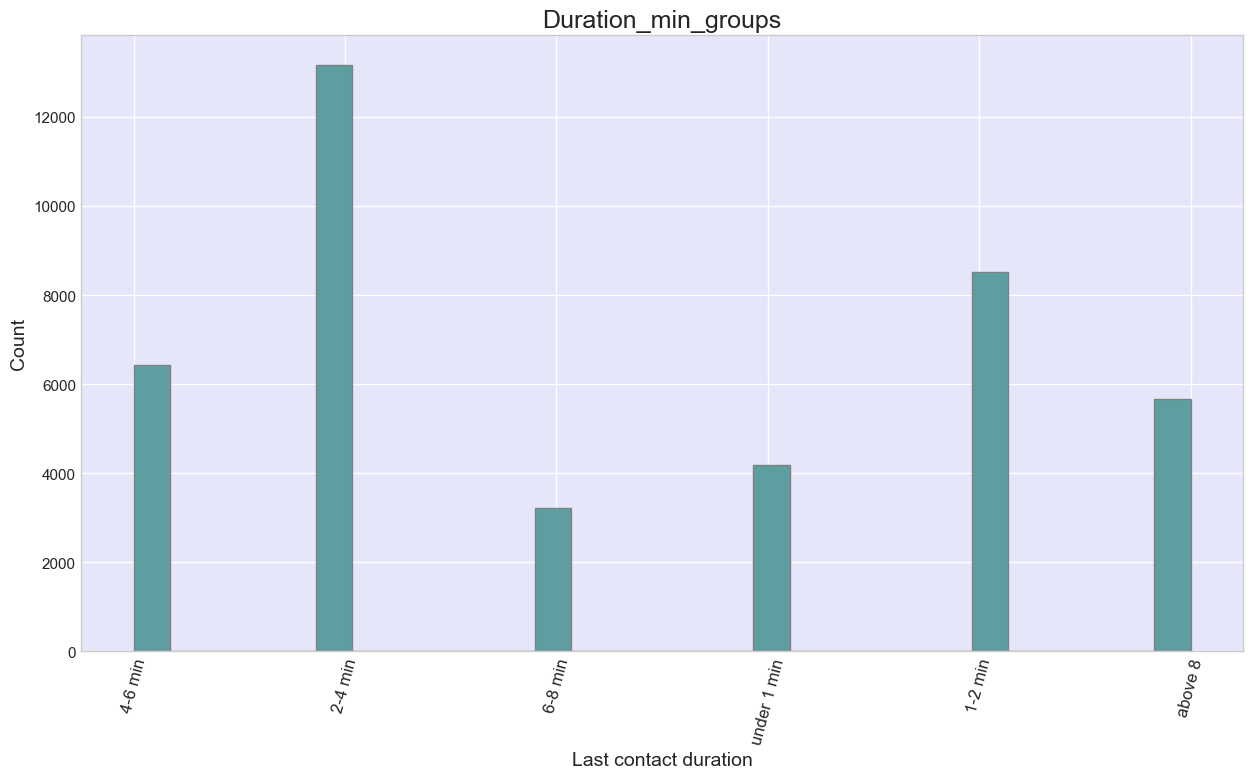

             counts  percentage
2-4 min       13172       31.99
1-2 min        8507       20.66
4-6 min        6435       15.63
above 8        5676       13.78
under 1 min    4175       10.14
6-8 min        3211        7.80


In [36]:
field="duration_min_groups"
xlabel="Last contact duration"
ylabel="Count"

plot_field(df_v2, field, xlabel, ylabel)

In [37]:
df_v2['last_contact_duration_min'].describe()

count    41176.000000
mean         4.305264
std          4.321755
min          0.000000
25%          1.700000
50%          3.000000
75%          5.316667
max         81.966667
Name: last_contact_duration_min, dtype: float64

In [38]:
df_v2['last_contact_duration'].max()

4918

## Other attributes

**12. Campaign**

Number of contacts performed during this campaign and for this client (numeric, includes last contact)

 - 43% of clients were called once, 25% of people - twice and 13% - 3 times
 - Someone was called 56 times!



    counts  percentage
1    17634       42.83
2    10568       25.67
3     5340       12.97
4     2650        6.44
5     1599        3.88
6      979        2.38
7      629        1.53
8      400        0.97
9      283        0.69
10     225        0.55
11     177        0.43
12     125        0.30
13      92        0.22
14      69        0.17
17      58        0.14
16      51        0.12
15      51        0.12
18      33        0.08
20      30        0.07
19      26        0.06
21      24        0.06
22      17        0.04
23      16        0.04
24      15        0.04
27      11        0.03
29      10        0.02
28       8        0.02
26       8        0.02
25       8        0.02
31       7        0.02
30       7        0.02
35       5        0.01
32       4        0.01
33       4        0.01
34       3        0.01
42       2        0.00
40       2        0.00
43       2        0.00
56       1        0.00
39       1        0.00
41       1        0.00
37       1        0.00


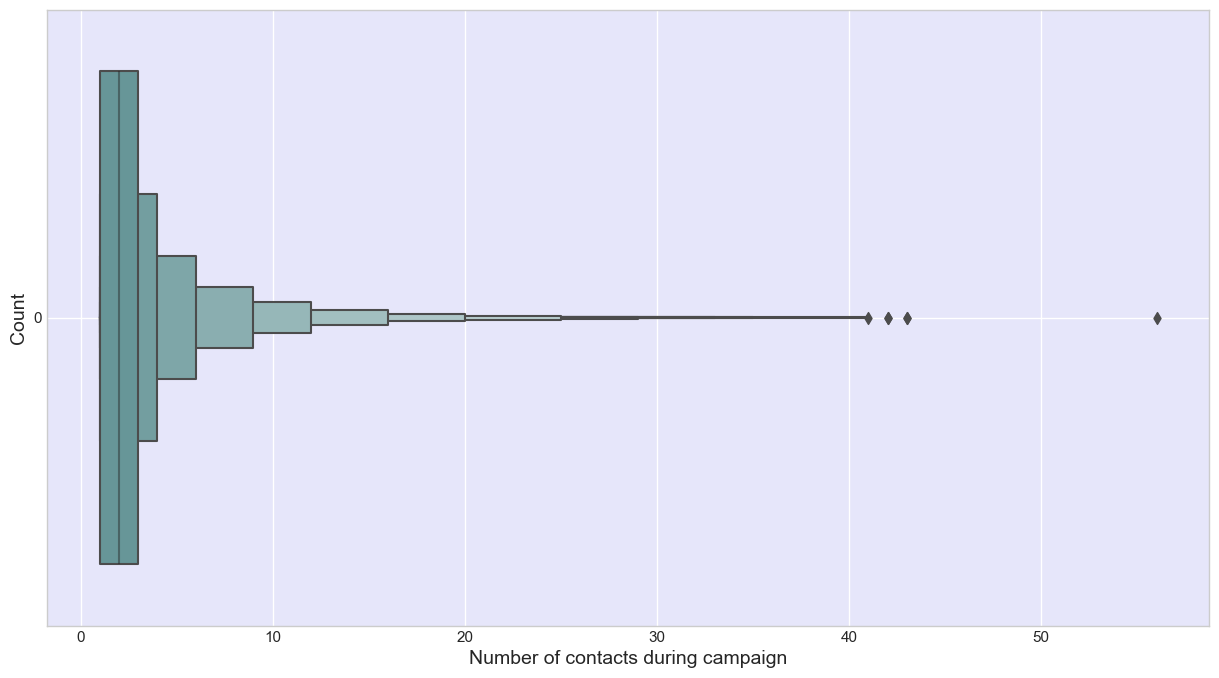

In [39]:
field="current_camp_contact_count"
xlabel="Number of contacts during campaign"
ylabel="Count"

plot_field(df_v2, field, xlabel, ylabel)

**13. Contacted or not**

 - 96% of people were contacted for the first time

In [40]:
field="contacted_or_not"
xlabel="Was the client contacted during a previous campaign?"
ylabel="Count"

plot_field(df_v2, field, xlabel, ylabel)

   counts  percentage
0   39661       96.32
1    1515        3.68


**14. Previous**

Number of contacts performed before this campaign and for this client (numeric)

 - 86% of clients were not contacted previously, this mismatches with the previous variable where it says that 96% of people were contacted for the first time
 - During the previous campaign, clients were contacted maximum 7 times

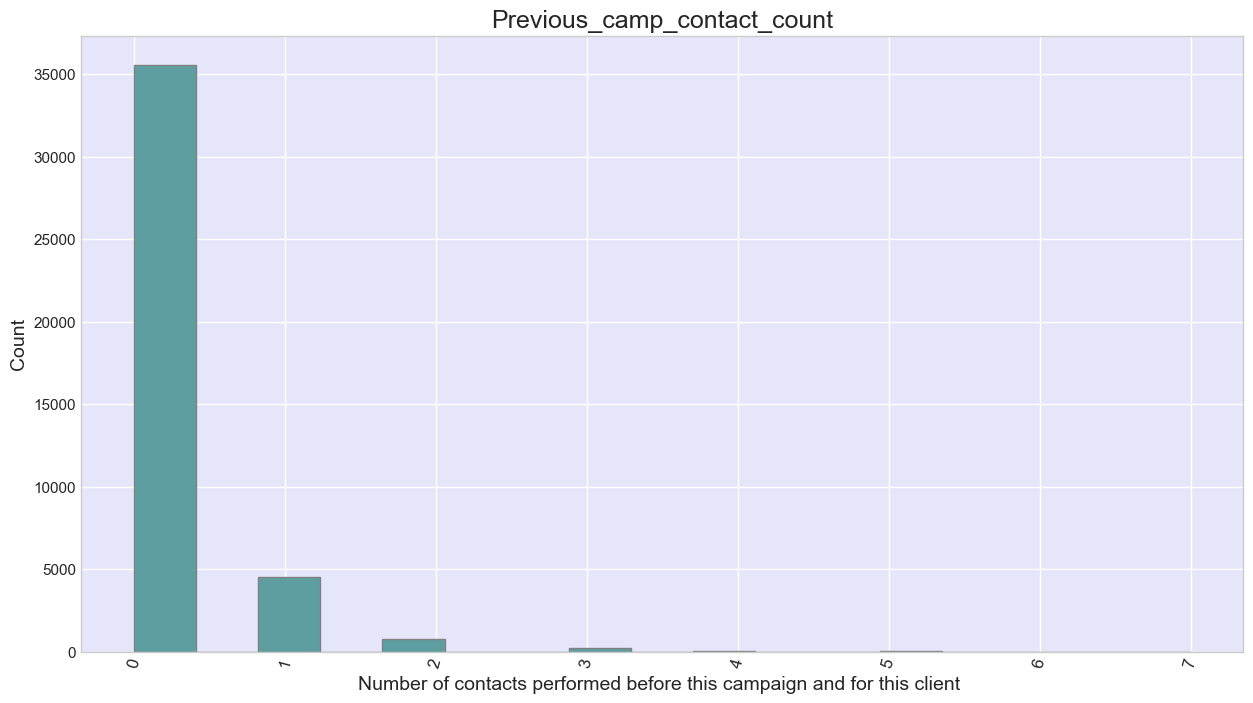

   counts  percentage
0   35551       86.34
1    4561       11.08
2     754        1.83
3     216        0.52
4      70        0.17
5      18        0.04
6       5        0.01
7       1        0.00


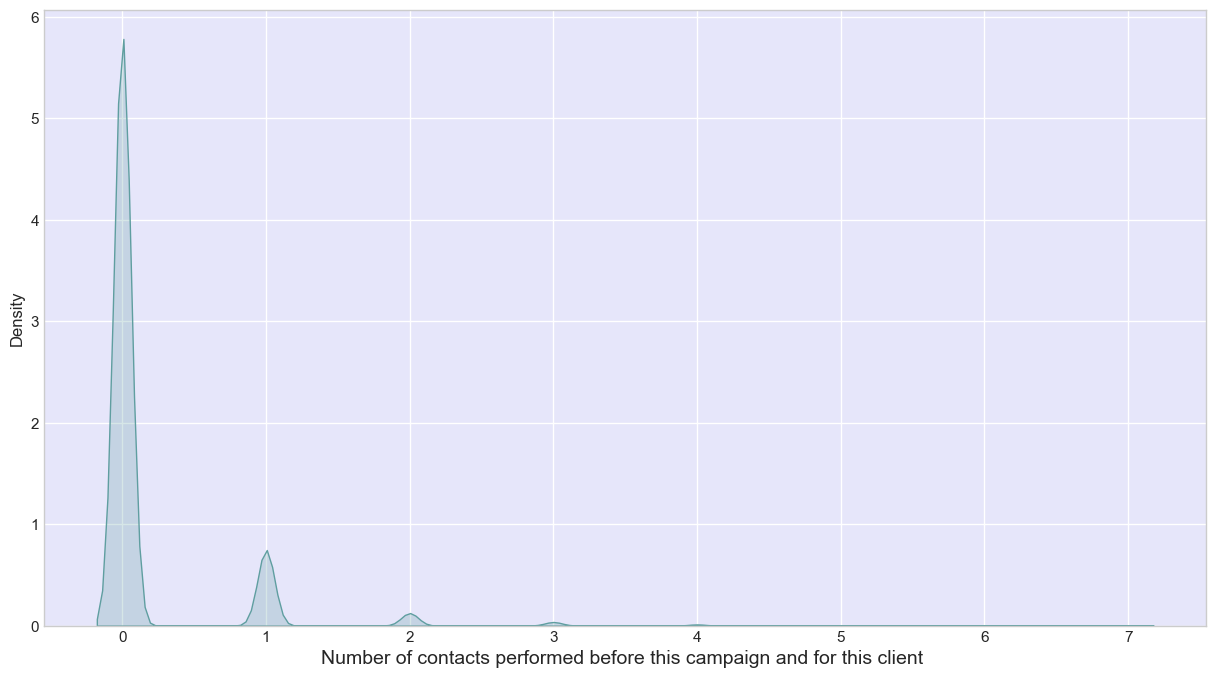

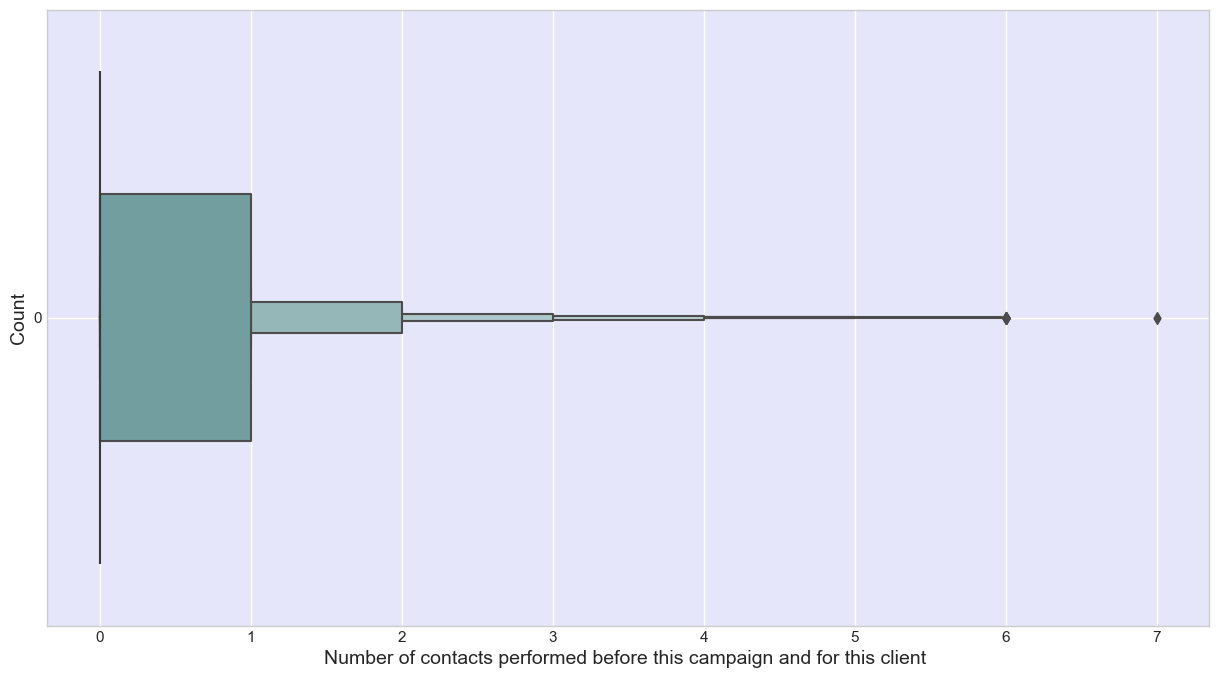

In [41]:
field="previous_camp_contact_count"
xlabel="Number of contacts performed before this campaign and for this client "
ylabel="Count"

plot_field(df_v2, field, xlabel, ylabel)

**15. Previous outcome**

Outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")

 - There is no information for 86% of clients which matches the indicator before that says that 86% of clients were contacted for the first time
 - Only 3,3% of clients subscribed to deposits in previous campaign

In [42]:
field="previous_outcome"
xlabel="Outcome of the previous marketing campaign"
ylabel="Count"

plot_field(df_v2, field, xlabel, ylabel)

             counts  percentage
nonexistent   35551       86.34
failure        4252       10.33
success        1373        3.33


#### Social and economic context attributes

**16. Employment variation rate**

Quarterly indicator (numeric)

**Emp.var.rate definition**: *Cyclical employment variation is essentially the variation of how many people are being hired or fired due to the shifts in the conditions of the economy. When the economy is in a recession or depression, people should be more conservative with their money and how the spend it because their financial future is less clear due to cyclical unemployment. When the economy is at its peak, individuals can be more open to risky investments because their employment options are greater (That means that the employment rate itself is not given but rather its variation.)*.

Employment variation rate varies from -3.4 till 1.4, here the mean is significantly lower than the median which means there are many negative values that impact the mean. 

- 39% of people were contacted when the rate was positive 1.4%;
- 22% of people were contacted when the rate was negative 1.8%;
- 19% of people were contacted when the rate was positive 1.1%

It seems logical that sales agents reached out during positive employment variation rate, however its not clear why they called when the rate was negative 1.8%


In [43]:
df_v2['employment_variation_rate'].describe()

count    41176.000000
mean         0.081922
std          1.570883
min         -3.400000
25%         -1.800000
50%          1.100000
75%          1.400000
max          1.400000
Name: employment_variation_rate, dtype: float64

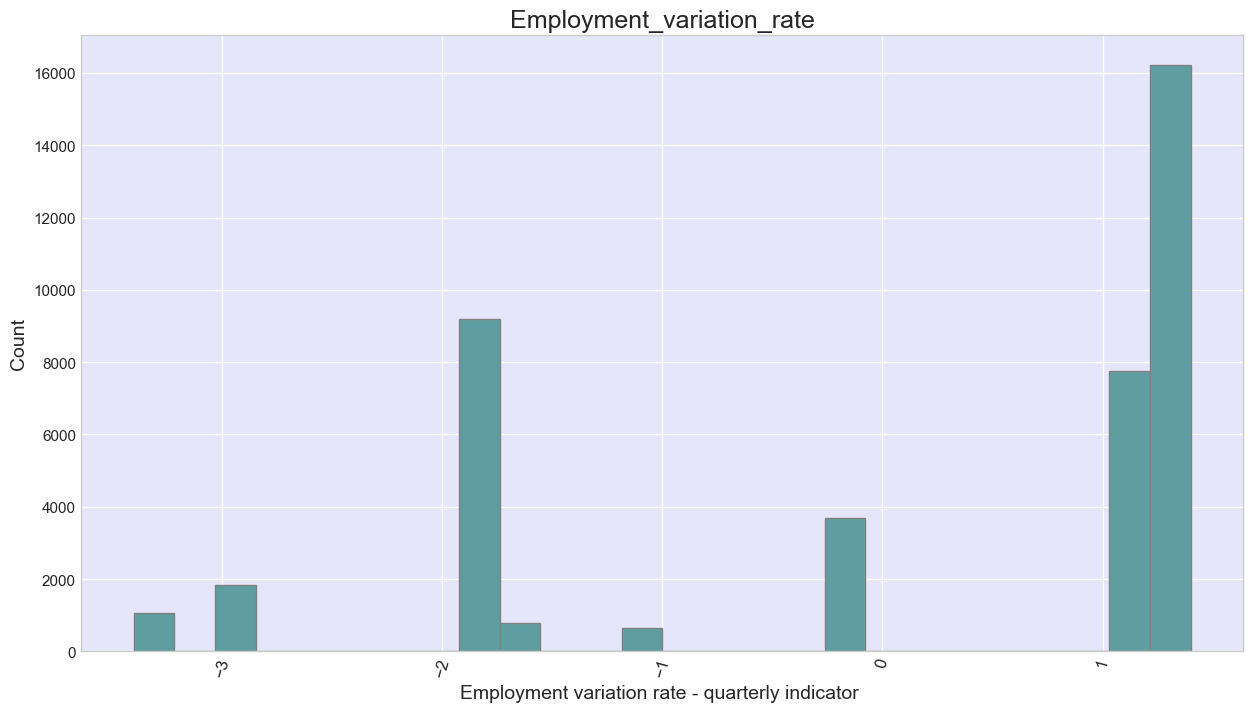

      counts  percentage
 1.4   16228       39.41
-1.8    9182       22.30
 1.1    7762       18.85
-0.1    3682        8.94
-2.9    1662        4.04
-3.4    1070        2.60
-1.7     773        1.88
-1.1     635        1.54
-3.0     172        0.42
-0.2      10        0.02


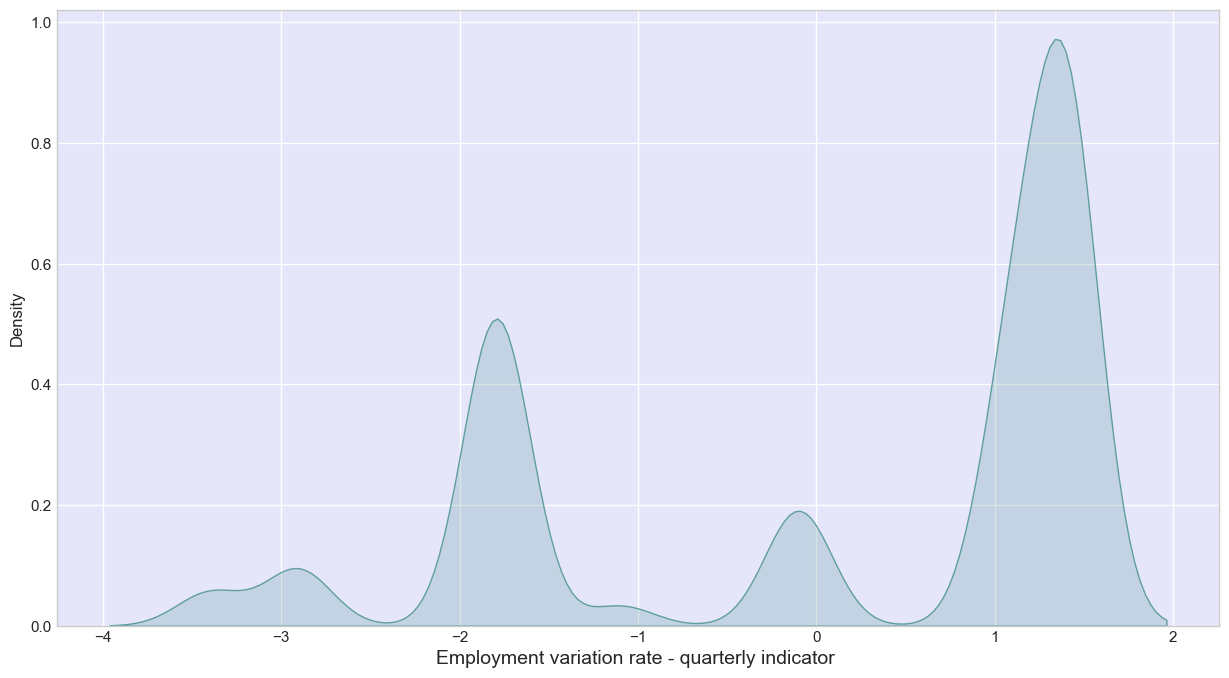

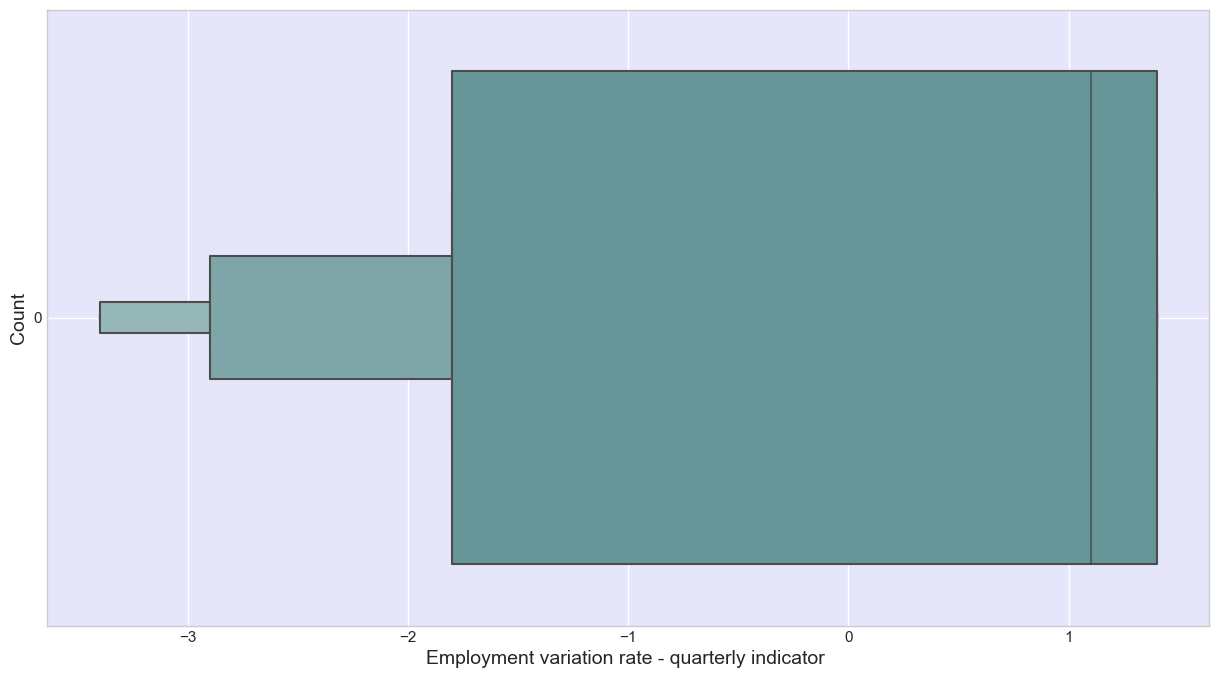

In [44]:
field="employment_variation_rate"
xlabel="Employment variation rate - quarterly indicator "
ylabel="Count"

plot_field(df_v2, field, xlabel, ylabel)

**17. Consumer price index**

Monthly indicator (numeric)  

**Consumer Price Index Definition**: *Based on the formula, i.e. if the index is below 100 that means that the cost of market basket has decreased in comparison with the base year which increases purchasing power of currency, if the index is above 100 that means that the cost of market basket increased and it decreases purchasing power of currency.Inflation is an increase of the price of goods and services in general terms. The Consumer Price Index is a measure of the inflation as experienced by people in their day-to-day life. CPI is just a part of inflation just like GDP, Cost-of-living indices, Producer price indices (PPIs), Commodity price indices and Core price indices.*

- Consumer price index which calculates monthly changes of market basket varies from 92.2 to 94.7, the mean and the median are quite close so that means there are no outliers that impact singificantly the mean. 
- There are no values above 100, i.e. there was no deflation of market basket price and no depreciation of currency
- Sales agents mostly called the clients when the rate was between 93 and 95.

In [45]:
df_v2['consumer_price_index'].describe()

count    41176.000000
mean        93.575720
std          0.578839
min         92.201000
25%         93.075000
50%         93.749000
75%         93.994000
max         94.767000
Name: consumer_price_index, dtype: float64

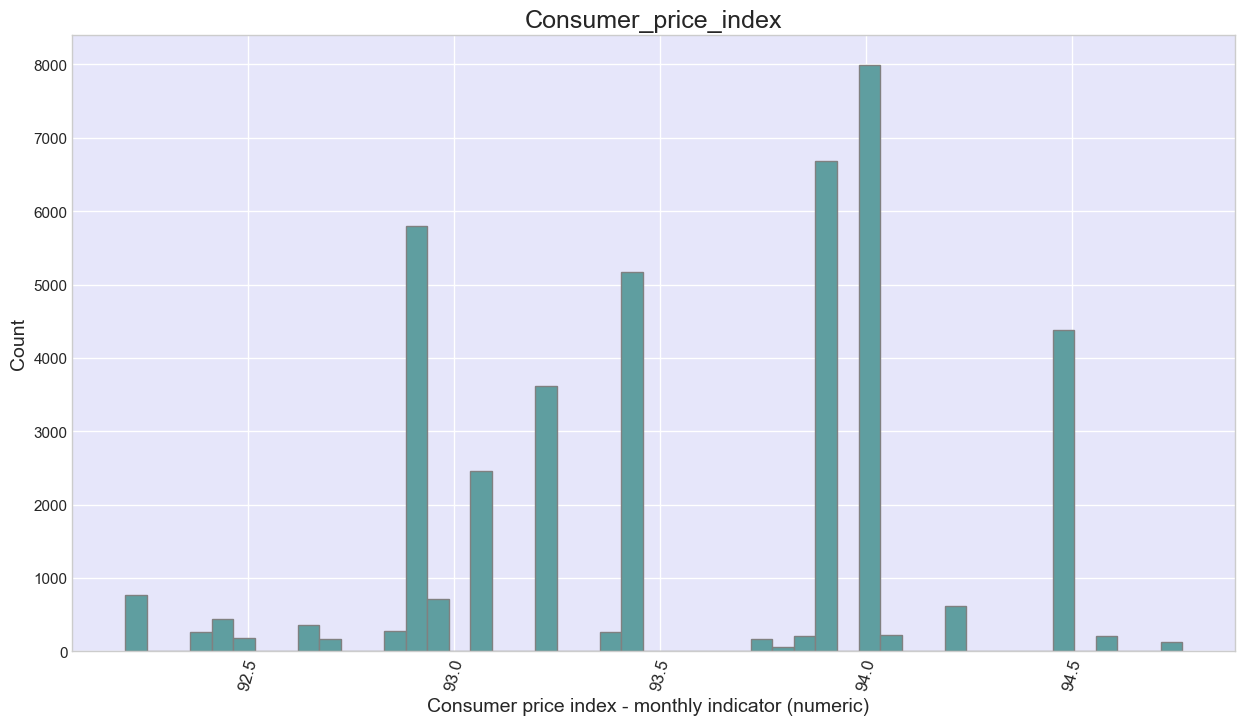

        counts  percentage
93.994    7762       18.85
93.918    6681       16.23
92.893    5793       14.07
93.444    5173       12.56
94.465    4374       10.62
93.200    3615        8.78
93.075    2457        5.97
92.201     770        1.87
92.963     715        1.74
92.431     446        1.08
92.649     357        0.87
94.215     311        0.76
94.199     303        0.74
92.843     282        0.68
92.379     267        0.65
93.369     264        0.64
94.027     233        0.57
94.055     229        0.56
93.876     212        0.51
94.601     204        0.50
92.469     177        0.43
93.749     174        0.42
92.713     172        0.42
94.767     128        0.31
93.798      67        0.16
92.756      10        0.02


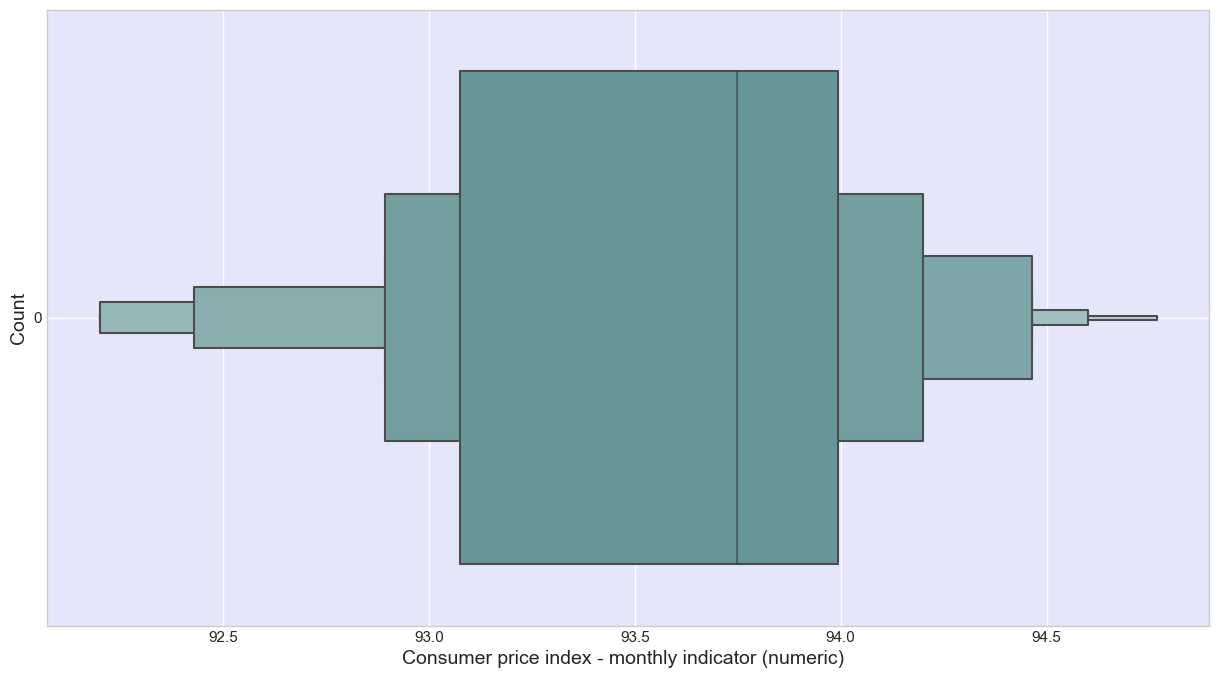

In [46]:
field="consumer_price_index"
xlabel="Consumer price index - monthly indicator (numeric)  "
ylabel="Count"

plot_field(df_v2, field, xlabel, ylabel)

**18. Consumer confidence index**

 Monthly indicator (numeric)  
 
 

**Consumer Confidence Index Definition**:  *Consumer confidence indicator provides an indication of future developments of households’ consumption and saving, based upon answers regarding their expected financial situation, their sentiment about the general economic situation, unemployment and capability of savings. An indicator above 100 signals a boost in the consumers’ confidence towards the future economic situation, as a consequence of which they are less prone to save, and more inclined to spend money on major purchases in the next 12 months. Values below 100 indicate a pessimistic attitude towards future developments in the economy, possibly resulting in a tendency to save more and consume less*. 

- This index varies from -50 to -26, the mean and the median are quite the same, i.e. there are no outliers that significsntly impact the mean;
- The Portuguese economy belongs to developing economies and was significantly hit by the crisis of 2008, therefore such negative rates.

In [47]:
df_v2['consumer_confidence_index'].describe()

count    41176.000000
mean       -40.502863
std          4.627860
min        -50.800000
25%        -42.700000
50%        -41.800000
75%        -36.400000
max        -26.900000
Name: consumer_confidence_index, dtype: float64

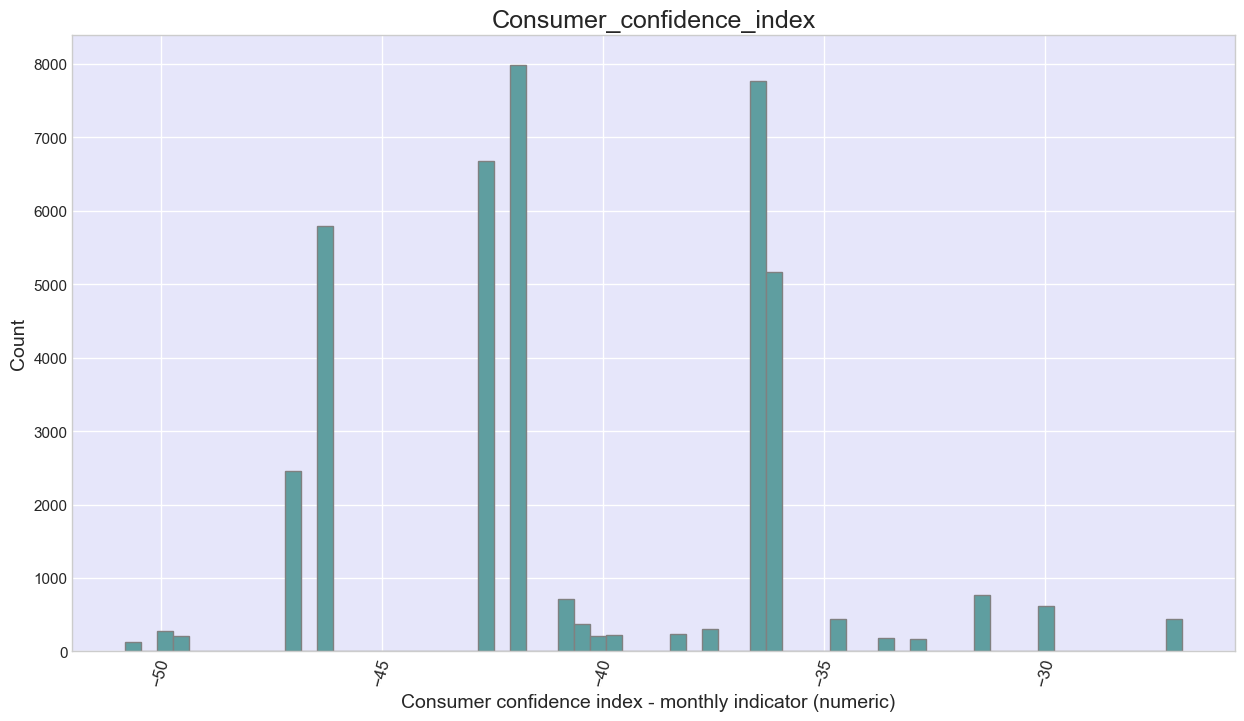

       counts  percentage
-36.4    7762       18.85
-42.7    6681       16.23
-46.2    5793       14.07
-36.1    5173       12.56
-41.8    4374       10.62
-42.0    3615        8.78
-47.1    2457        5.97
-31.4     770        1.87
-40.8     715        1.74
-26.9     446        1.08
-30.1     357        0.87
-40.3     311        0.76
-37.5     303        0.74
-50.0     282        0.68
-29.8     267        0.65
-34.8     264        0.64
-38.3     233        0.57
-39.8     229        0.56
-40.0     212        0.51
-49.5     204        0.50
-33.6     177        0.43
-34.6     174        0.42
-33.0     172        0.42
-50.8     128        0.31
-40.4      67        0.16
-45.9      10        0.02


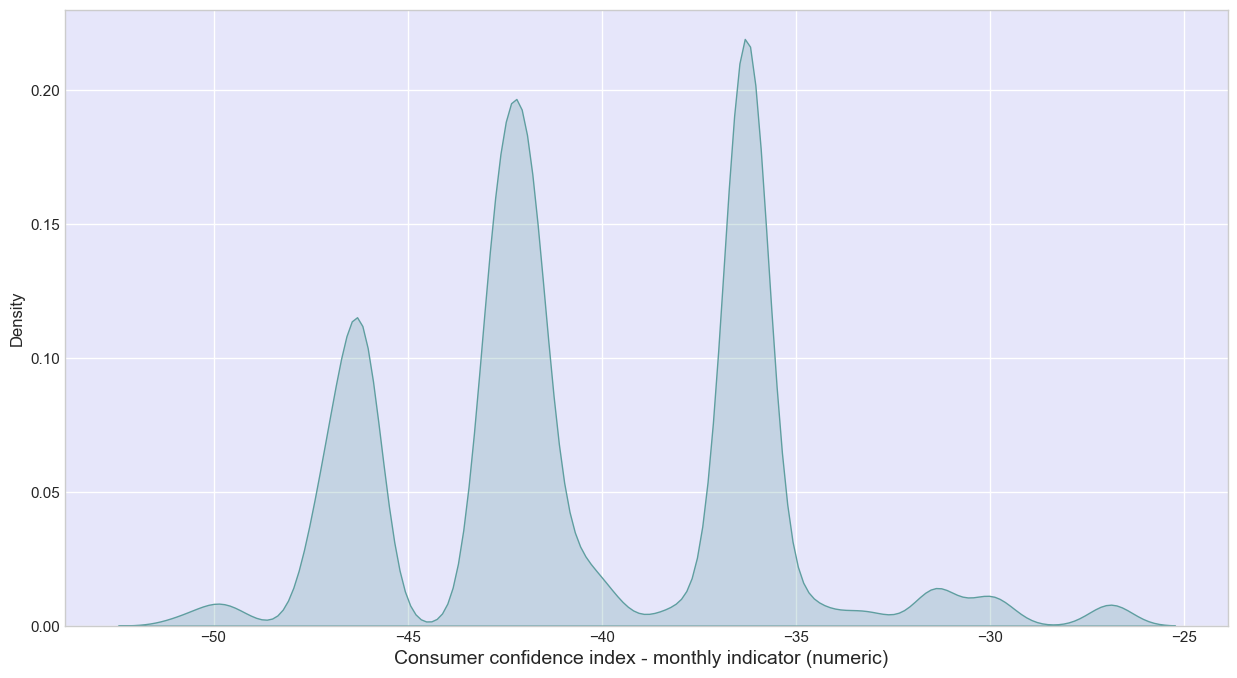

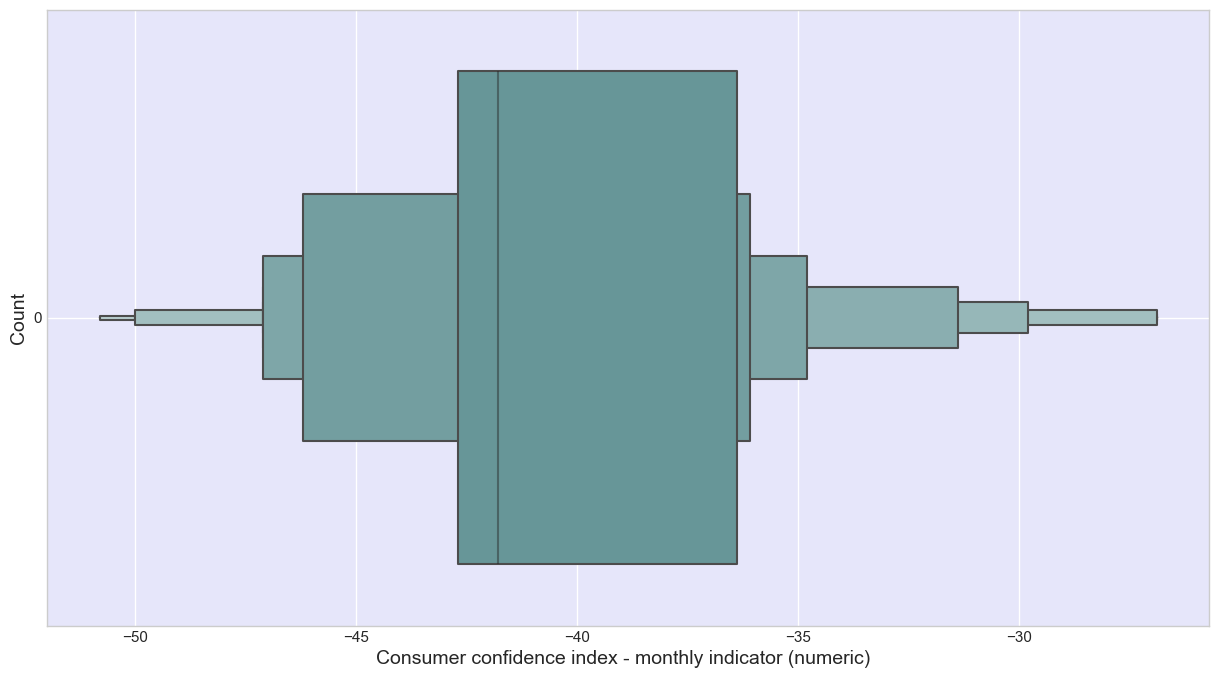

In [48]:
field="consumer_confidence_index"
xlabel="Consumer confidence index - monthly indicator (numeric)  "
ylabel="Count"

plot_field(df_v2, field, xlabel, ylabel)

**19. European Interbank Rate**

3 months rate - daily indicator (numeric)


**Euribor 3 months rate Definition**: *Euribor is short for Euro Interbank Offered Rate. The Euribor rates are based on the interest rates at which a panel of European banks borrow funds from one another. In the calculation, the highest and lowest 15% of all the quotes collected are eliminated. The remaining rates will be averaged and rounded to three decimal places. Euribor is determined and published at about 11:00 am each day, Central European Time. Why is Euribor important? The Euribor rates are important because these rates provide the basis for the price or interest rate of all kinds of financial products, like interest rate swaps, interest rate futures, **saving accounts** and mortgages*. 

- Euribor3m varies from 0.6 to 5.The mean (3.6) is significantly higher than the median (4.9), i.e. there are rates that are significantly low and impact the mean by making it lower than the median.
- High interest rates can impact deposit percentage. So sales agents should be reaching out during higher interest rates because saving become more attractive. But looking at the data, it seems there was no special startegy related to euribor index

In [49]:
df_v2['euro_interbank_rate'].describe()

count    41176.000000
mean         3.621293
std          1.734437
min          0.634000
25%          1.344000
50%          4.857000
75%          4.961000
max          5.045000
Name: euro_interbank_rate, dtype: float64

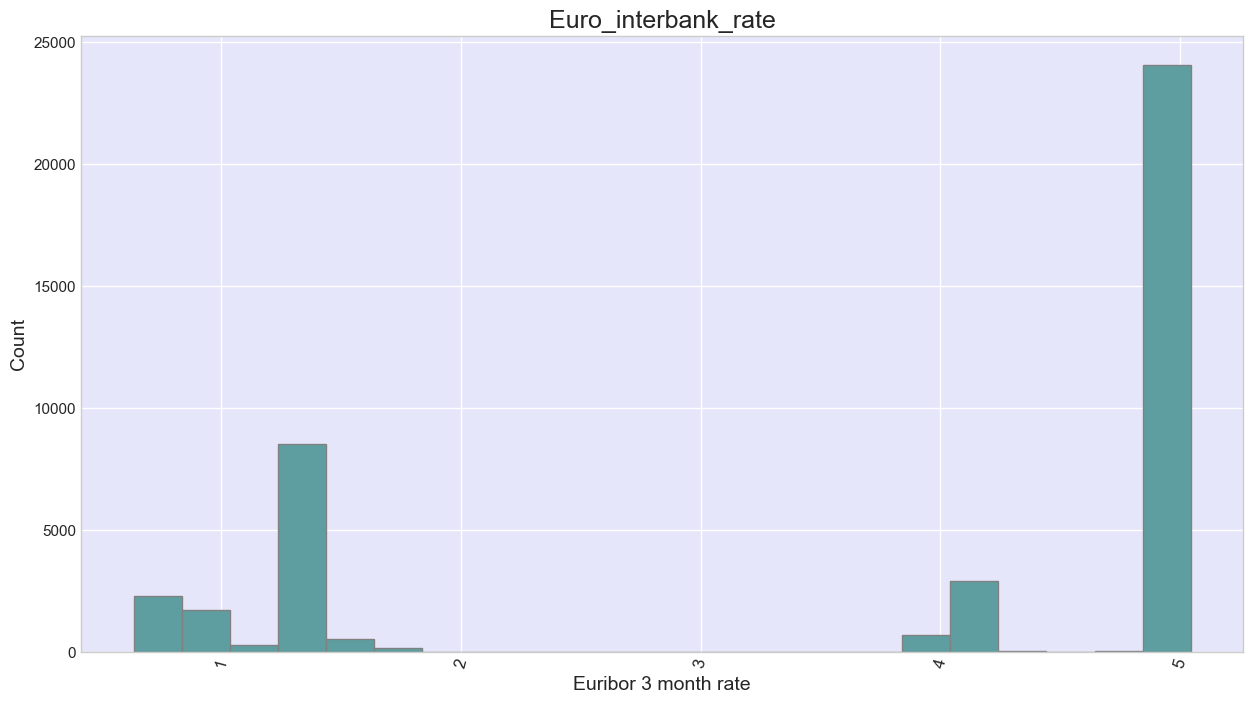

       counts  percentage
4.857    2868        6.97
4.962    2611        6.34
4.963    2487        6.04
4.961    1902        4.62
4.856    1210        2.94
...       ...         ...
3.853       1        0.00
3.901       1        0.00
0.969       1        0.00
0.956       1        0.00
3.669       1        0.00

[316 rows x 2 columns]


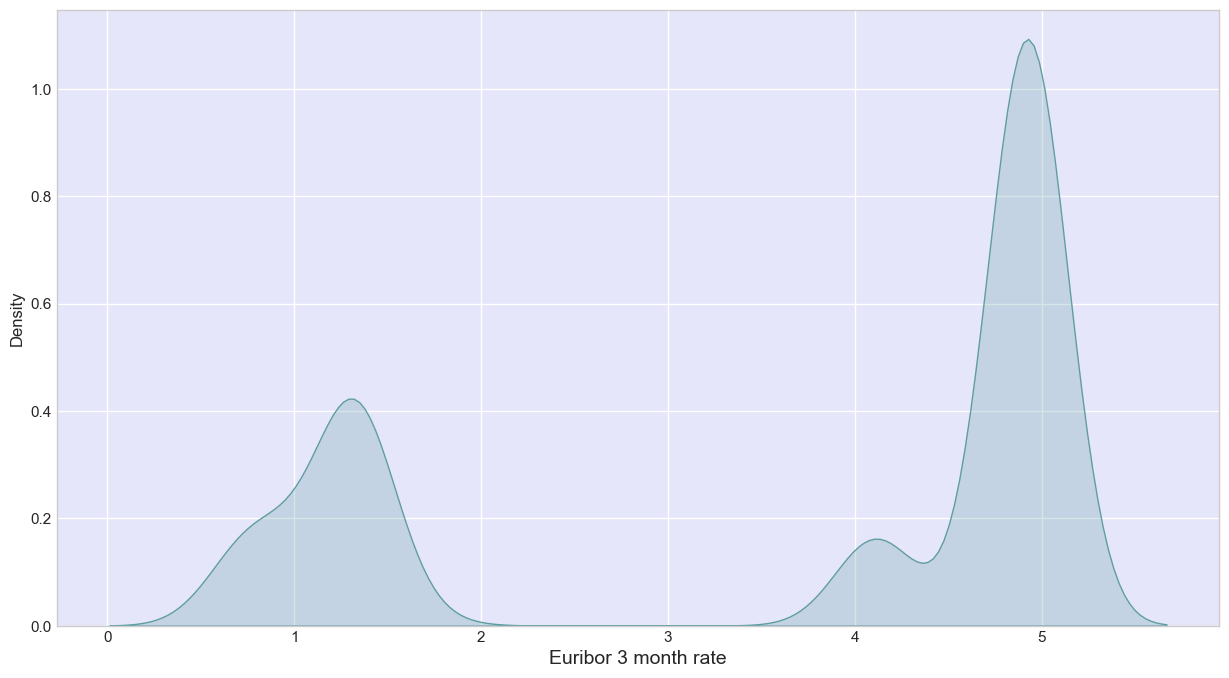

In [50]:
field="euro_interbank_rate"
xlabel="Euribor 3 month rate"
ylabel="Count"

plot_field(df_v2, field, xlabel, ylabel)

**20. Number of employees**

 Quarterly indicator (numeric)
 
 - Number of employees variates around 5000
 

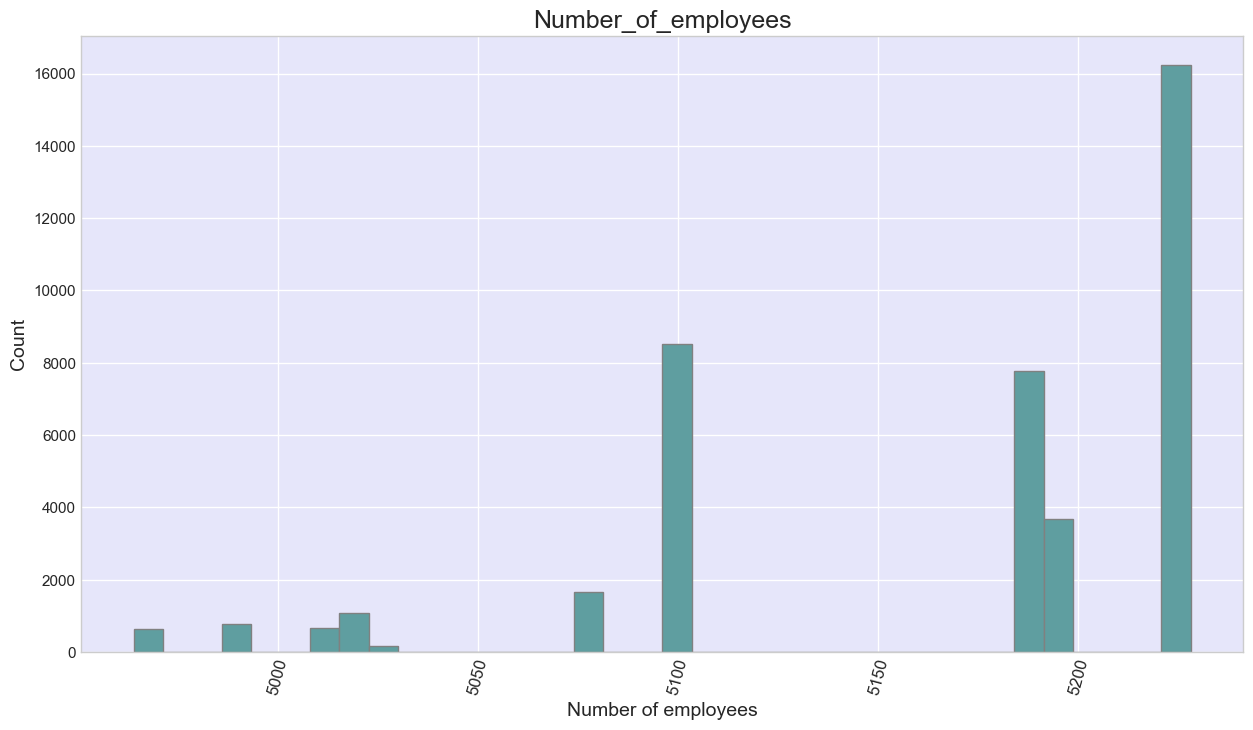

      counts  percentage
5228   16228       39.41
5099    8532       20.72
5191    7762       18.85
5196    3682        8.94
5076    1662        4.04
5018    1070        2.60
4992     773        1.88
5009     650        1.58
4964     635        1.54
5024     172        0.42
5176      10        0.02


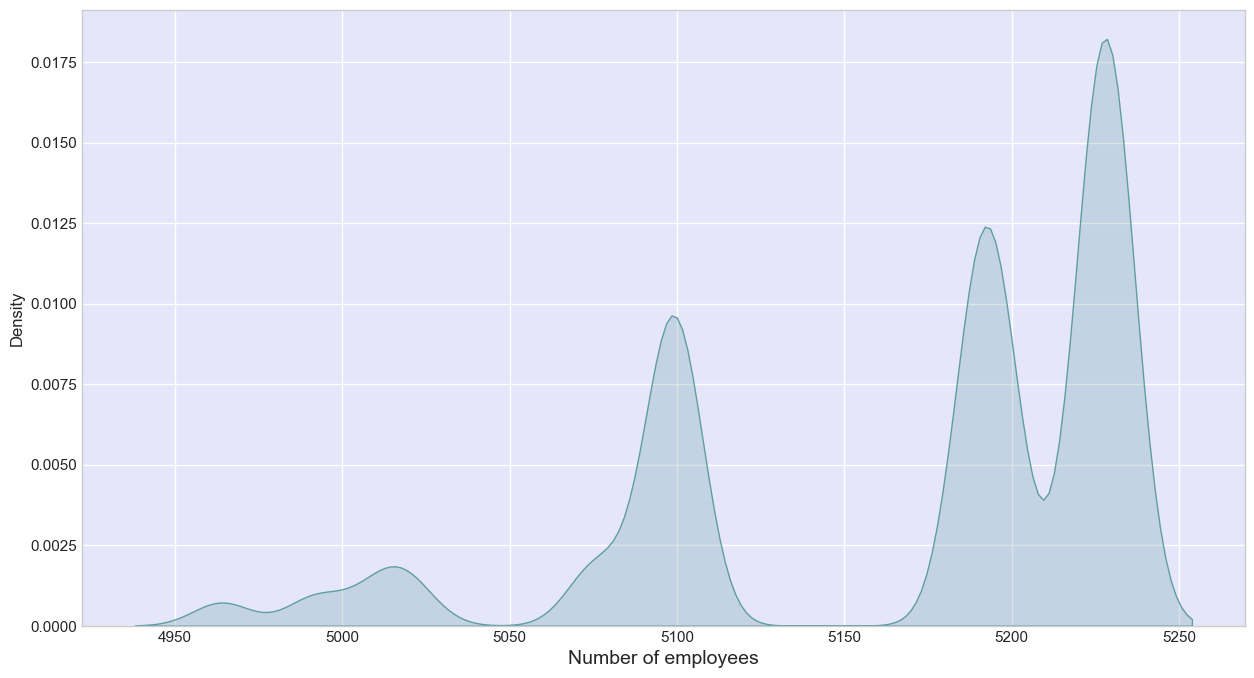

In [51]:
field="number_of_employees"
xlabel="Number of employees"
ylabel="Count"

plot_field(df_v2, field, xlabel, ylabel)

**Output Variable: Current outcome**

Has the client subscribed to a term deposit?**

(binary: "yes","no")

- Only 11.27% of customers subscribed to deposits

In [52]:
field="current_outcome"
xlabel="Has the client subscribed a term deposit?"
ylabel="Count"

plot_field(df_v2, field, xlabel, ylabel)

   counts  percentage
0   36537       88.73
1    4639       11.27


<h3><p style="color:white;font-size:150%;background-color:slateblue;padding:12px;border-radius: 8px">Bivariate Analysis </p></h3>

### Numeric vs numeric analysis

**Correlation Matrix**

In [53]:
corr = df_v2.corr().round(1)
print(corr)

                             age  last_contact_duration  \
age                          1.0                   -0.0   
last_contact_duration       -0.0                    1.0   
current_camp_contact_count   0.0                   -0.1   
previous_camp_contact_count  0.0                    0.0   
employment_variation_rate   -0.0                   -0.0   
consumer_price_index         0.0                    0.0   
consumer_confidence_index    0.1                   -0.0   
euro_interbank_rate          0.0                   -0.0   
number_of_employees         -0.0                   -0.0   
last_contact_duration_min   -0.0                    1.0   

                             current_camp_contact_count  \
age                                                 0.0   
last_contact_duration                              -0.1   
current_camp_contact_count                          1.0   
previous_camp_contact_count                        -0.1   
employment_variation_rate                           0.2

In [54]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df_v2.corr(),cmap="RdBu",annot=True, linewidths=.5)


<AxesSubplot:>

- All macroeconomic indicators 'Employment Variation Rate', 'Consumer Confidence Index' and 'Consumer Price Index' are highly correlated. **This can impact the model because of multicollinearity and it will be required to remove some of them;**
- 'Previous Campaign Contact Count' has a strong negative correlations with all three macroeconomic indicators and 'Number of employees'.

**Signifiance of correlation**

In [55]:
from scipy.stats import pearsonr
import numpy as np
corr = df_v2.corr()
pval = df_v2.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*corr.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [0.01,0.05,0.1] if x<=t]))
corr.round(2).astype(str) + p

age last_contact_duration  \
age                            1.0***                  -0.0   
last_contact_duration            -0.0                1.0***   
current_camp_contact_count        0.0              -0.07***   
previous_camp_contact_count   0.02***               0.02***   
employment_variation_rate        -0.0              -0.03***   
consumer_price_index              0.0                  0.01   
consumer_confidence_index     0.13***                -0.01*   
euro_interbank_rate            0.01**              -0.03***   
number_of_employees          -0.02***              -0.04***   
last_contact_duration_min        -0.0                1.0***   

                            current_camp_contact_count  \
age                                                0.0   
last_contact_duration                         -0.07***   
current_camp_contact_count                      1.0***   
previous_camp_contact_count                   -0.08***   
employment_variation_rate                      0.15***   
consumer_price_index                           0.13***   
consumer_confidence_index                     -0.01***   
euro_interbank_rate                            0.14***   
number_of_employees                            0.14***   
last_contact_duration_min                     -0.07***   

                            previous_camp_contact_count  \
age                                             0.02***   
last_contact_duration                           0.02***   
current_camp_contact_count                     -0.08***   
previous_camp_contact_count                      1.0***   
employment_variation_rate                      -0.42***   
consumer_price_index                            -0.2***   
consumer_confidence_index                      -0.05***   
euro_interbank_rate                            -0.45***   
number_of_employees                             -0.5***   
last_contact_duration_min                       0.02***   

                            employment_variation_rate consumer_price_index  \
age                                              -0.0                  0.0   
last_contact_duration                        -0.03***                 0.01   
current_camp_contact_count                    0.15***              0.13***   
previous_camp_contact_count                  -0.42***              -0.2***   
employment_variation_rate                      1.0***              0.78***   
consumer_price_index                          0.78***               1.0***   
consumer_confidence_index                      0.2***              0.06***   
euro_interbank_rate                           0.97***              0.69***   
number_of_employees                           0.91***              0.52***   
last_contact_duration_min                    -0.03***                 0.01   

                            consumer_confidence_index euro_interbank_rate  \
age                                           0.13***              0.01**   
last_contact_duration                          -0.01*            -0.03***   
current_camp_contact_count                   -0.01***             0.14***   
previous_camp_contact_count                  -0.05***            -0.45***   
employment_variation_rate                      0.2***             0.97***   
consumer_price_index                          0.06***             0.69***   
consumer_confidence_index                      1.0***             0.28***   
euro_interbank_rate                           0.28***              1.0***   
number_of_employees                            0.1***             0.95***   
last_contact_duration_min                      -0.01*            -0.03***   

                            number_of_employees last_contact_duration_min  
age                                    -0.02***                      -0.0  
last_contact_duration                  -0.04***                    1.0***  
current_camp_contact_count              0.14***                  -0.07***  
previous_camp_contact_count             

**Pairplot**

Observations:
- 'Last Contact Duration' and 'Age': Population of clients who have subscribed are in higher threshold than clients who have not -> selling deposits requires longer conversations;
- 'Current Campaign Contact Count' and 'Age': Calling frequently, more than 10 times a single customer does not result in subscriptions;
- 'Employment Varitation Rate' and 'Age': Clients subscribe during more turbulent labor market conditions when the employment varation rate was negative from -1 to -3 with heterogeneous age groups;
- 'Euro Interbank Rate' and 'Age': More clients below 50 years old subscribed to deposits during beneficial times of higher interbank rates, heterogeneous age groups subscribed when the rate was from 1 to 2;


- 'Current Campaign Contact Count' and 'Last Contact Duration': There are two distinct populations of clients who were frequently contacted, more than 10 times and whose call duration was shorter that the second group, and 
the second group that subscribed was called less than 10 times and had longer conversations that - **sales agents should not contact clients more than 10 times**;

- 'Employment Variation Rate' Density Plot: more clients subscribed when the rate was negative and the employment options narrowed which motivated the clients to save more;
- 'Consumer Confidence Index' and 'Consumer Price Index' did not show any interesting correlations.

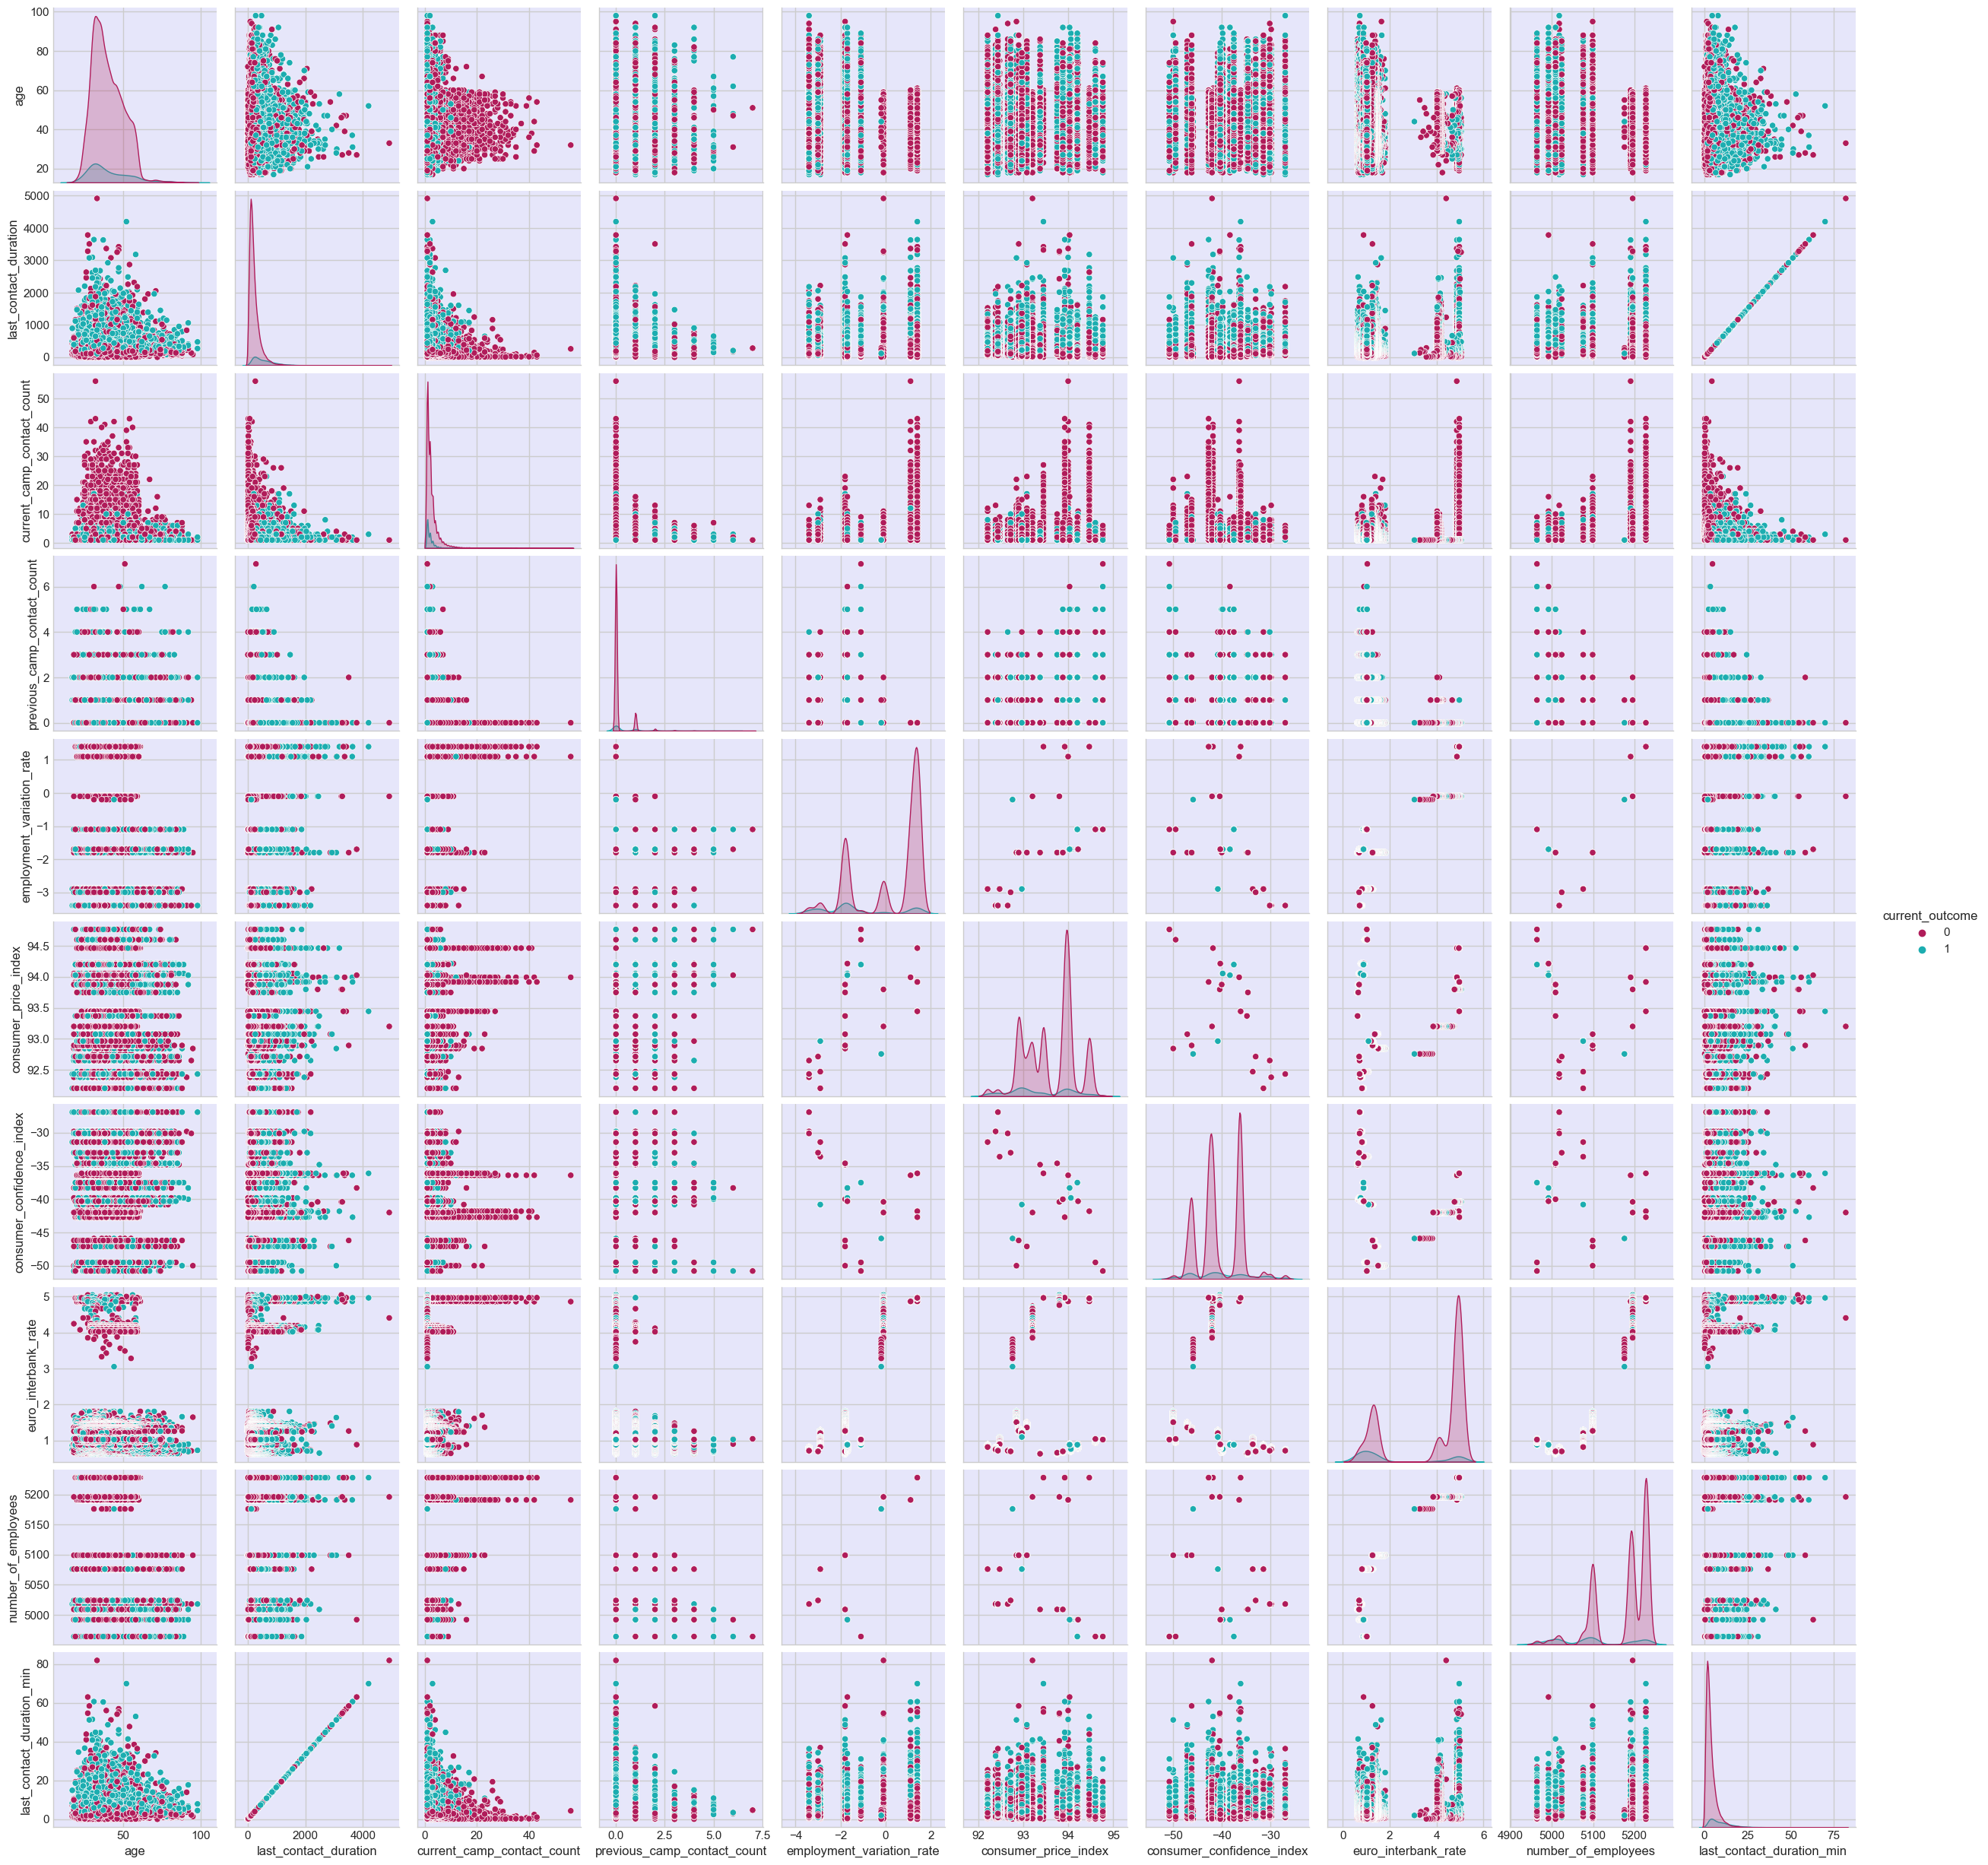

Wall time: 10min 33s


In [56]:
%%time
sns.pairplot(df_v2, hue = 'current_outcome',palette=["#b01c5a","#1cadb0"])
sns.set(rc = {'figure.figsize':(60,60)})
plt.show()

### Numerical vs categorical analysis

Observations:
- There are no particular insights except that older people subscribe more frequently and that call duration for those who subscribed is obviously longer.

In [57]:
g=sns.boxplot(x='educational_attainment',y='age', data=df_v2,hue='current_outcome', palette=["#b01c5a","#1cadb0"])
sns.set(rc = {'figure.figsize':(15,8)})
g.set_xlabel('Educational Attainment')
g.set_ylabel('Age')
g.set_title('Age Distribution by Education', fontsize=18)
plt.show(g);

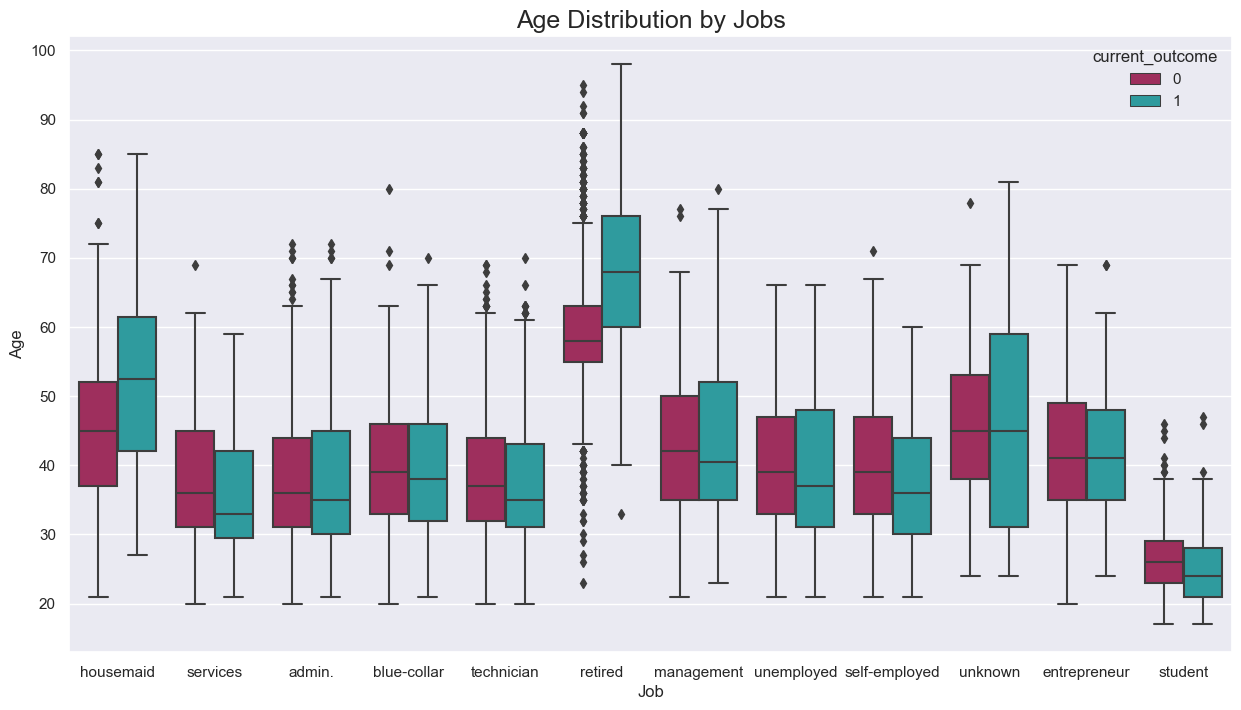

In [58]:
g=sns.boxplot(x='job',y='age', data=df_v2,hue='current_outcome', palette=["#b01c5a","#1cadb0"])
sns.set(rc = {'figure.figsize':(15,8)})
g.set_xlabel('Job')
g.set_ylabel('Age')
g.set_title('Age Distribution by Jobs',fontsize=18)

plt.show(g);

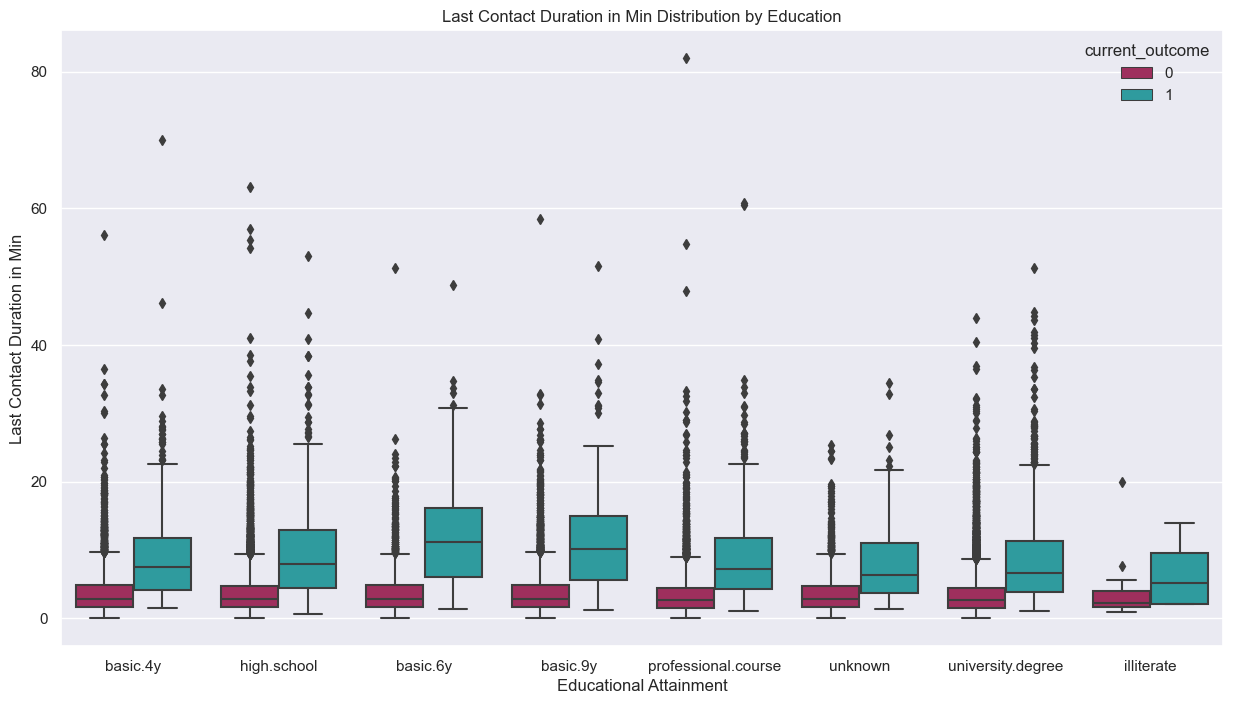

In [59]:
g=sns.boxplot(x='educational_attainment',y='last_contact_duration_min', data=df_v2,hue='current_outcome', palette=["#b01c5a","#1cadb0"])
sns.set(rc = {'figure.figsize':(15,8)})
g.set_xlabel('Educational Attainment')
g.set_ylabel('Last Contact Duration in Min')
g.set_title('Last Contact Duration in Min Distribution by Education')

plt.show(g);

In [60]:
g=sns.boxplot(x='job',y='last_contact_duration_min', data=df_v2,hue='current_outcome', palette=["#b01c5a","#1cadb0"])
sns.set(rc = {'figure.figsize':(15,8)})
g.set_xlabel('Job')
g.set_ylabel('Last Contact Duration in Min')
g.set_title('Last Contact Duration in Min Distribution by Jobs')

plt.show(g);

### Categorical vs Categorical

In [61]:
def plot_bivariate(field, xlabel, ylabel):
    #countplot
    ax=sns.countplot(y=df_v2[field], hue='current_outcome', data=df_v2, order=df_v2[field].value_counts().index, palette=["#b01c5a","#1cadb0"])
    sns.set(rc = {'figure.figsize':(20,10)})
    sns.move_legend(ax, "lower right")
    total = len(df['job'])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
           
   
    plt.title(field.capitalize(), fontsize=16)
    plt.xlabel(xlabel.capitalize(), fontsize = 12)
    plt.ylabel(ylabel, fontsize = 11)
    plt.style.use('seaborn-whitegrid')
    plt.grid(color='white')
    plt.rcParams['axes.facecolor'] = 'lavender'
    plt.show()
    
    #crosstab
    data_crosstab = pd.crosstab(df_v2[field], df_v2['current_outcome'], margins =True)
    print(data_crosstab)

**Job Categories by Subscription**

- **Admin positions, blue-collars and technicians** subscribed the most but they were also contacted and targeted the most;
- Students and retired subscribed proportionally more frequently despite of not being contacted many times - **students and retired should get a special attention in the next campaign**

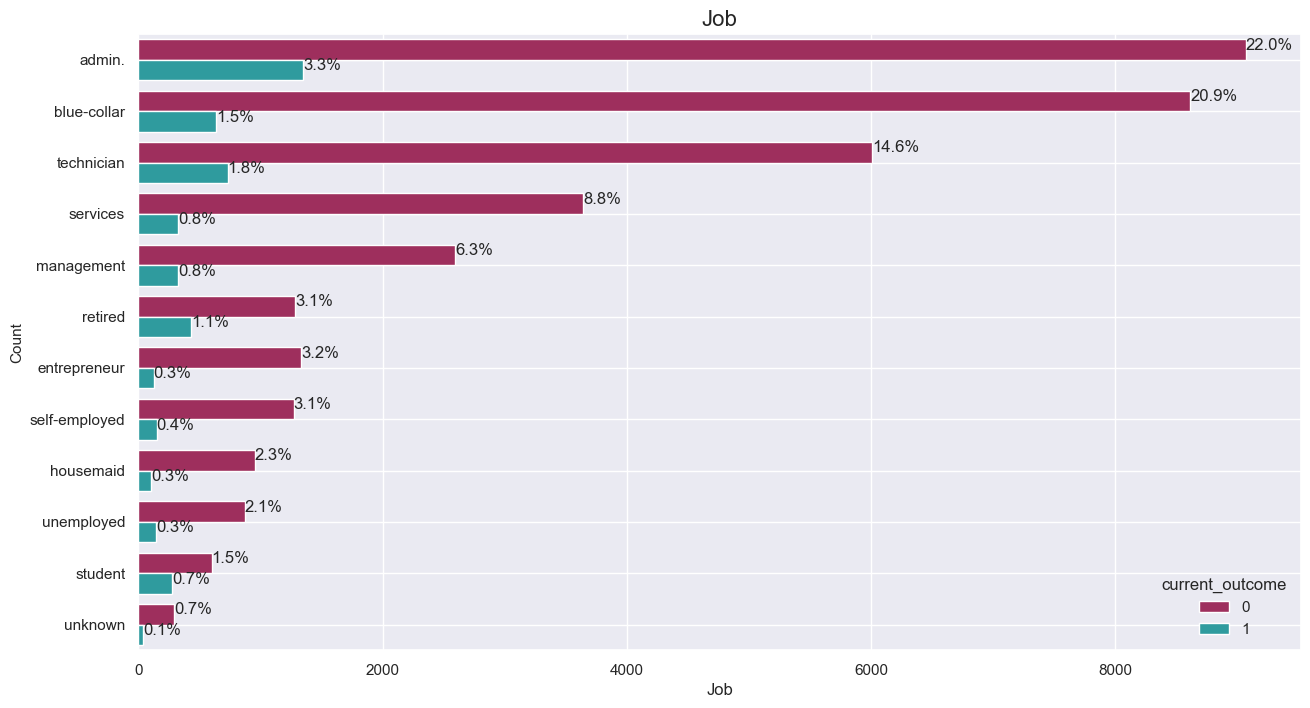

current_outcome      0     1    All
job                                
admin.            9068  1351  10419
blue-collar       8615   638   9253
entrepreneur      1332   124   1456
housemaid          954   106   1060
management        2596   328   2924
retired           1284   434   1718
self-employed     1272   149   1421
services          3644   323   3967
student            600   275    875
technician        6009   730   6739
unemployed         870   144   1014
unknown            293    37    330
All              36537  4639  41176


In [62]:
field="job"
xlabel="Job"
ylabel="Count"

plot_bivariate(field, xlabel, ylabel)

**Marital Status by Subscription**

Married people are the most involved group, followed by unmarried people

In [63]:
field="marital_status"
xlabel="Marital Status"
ylabel="Count"

plot_bivariate(field, xlabel, ylabel)

current_outcome      0     1    All
marital_status                     
divorced          4135   476   4611
married          22390  2531  24921
single            9944  1620  11564
unknown             68    12     80
All              36537  4639  41176


**Educational Attainment by Subscription**

- Clients with **university degree, high school diploma and professional courses** subscribed the most;

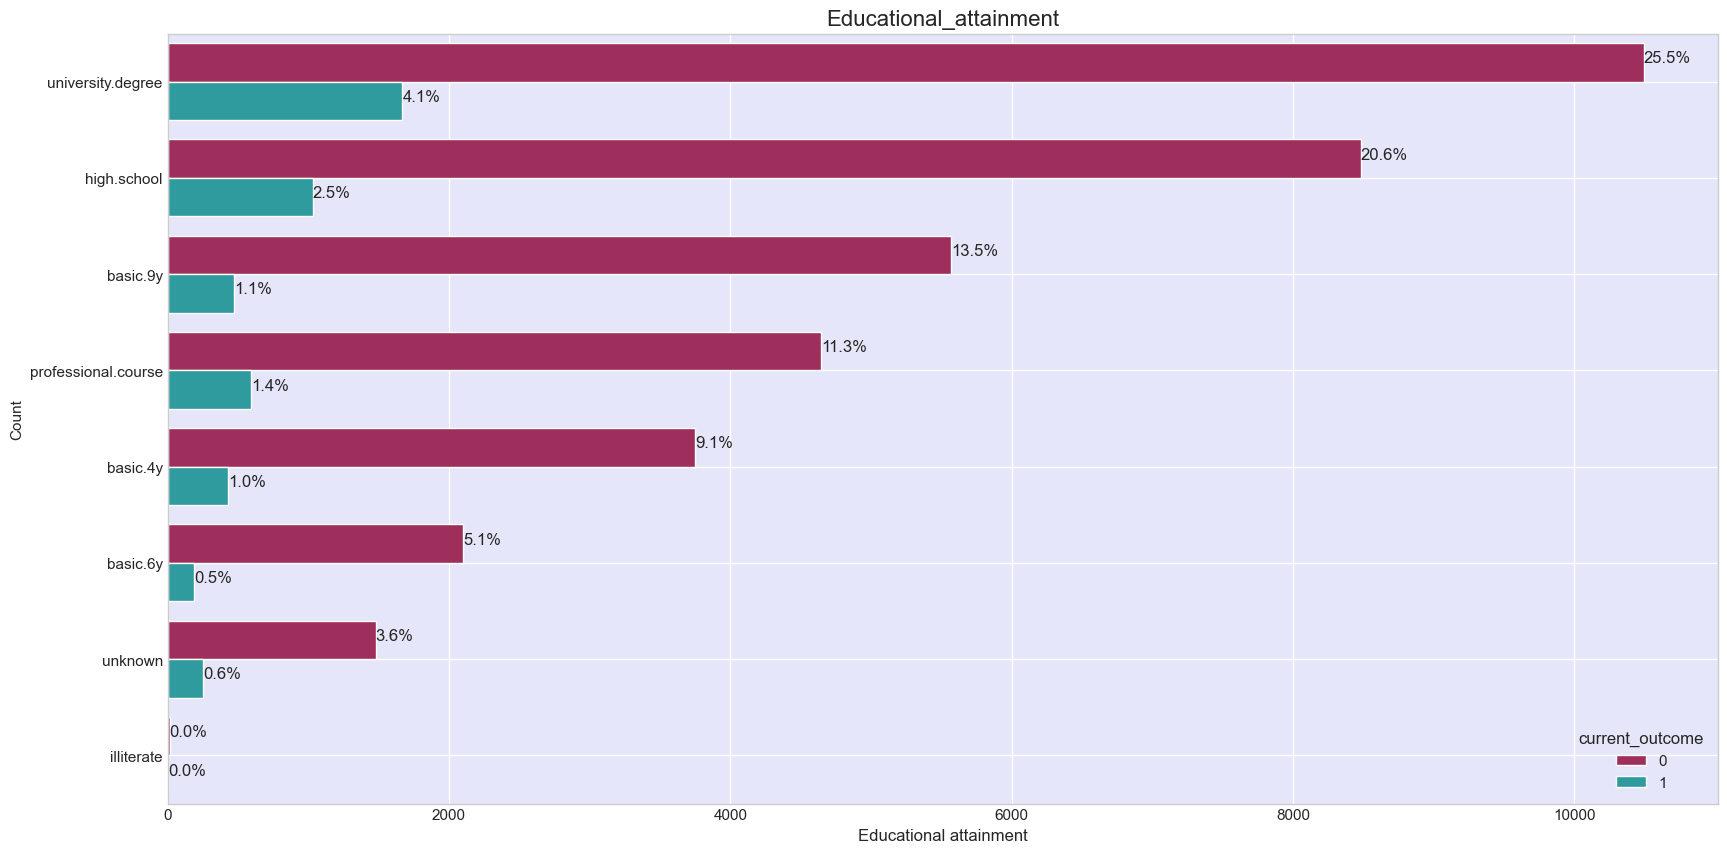

current_outcome             0     1    All
educational_attainment                    
basic.4y                 3748   428   4176
basic.6y                 2103   188   2291
basic.9y                 5572   473   6045
high.school              8481  1031   9512
illiterate                 14     4     18
professional.course      4645   595   5240
university.degree       10495  1669  12164
unknown                  1479   251   1730
All                     36537  4639  41176


In [64]:
field="educational_attainment"
xlabel="Educational Attainment"
ylabel="Count"

plot_bivariate(field, xlabel, ylabel)

**Age Groups**

- **25-35, 35-45, 45-55** subscribed the most as they were targeted the most;
- Conversion of **Under 25, Abovr 65** is high despite of not being targeted widely.

In [65]:
field="age_groups"
xlabel="Age Groups"
ylabel="Count"

plot_bivariate(field, xlabel, ylabel)

current_outcome      0     1    All
age_groups                         
25-35            12018  1666  13684
35-45            12327  1168  13495
45-55             7950   752   8702
55-65             3082   484   3566
above 65           349   313    662
under 25           811   256   1067
All              36537  4639  41176


**Duration in Minutes in Groups/Bins**

- **Above 8 minutes** is the duration of call that converted the most customers
- **2-4 minutes** is the second by conversion

-> **sales agents should have conversation plans and prompts that would be enough to hold a conversation for 6-8 minutes or longer. As there is a possibility for calls to get lenghty, better to book a timeslot in advance instead of cold calling**

In [66]:
field="duration_min_groups"
xlabel="Duration in Minutes in Groups/Bins"
ylabel="Count"

plot_bivariate(field, xlabel, ylabel)

current_outcome          0     1    All
duration_min_groups                    
1-2 min               8344   163   8507
2-4 min              12289   883  13172
4-6 min               5612   823   6435
6-8 min               2636   575   3211
above 8               3482  2194   5676
under 1 min           4174     1   4175
All                  36537  4639  41176


**Credit in Default by Subscription**

Sales agents did not contact clients with defaulted credits

In [67]:
field="credit_in_default"
xlabel="Credit in default"
ylabel="Count"

plot_bivariate(field, xlabel, ylabel)

current_outcome        0     1    All
credit_in_default                    
0                  28381  4196  32577
1                      3     0      3
unknown             8153   443   8596
All                36537  4639  41176


**Housing Loan by Subscription**

 Having a housing loan is a neutral indicator


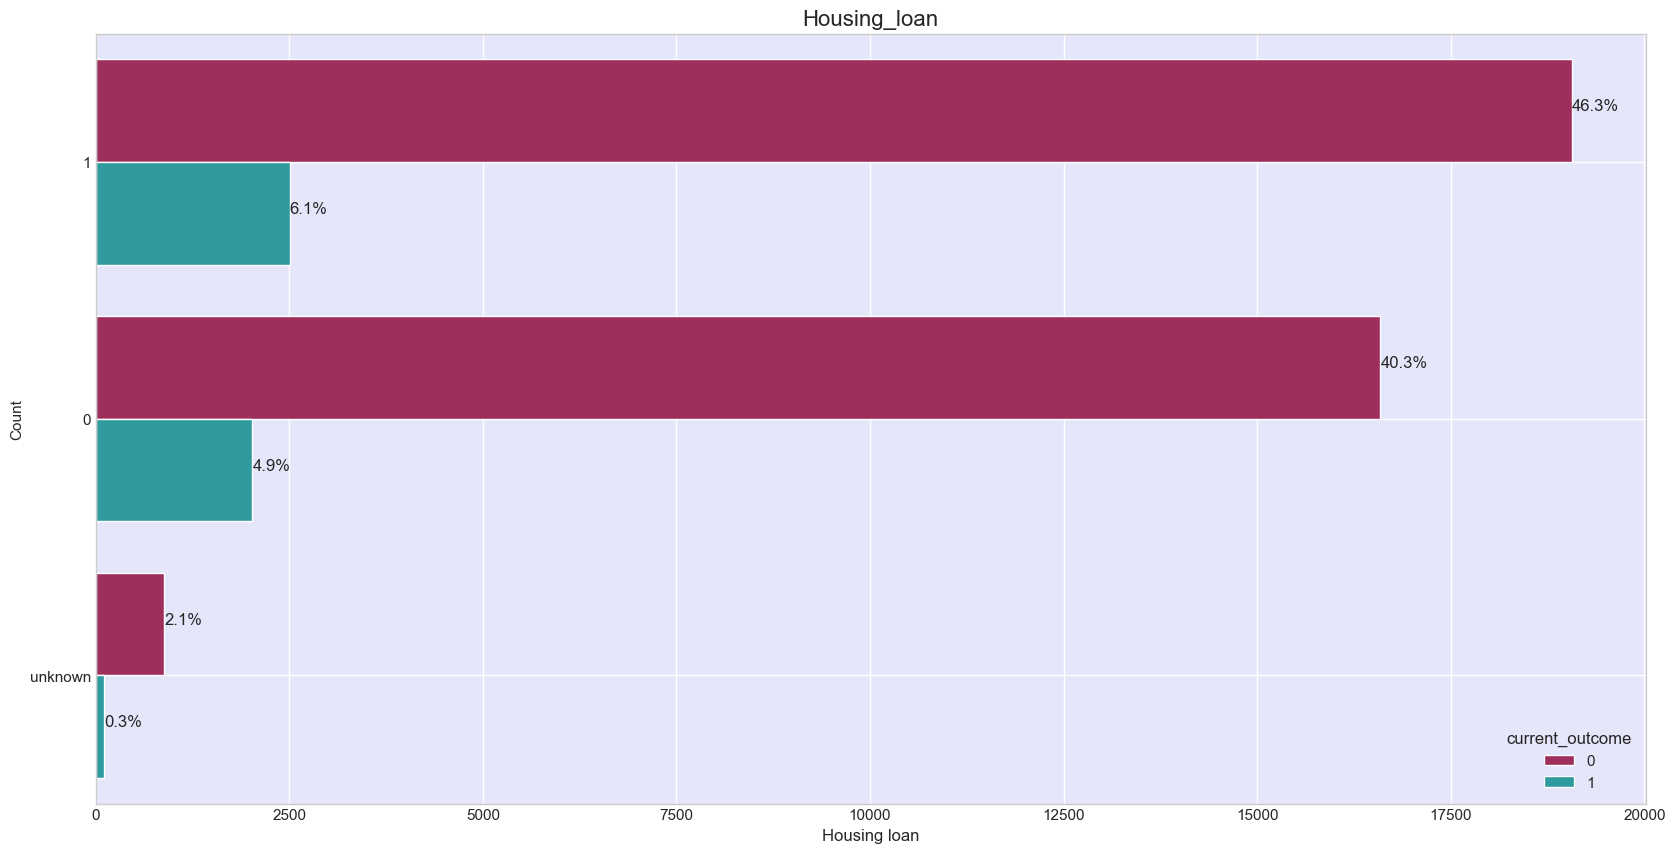

current_outcome      0     1    All
housing_loan                       
0                16590  2025  18615
1                19064  2507  21571
unknown            883   107    990
All              36537  4639  41176


In [68]:
field="housing_loan"
xlabel="Housing loan"
ylabel="Count"

plot_bivariate(field, xlabel, ylabel)

**Personal Loan by Subscription**

- Clients that have a personal loan are not likely to subscribe, **it is more efficient to target clients without loans**;


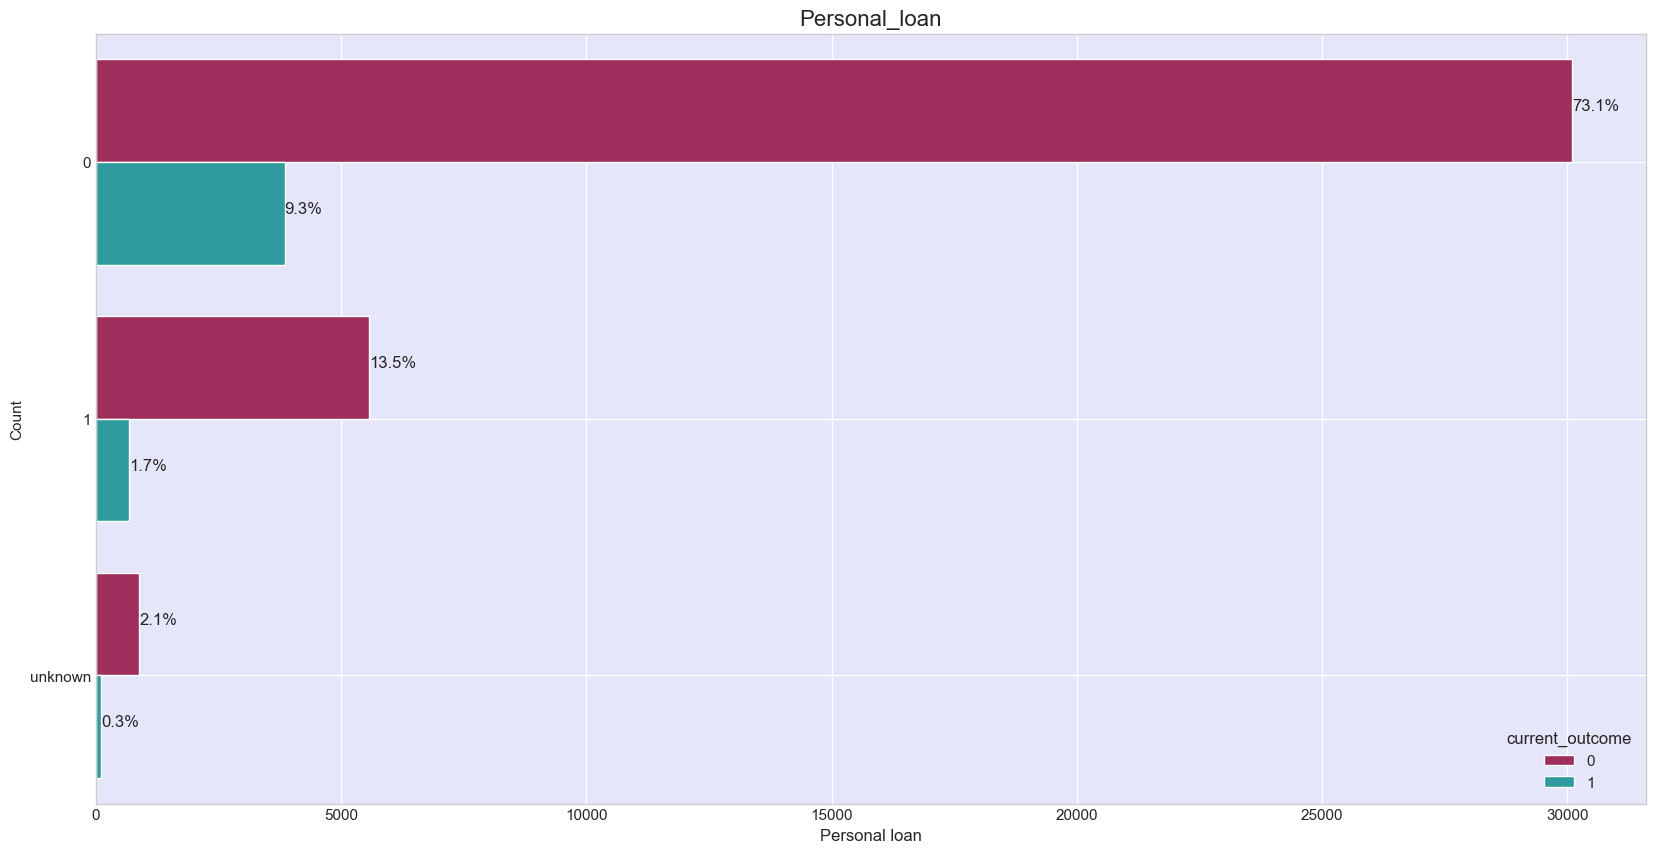

current_outcome      0     1    All
personal_loan                      
0                30089  3849  33938
1                 5565   683   6248
unknown            883   107    990
All              36537  4639  41176


In [69]:
field="personal_loan"
xlabel="Personal Loan"
ylabel="Count"

plot_bivariate(field, xlabel, ylabel)

**Contact Type by Subscription**

People that were contacted through a cellular phone subscribed more frequently but that does nor imply that agents should call only cellular phones

In [70]:
field="contact_type"
xlabel="Contact Type"
ylabel="Count"

plot_bivariate(field, xlabel, ylabel)

current_outcome      0     1    All
contact_type                       
cellular         22283  3852  26135
telephone        14254   787  15041
All              36537  4639  41176


**Last Contact Month by Subscription**

- Sales agents were the most active in May and made 34% of calls in that month;
- The trend seems to increase in spring, hold high in summer and steadily drop in autumn;
- **Sales agents should start the campaign in March and wrap up towards November**.

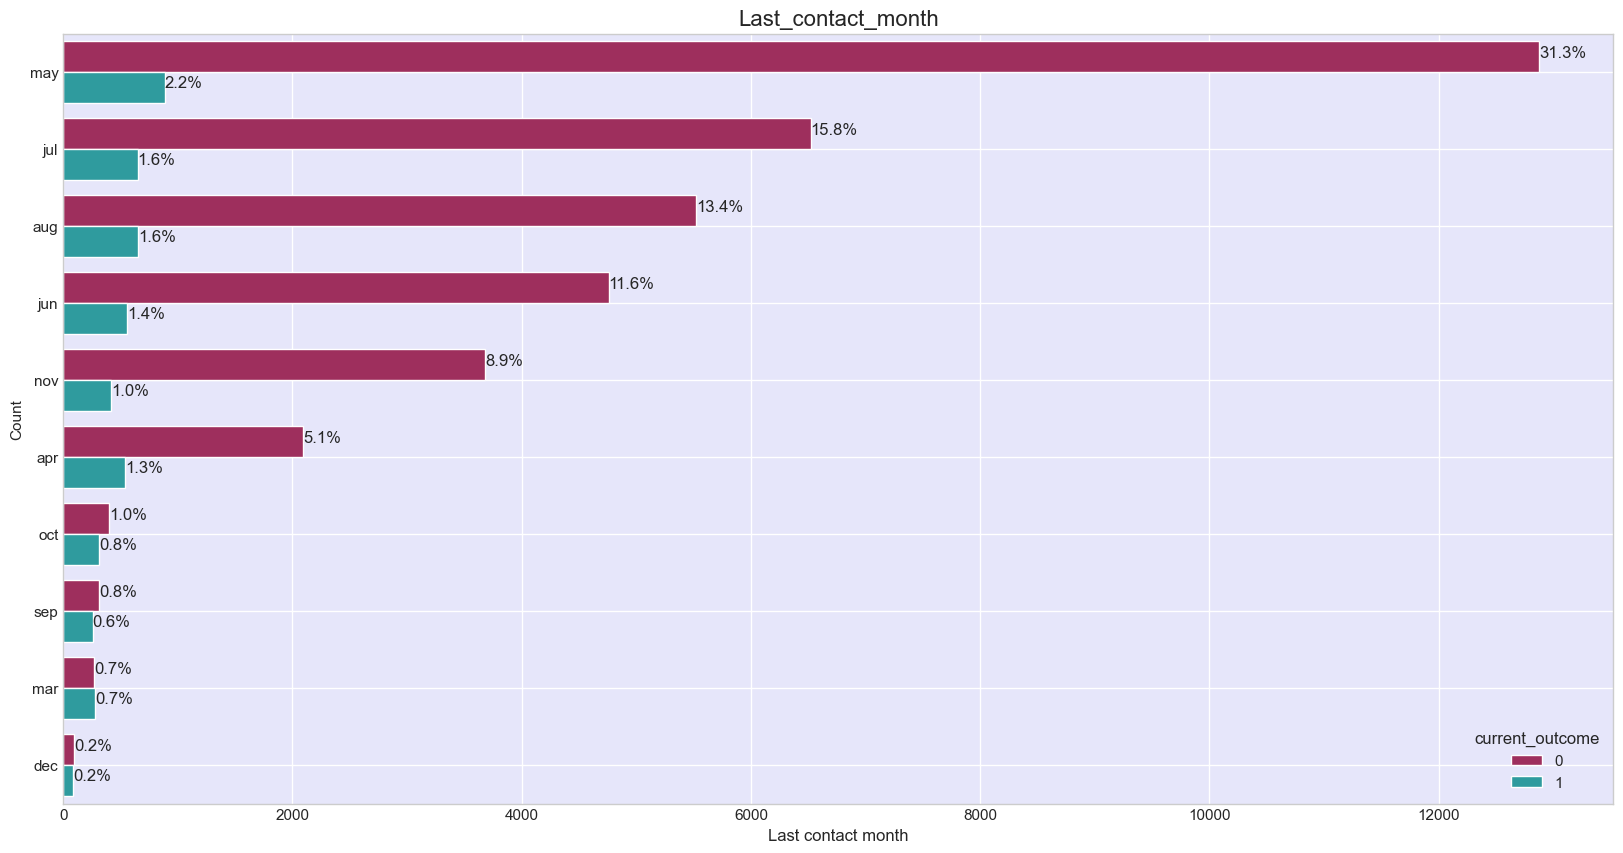

current_outcome         0     1    All
last_contact_month                    
apr                  2092   539   2631
aug                  5521   655   6176
dec                    93    89    182
jul                  6521   648   7169
jun                  4759   559   5318
mar                   270   276    546
may                 12881   886  13767
nov                  3684   416   4100
oct                   402   315    717
sep                   314   256    570
All                 36537  4639  41176


In [71]:
field="last_contact_month"
xlabel="Last Contact Month"
ylabel="Count"

plot_bivariate(field, xlabel, ylabel)

**Last Contact Day by Subscription**

There are no interesting insights


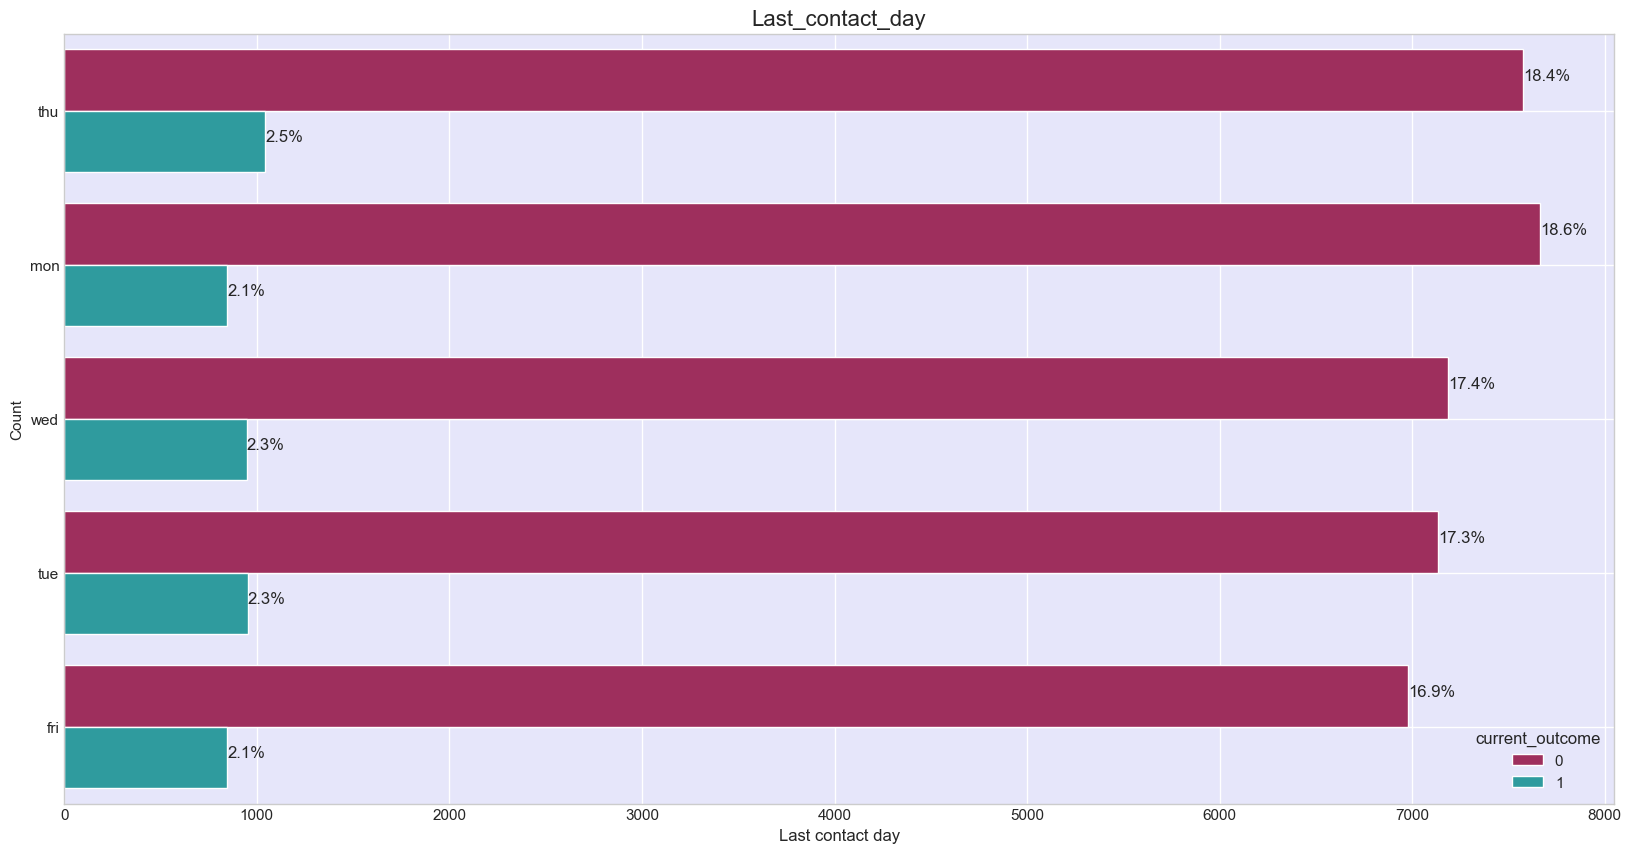

current_outcome       0     1    All
last_contact_day                    
fri                6980   846   7826
mon                7665   847   8512
thu                7574  1044   8618
tue                7133   953   8086
wed                7185   949   8134
All               36537  4639  41176


In [72]:
field="last_contact_day"
xlabel="Last Contact Day"
ylabel="Count"

plot_bivariate(field, xlabel, ylabel)

**Previous Outcome by Subscription**
 
 A lot of unknown values - can be discarded


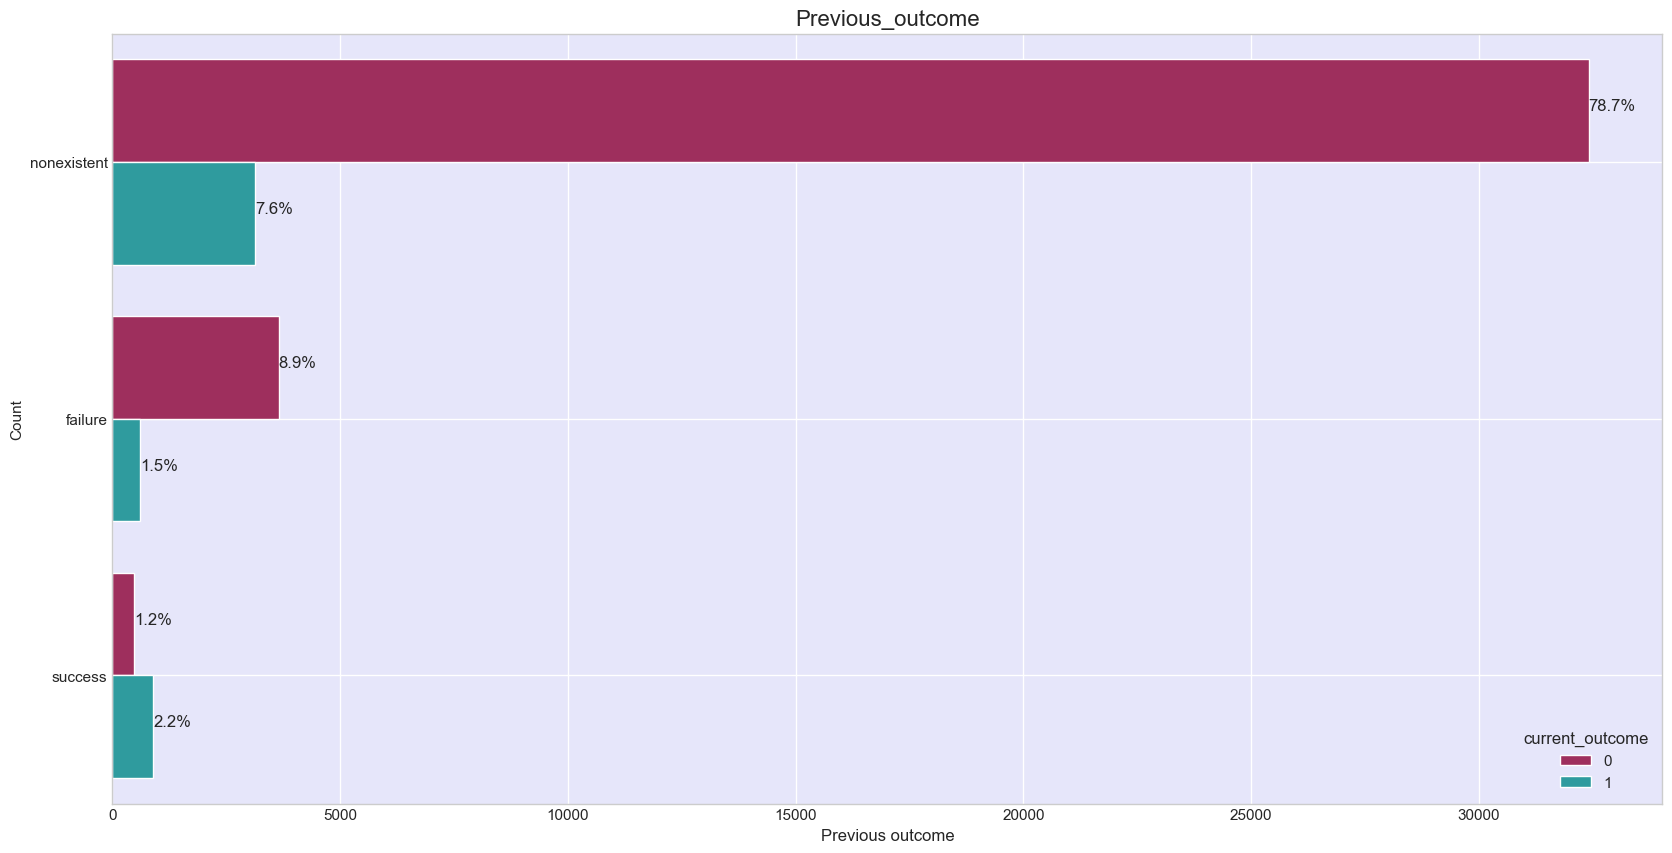

current_outcome       0     1    All
previous_outcome                    
failure            3647   605   4252
nonexistent       32411  3140  35551
success             479   894   1373
All               36537  4639  41176


In [73]:
field="previous_outcome"
xlabel="Previous Outcome"
ylabel="Count"

plot_bivariate(field, xlabel, ylabel)

<h3><p style="color:white;font-size:150%;background-color:slateblue;padding:12px;border-radius: 8px">Recommendations </p></h3>

1. Having a credit in default and Personal Loan can be a meaningul variable for the future sales campaign and **sales agents can save time by targeting the clients without defaults and personal loans**;
2. **Sales agents should start the campaign in March, continue till the end of summer and wrap up towards November, before the holidays**. It should also be investigated internally why so many calls have been done in May.
3. All macroeconomic indicators 'Employment Variation Rate', 'Consumer Confidence Index' and 'Consumer Price Index' are highly correlated. **This can impact the model because of multicollinearity and it will be required to remove some of them;**
4. Among macroeconomic variables only Employment Variation Rate and Euribor Rate have enough variation and showed interesting patterns in visuals, other variables did not show any interesting correlations and  can be removed.
5. 'Last Contact Duration' and 'Age': Population of clients who have subscribed are in higher threshold than clients who have not -> **selling deposits requires longer conversations**;
6. 'Employment Varitation Rate' and 'Age': Clients subscribe during more turbulent labor market conditions when the employment varation rate was negative from -1 to -3 with heterogeneous age groups -> **sales agents should more actively engage in campaigns when the rate is negative/falling as the employment options narrow - clients are more motivated to save**;
7. 'Euro Interbank Rate' and 'Age': More clients below 50 years old subscribed to deposits during beneficial times of higher interbank rates, heterogeneous age groups subscribed when the rate was from 1 to 2 ->**sales agents should more actively engage in campaigns when the rate is high**;
8. 'Current Campaign Contact Count' and 'Last Contact Duration': There are two distinct populations of clients who were frequently contacted, more than 10 times and whose call duration was shorter that the second group, and the second group that subscribed was called less than 10 times and had longer conversations that -> **sales agents should not contact clients more than 10 times**;
9. Job Categories by Subscription: Admin positions, blue-collars and technicians subscribed the most but they were also contacted and targeted the most; Students and retired subscribed proportionally more frequently despite of not being contacted many times -> **Students and retired should get a special attention in the next campaign**
10. Clients with university degree, high school diploma and professional courses subscribed the most;
11. **25-35, 35-45, 45-55 subscribed the most** as they were targeted the most; **Conversion of Under 25, Above 65 is high** despite of not being targeted widely;
12. Above 8 minutes is the duration of call that converted the most customers; 4-6 minutes is the second by conversion -> **sales agents should have conversation plans and prompts that would be enough to hold a conversation for 6-8 minutes or longer. As there is a possibility for calls to get lenghty, better to book a timeslot in advance instead of cold calling**


<h3><p style="color:white;font-size:150%;background-color:slateblue;padding:12px;border-radius: 8px">Building the model.</p></h3><a class="anchor" id="sec2.8"></a>

In [74]:
df

age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  duration  campaign  pdays  previous  \
0      telephone   may         mon       261         1    999         0   
1      telephone   may         mon       149         1    999         0   
2      telephone   may         mon       226         1    999         0   
3      telephone   may         mon       151         1    999         0   
4      telephone   may         mon       307         1    999         0   
...          ...   ...         ...       ...       ...    ...       ...   
41183   cellular   nov         fri       334         1    999         0   
41184   cellular   nov         fri       383         1    999         0   
41185   cellular   nov         fri       189         2    999         0   
41186   cellular   nov         fri       442         1    999         0   
41187   cellular   nov         fri       239         3    999         1   

          poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0      nonexistent           1.1          93.994          -36.4      4.857   
1      nonexistent           1.1          93.994          -36.4      4.857   
2      nonexistent           1.1          93.994          -36.4      4.857   
3      nonexistent           1.1          93.994          -36.4      4.857   
4      nonexistent           1.1          93.994          -36.4      4.857   
...            ...           ...             ...            ...        ...   
41183  nonexistent          -1.1          94.767          -50.8      1.028   
41184  nonexistent          -1.1          94.767          -50.8      1.028   
41185  nonexistent          -1.1          94.767          -50.8      1.028   
41186  nonexistent          -1.1          94.767          -50.8      1.028   
41187      failure          -1.1          94.767          -50.8      1.028   

       nr.employed    y  
0             5191   no  
1             5191   no  
2             5191   no  
3             5191   no  
4             5191   no  
...            ...  ...  
41183         4964  yes  
41184         4964   no  
41185         4964   no  
41186         4964  yes  
41187         4964   no  

[41188 rows x 21 columns]

### 1. Check for unique values of categorical variables

In [75]:
df_obj = df.select_dtypes('object')
df_uniques = pd.DataFrame([[i, len(df_obj[i].unique())] for i in df_obj.columns], columns=['Variable', 'Unique Values']).set_index('Variable')
df_uniques

Unique Values
Variable                  
job                     12
marital                  4
education                8
default                  3
housing                  3
loan                     3
contact                  2
month                   10
day_of_week              5
poutcome                 3
y                        2

### 2. LabelEncoder & One-Hot Encoding

In [76]:
## Find Binary Variables
binary_variables = list(df_uniques[df_uniques['Unique Values'] == 2].index)
binary_variables

['contact', 'y']

In [77]:
## Leftover Categorical Variables
categorical_variables = list(set(df_obj) - set(binary_variables))
categorical_variables

['default',
 'marital',
 'poutcome',
 'month',
 'job',
 'housing',
 'loan',
 'education',
 'day_of_week']

In [78]:
from sklearn.preprocessing import  LabelEncoder

In [79]:
lb = LabelEncoder()

In [80]:
for column in binary_variables:
    df[column] = lb.fit_transform(df[column])

In [81]:
df = pd.get_dummies(df, columns = categorical_variables, drop_first=True)
df.describe()

age       contact      duration      campaign         pdays  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406      0.365252    258.285010      2.567593    962.475454   
std       10.42125      0.481507    259.279249      2.770014    186.910907   
min       17.00000      0.000000      0.000000      1.000000      0.000000   
25%       32.00000      0.000000    102.000000      1.000000    999.000000   
50%       38.00000      0.000000    180.000000      2.000000    999.000000   
75%       47.00000      1.000000    319.000000      3.000000    999.000000   
max       98.00000      1.000000   4918.000000     56.000000    999.000000   

           previous  emp.var.rate  cons.price.idx  cons.conf.idx  \
count  41188.000000  41188.000000    41188.000000   41188.000000   
mean       0.172963      0.081886       93.575664     -40.502600   
std        0.494901      1.570960        0.578840       4.628198   
min        0.000000     -3.400000       92.201000     -50.800000   
25%        0.000000     -1.800000       93.075000     -42.700000   
50%        0.000000      1.100000       93.749000     -41.800000   
75%        0.000000      1.400000       93.994000     -36.400000   
max        7.000000      1.400000       94.767000     -26.900000   

          euribor3m   nr.employed             y  default_unknown  \
count  41188.000000  41188.000000  41188.000000     41188.000000   
mean       3.621291   5167.019010      0.112654         0.208726   
std        1.734447     72.178074      0.316173         0.406403   
min        0.634000   4964.000000      0.000000         0.000000   
25%        1.344000   5099.000000      0.000000         0.000000   
50%        4.857000   5191.000000      0.000000         0.000000   
75%        4.961000   5228.000000      0.000000         0.000000   
max        5.045000   5228.000000      1.000000         1.000000   

        default_yes  marital_married  marital_single  marital_unknown  \
count  41188.000000     41188.000000    41188.000000     41188.000000   
mean       0.000073         0.605225        0.280859         0.001942   
std        0.008534         0.488808        0.449424         0.044029   
min        0.000000         0.000000        0.000000         0.000000   
25%        0.000000         0.000000        0.000000         0.000000   
50%        0.000000         1.000000        0.000000         0.000000   
75%        0.000000         1.000000        1.000000         0.000000   
max        1.000000         1.000000        1.000000         1.000000   

       poutcome_nonexistent  poutcome_success     month_aug     month_dec  \
count          41188.000000      41188.000000  41188.000000  41188.000000   
mean               0.863431          0.033335      0.149995      0.004419   
std                0.343396          0.179512      0.357071      0.066328   
min                0.000000          0.000000      0.000000      0.000000   
25%                1.000000          0.000000      0.000000      0.000000   
50%                1.000000          0.000000      0.000000      0.000000   
75%                1.000000          0.000000      0.000000      0.000000   
max                1.000000          1.000000      1.000000      1.000000   

          month_jul     month_jun     month_mar     month_may     month_nov  \
count  41188.000000  41188.000000  41188.000000  41188.000000  41188.000000   
mean       0.174177      0.129115      0.013256      0.334296      0.099568   
std        0.379266      0.335332      0.114372      0.471750      0.299427   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      1.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

          month_oct   

In [82]:
df

age  contact  duration  campaign  pdays  previous  emp.var.rate  \
0       56        1       261         1    999         0           1.1   
1       57        1       149         1    999         0           1.1   
2       37        1       226         1    999         0           1.1   
3       40        1       151         1    999         0           1.1   
4       56        1       307         1    999         0           1.1   
...    ...      ...       ...       ...    ...       ...           ...   
41183   73        0       334         1    999         0          -1.1   
41184   46        0       383         1    999         0          -1.1   
41185   56        0       189         2    999         0          -1.1   
41186   44        0       442         1    999         0          -1.1   
41187   74        0       239         3    999         1          -1.1   

       cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  \
0              93.994          -36.4      4.857         5191  0   
1              93.994          -36.4      4.857         5191  0   
2              93.994          -36.4      4.857         5191  0   
3              93.994          -36.4      4.857         5191  0   
4              93.994          -36.4      4.857         5191  0   
...               ...            ...        ...          ... ..   
41183          94.767          -50.8      1.028         4964  1   
41184          94.767          -50.8      1.028         4964  0   
41185          94.767          -50.8      1.028         4964  0   
41186          94.767          -50.8      1.028         4964  1   
41187          94.767          -50.8      1.028         4964  0   

       default_unknown  default_yes  marital_married  marital_single  \
0                    0            0                1               0   
1                    1            0                1               0   
2                    0            0                1               0   
3                    0            0                1               0   
4                    0            0                1               0   
...                ...          ...              ...             ...   
41183                0            0                1               0   
41184                0            0                1               0   
41185                0            0                1               0   
41186                0            0                1               0   
41187                0            0                1               0   

       marital_unknown  poutcome_nonexistent  poutcome_success  month_aug  \
0                    0                     1                 0          0   
1                    0                     1                 0          0   
2                    0                     1                 0          0   
3                    0                     1                 0          0   
4                    0                     1                 0          0   
...                ...                   ...               ...        ...   
41183                0                     1                 0          0   
41184                0                     1                 0          0   
41185                0                     1                 0          0   
41186                0                     1                 0          0   
41187                0                     0                 0          0   

       month_dec  month_jul  month_jun  month_mar  month_may  month_nov  \
0              0          0          0          0          1          0   
1              0          0          0          0          1          0   
2              0          0          0          0          1          0   
3              0          0          0          0          1          0   
4              0          0          0          0          1          0   
...          ...        ...        ...        ...        ...        ...  

### 3. Data preparation

In [83]:
X=df.drop(['y'],axis=1)
y=df['y']

In [84]:
X.head()

age  contact  duration  campaign  pdays  previous  emp.var.rate  \
0   56        1       261         1    999         0           1.1   
1   57        1       149         1    999         0           1.1   
2   37        1       226         1    999         0           1.1   
3   40        1       151         1    999         0           1.1   
4   56        1       307         1    999         0           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  default_unknown  \
0          93.994          -36.4      4.857         5191                0   
1          93.994          -36.4      4.857         5191                1   
2          93.994          -36.4      4.857         5191                0   
3          93.994          -36.4      4.857         5191                0   
4          93.994          -36.4      4.857         5191                0   

   default_yes  marital_married  marital_single  marital_unknown  \
0            0                1               0                0   
1            0                1               0                0   
2            0                1               0                0   
3            0                1               0                0   
4            0                1               0                0   

   poutcome_nonexistent  poutcome_success  month_aug  month_dec  month_jul  \
0                     1                 0          0          0          0   
1                     1                 0          0          0          0   
2                     1                 0          0          0          0   
3                     1                 0          0          0          0   
4                     1                 0          0          0          0   

   month_jun  month_mar  month_may  month_nov  month_oct  month_sep  \
0          0          0          1          0          0          0   
1          0          0          1          0          0          0   
2          0          0          1          0          0          0   
3          0          0          1          0          0          0   
4          0          0          1          0          0          0   

   job_blue-collar  job_entrepreneur  job_housemaid  job_management  \
0                0                 0              1               0   
1                0                 0              0               0   
2                0                 0              0               0   
3                0                 0              0               0   
4                0                 0              0               0   

   job_retired  job_self-employed  job_services  job_student  job_technician  \
0            0                  0             0            0               0   
1            0                  0             1            0               0   
2            0                  0             1            0               0   
3            0                  0             0            0               0   
4            0                  0             1            0               0   

   job_unemployed  job_unknown  housing_unknown  housing_yes  loan_unknown  \
0               0            0                0            0             0   
1               0            0                0            0             0   
2               0            0                0            1             0   
3               0            0                0            0             0   
4               0            0                0            0             0   

   loan_yes  education_basic.6y  education_basic.9y  education_high.school  \
0         0                   0                   0                      0   
1         0                   0                   0                      1   
2         0                   0                   0                      1   
3         0                   1                   0                      0   
4         1                   0                

<h3><p style="color:white;font-size:150%;background-color:slateblue;padding:12px;border-radius: 8px">Feature Selection </p></h3><a class="anchor" id="sec2.9.1"></a>

In [85]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

clf = ExtraTreesClassifier(n_estimators=100)
clf = clf.fit(X.values, y)
clf.feature_importances_  
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X.values)

In [86]:
X_new.shape

(41188, 10)

<h3><p style="color:white;font-size:150%;background-color:slateblue;padding:12px;border-radius: 8px">Splitting our dataset into train and test set</p></h3> <a class="anchor" id="sec4"></a>

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
X_train,X_test,y_train,y_test=train_test_split(X_new,y,test_size=0.25,stratify=y,random_state=0)

<h3><p style="color:white;font-size:150%;background-color:slateblue;padding:12px;border-radius: 8px">SMOTE(Synthetic Minority Oversampling Technique)</p></h3><a class="anchor" id="sec8"></a>

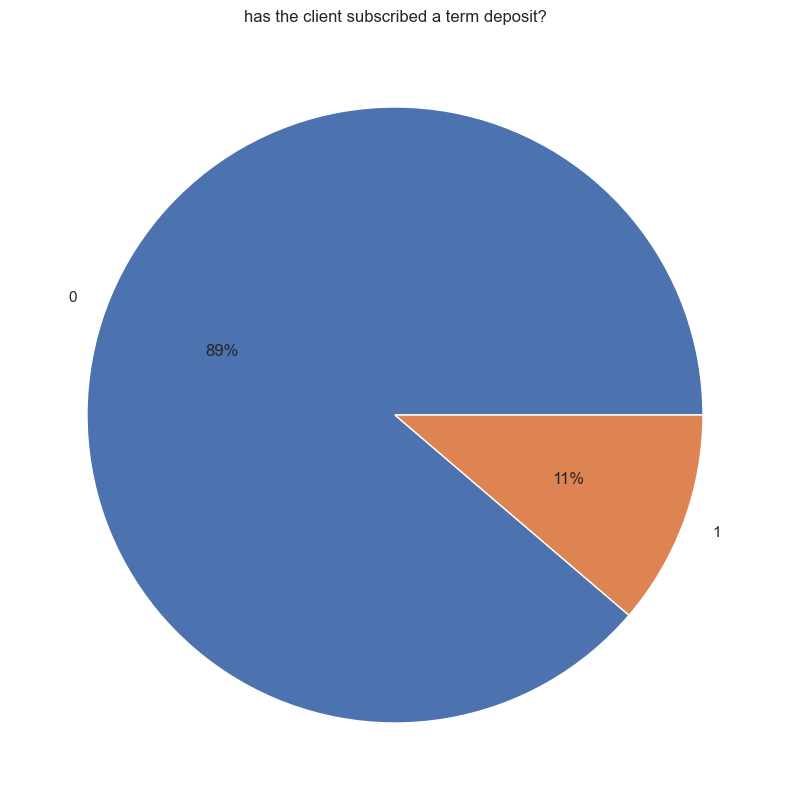

In [89]:
#1=Yes and 0=No
target_var=pd.crosstab(index=df['y'],columns='% observations')
plt.pie(target_var['% observations'],labels=target_var['% observations'].index,autopct='%.0f%%')
plt.title('has the client subscribed a term deposit?')
plt.show()

In [90]:
from imblearn.over_sampling import SMOTE

In [91]:
sm = SMOTE(sampling_strategy='auto', random_state=42)

In [92]:
X_train,y_train=sm.fit_resample(X_train,y_train)

<h3><p style="color:white;font-size:120%;background-color:slateblue;padding:12px;border-radius: 8px">Count plot after applying SMOTE </p></h3>

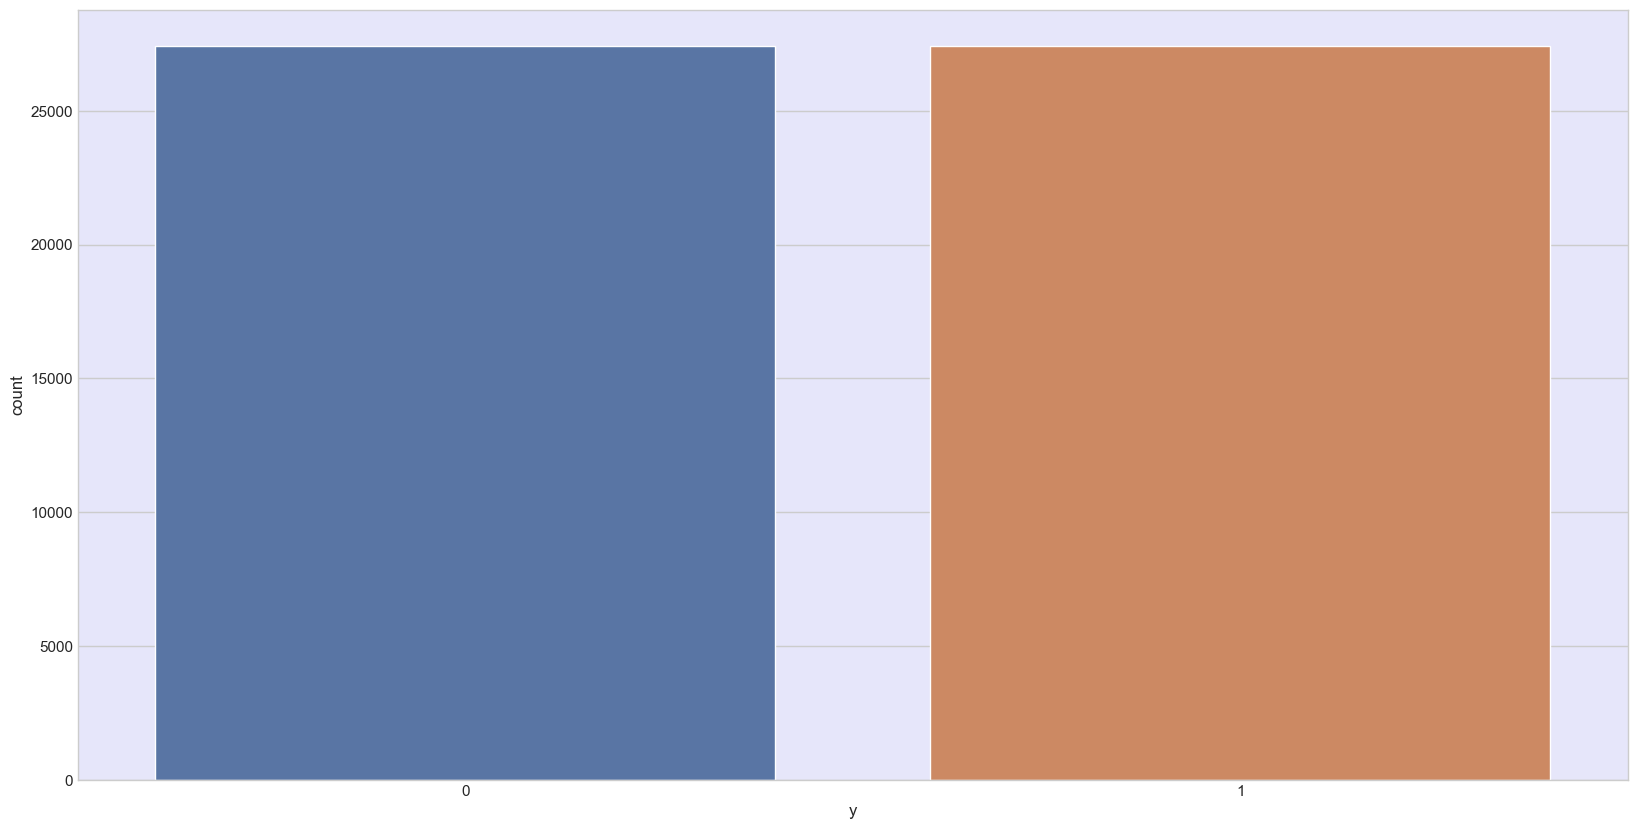

In [93]:
sns.countplot(y_train)
plt.show()

<h3><p style="color:white;font-size:150%;background-color:slateblue;padding:12px;border-radius: 8px">Feature Scaling</p></h3> <a class="anchor" id="sec5"></a>

In [94]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score,accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import average_precision_score
from sklearn import metrics


In [95]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

<h3><p style="color:white;font-size:150%;background-color:slateblue;padding:12px;border-radius: 8px">Modeling and Performance Measures for Multi-Class

In [96]:
#importing different classification models

from sklearn.metrics import confusion_matrix, accuracy_score,f1_score
from sklearn.metrics import classification_report


In [97]:
X_train.shape[1]

10

### ANN_1_Without super parameter tuning

In [98]:
from tensorflow import keras
import tensorflow as tf


model = keras.Sequential([
    keras.layers.Flatten(input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(), #from_logits=True
              metrics=['AUC'])

model.summary()

history = model.fit(X_train, y_train, epochs=20)

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
predictions = model.predict(X_test)

predictions[predictions>0.5] = 1
predictions[predictions<=0.5] = 0

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 10)                0         
                                                                 
 dense (Dense)               (None, 64)                704       
                                                                 
 dense_1 (Dense)             (None, 16)                1040      
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,761
Trainable params: 1,761
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1714/1714 [==============================] - 13s 5ms/step - loss: 0.3081 - auc: 0.9395
Epoch 2/20
1714/1714 [==============================] - 9s 5ms/step - loss: 0.2585 - auc

Accuracy: 0.8806448480139847
Confusion Matrix:
[[8141  996]
 [ 233  927]]
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.89      0.93      9137
           1       0.48      0.80      0.60      1160

    accuracy                           0.88     10297
   macro avg       0.73      0.85      0.77     10297
weighted avg       0.92      0.88      0.89     10297

Kappa-  0.5361795180970619
F1-  0.6013623094388582
ROC_AUC_score-  0.8450652991059466
PR AUC-  0.40785980743848105
 


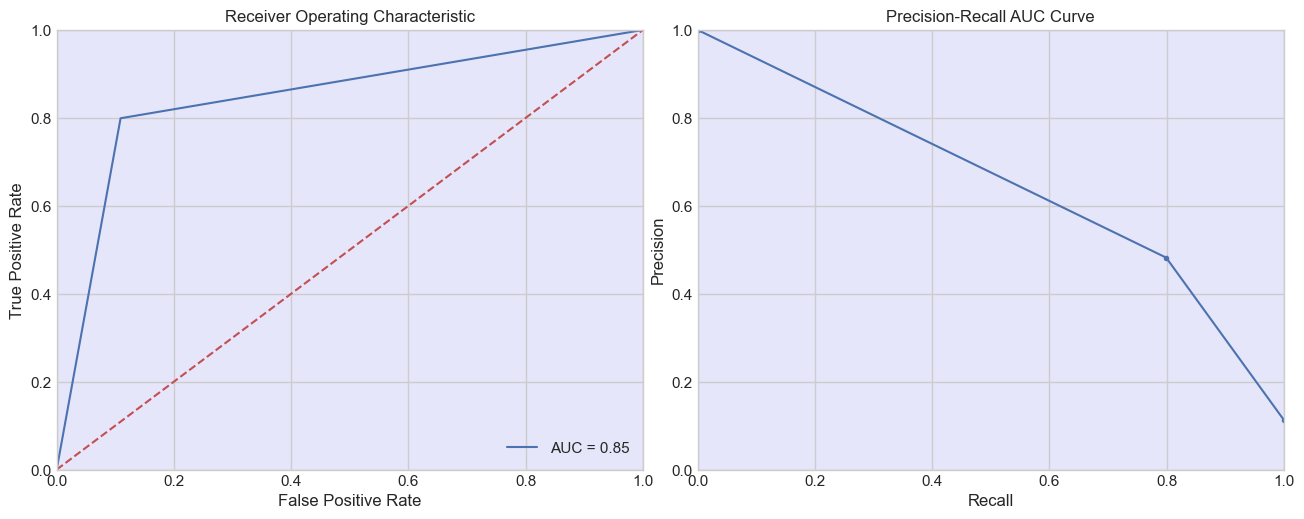

In [99]:

print("Accuracy:",accuracy_score(y_test, predictions))

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report")
print(classification_report(y_test, predictions))

print("Kappa- ", cohen_kappa_score(y_test, predictions))
print("F1- ", f1_score(y_test, predictions))
print("ROC_AUC_score- ", roc_auc_score(y_test, predictions))
print("PR AUC- ", average_precision_score(y_test, predictions))

print(" ")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13,5))
fig.tight_layout()

fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)
ax1.set_title('Receiver Operating Characteristic')
ax1.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
ax1.legend(loc = 'lower right')
ax1.plot([0, 1], [0, 1],'r--')
ax1.set_xlim([0, 1])
ax1.set_ylim([0, 1])
ax1.set_ylabel('True Positive Rate')
ax1.set_xlabel('False Positive Rate')

lr_precision, lr_recall, _ = metrics.precision_recall_curve(y_test, predictions)
ax2.set_title('Precision-Recall AUC Curve')
ax2.plot(lr_recall, lr_precision, marker='.')
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_xlim([0, 1])
ax2.set_ylim([0, 1])

plt.show()

In [100]:
pred = model.predict(X_test).reshape(-1,)
res=pd.DataFrame()
res['Aculual'] = y_test.values
res['predictions'] = pred
res

322/322 [==============================] - 1s 3ms/step


Aculual  predictions
0            1     0.739449
1            0     0.000117
2            0     0.029398
3            0     0.609406
4            0     0.002900
...        ...          ...
10292        0     0.086048
10293        0     0.414263
10294        0     0.133451
10295        0     0.323388
10296        1     0.951823

[10297 rows x 2 columns]

In [114]:
# history.keys for learning and loss from model training
print(history.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


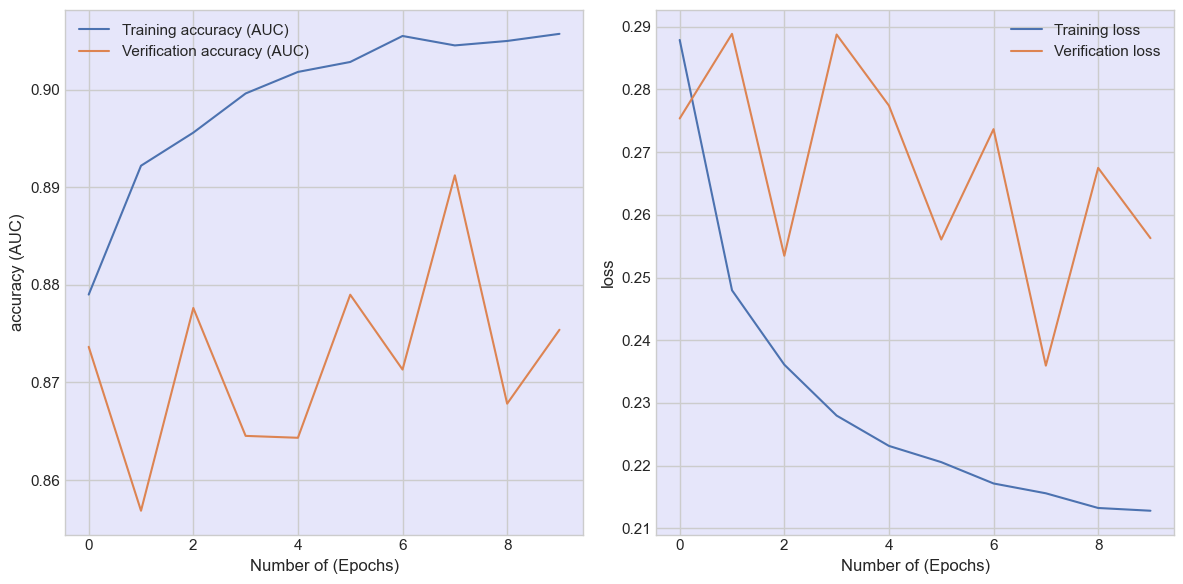

In [115]:

# History of learning and loss from model training
history = model.fit(X_train, y_train, epochs=10, batch_size=150, validation_data=(X_test, y_test))


# Obtain the loss, training accuracy and verification accuracy
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_auc = history.history['accuracy']  # دقة التدريب
val_auc = history.history['val_accuracy']  # دقة التحقق

# Draw the learning curve
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_auc, label='Training accuracy (AUC)')
plt.plot(val_auc, label='Verification accuracy (AUC)')
plt.xlabel('Number of (Epochs)')
plt.ylabel('accuracy (AUC)')
plt.legend()

# Draw the loss curve
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training loss')
plt.plot(val_loss, label='Verification loss')
plt.xlabel('Number of (Epochs)')
plt.ylabel('loss')
plt.legend()

# Display the drawing
plt.tight_layout()
plt.show()


### ANN_2_GridSearchCV

In [103]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier


### Define a function to create the model with the ability to set hyperparameters

In [104]:
def create_model(learning_rate=0.01, batch_size=32, num_hidden_units=64):
    model = Sequential()
    model.add(Dense(num_hidden_units, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(num_hidden_units//2, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model


##  A list of possible values for each parameter

In [106]:
import random

param_grid = {
    'batch_size': [32, 64, 128],
    'epochs': [random.randint(5, 20) for _ in range(10)],  
    'learning_rate': [0.001, 0.01, 0.1],
    'num_hidden_units': [32, 64, 128]  
}

## Convert the model to a form that can be used with GridSearchCV

In [107]:
model = KerasClassifier(build_fn=create_model, verbose=0)

# Implementing the hyperparameter adjustment process
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

# Show best results
print("the best: %f by use %s" % (grid_result.best_score_, grid_result.best_params_))



the best: 0.893638 by use {'batch_size': 128, 'epochs': 20, 'learning_rate': 0.1, 'num_hidden_units': 128}


## The best model after adjusting the hyperparameters

In [108]:
best_model = grid_result.best_estimator_.model

## Train the best model on the full dataset or validation set


In [109]:
history = best_model.fit(X_train, y_train, epochs=grid_result.best_params_['epochs'], batch_size=grid_result.best_params_['batch_size'], verbose=0)


In [110]:

test_loss, test_acc = best_model.evaluate(X_test, y_test, verbose=0)
predictions = best_model.predict(X_test)

predictions[predictions>0.5] = 1
predictions[predictions<=0.5] = 0

322/322 [==============================] - 1s 2ms/step


In [111]:

print("Accuracy:",accuracy_score(y_test, predictions))

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report")
print(classification_report(y_test, predictions))

print("Kappa- ", cohen_kappa_score(y_test, predictions))
print("F1- ", f1_score(y_test, predictions))
print("ROC_AUC_score- ", roc_auc_score(y_test, predictions))
print("PR AUC- ", average_precision_score(y_test, predictions))

print(" ")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13,5))
fig.tight_layout()

fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)
ax1.set_title('Receiver Operating Characteristic')
ax1.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
ax1.legend(loc = 'lower right')
ax1.plot([0, 1], [0, 1],'r--')
ax1.set_xlim([0, 1])
ax1.set_ylim([0, 1])
ax1.set_ylabel('True Positive Rate')
ax1.set_xlabel('False Positive Rate')

lr_precision, lr_recall, _ = metrics.precision_recall_curve(y_test, predictions)
ax2.set_title('Precision-Recall AUC Curve')
ax2.plot(lr_recall, lr_precision, marker='.')
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_xlim([0, 1])
ax2.set_ylim([0, 1])

plt.show()

Accuracy: 0.8865689035641449
Confusion Matrix:
[[8212  925]
 [ 243  917]]
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.90      0.93      9137
           1       0.50      0.79      0.61      1160

    accuracy                           0.89     10297
   macro avg       0.73      0.84      0.77     10297
weighted avg       0.92      0.89      0.90     10297

Kappa-  0.5485086541657503
F1-  0.6109260493004663
ROC_AUC_score-  0.8446402557996475
PR AUC-  0.41714107740712614
 


In [116]:

# History of learning and loss from model training
history = best_model.fit(X_train, y_train, epochs=grid_result.best_params_['epochs'], batch_size=grid_result.best_params_['batch_size'], validation_data=(X_test, y_test), verbose=0)


# Obtain the loss, training accuracy and verification accuracy
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_auc = history.history['accuracy']  # دقة التدريب
val_auc = history.history['val_accuracy']  # دقة التحقق

# Draw the learning curve
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_auc, label='Training accuracy (AUC)')
plt.plot(val_auc, label='Verification accuracy (AUC)')
plt.xlabel('Number of (Epochs)')
plt.ylabel('accuracy (AUC)')
plt.legend()

# Draw the loss curve
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training loss')
plt.plot(val_loss, label='Verification loss')
plt.xlabel('Number of (Epochs)')
plt.ylabel('loss')
plt.legend()

# Display the drawing
plt.tight_layout()
plt.show()


<h3><p style="color:white;font-size:120%;background-color:slateblue;padding:12px;border-radius: 8px">finally </p></h3>

## 1. We notice that after adjusting the parameters, the learning and loss curves became better, but it still needs more work because  model’s performance is unstable, and there is also excessive learning by the model, possible for several reasons. You think that it is necessary to consider the method of treating unbalanced classes, as the model’s performance was The performance of the model is better with the categories of customers who did not participate in the deposit than with the customers who subscribed to it. Therefore, the experiment must be repeated by choosing a better method for processing unbalanced data.

## 2.Therefore, the model learned well with an accuracy of up to 90% , but in both cases of the model’s performance with or without adjusting the hyperparameters, the accuracy is unstable, not exceeding 88 percent. The error rate is large in the test set, reaching 0.34 at tuning model, but in the training set, it does not exceed 0.26 when the hyperparameter of the model is adjusted, and it reaches 0.21 if the model is not adjusted in the training set.